In [11]:
!pip install xgboost

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error
import xgboost as xgb

# Load data
train_data = pd.read_csv('/content/drive/MyDrive/colab_notebooks/Data/main_dataset.csv')
train_data['Id'] = np.where(train_data['Id'] < 1e-18, 1e-18, train_data['Id'])
train_data['Log_Id'] = np.log10(train_data['Id'])
X = train_data[['Tox', 'Nc', 'Nd', 'Ns', 'Vds', 'Vgs']]
y = train_data['Log_Id']

# Polynomial features and scaling
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define hyperparameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.5],
    'reg_lambda': [0, 1, 10],
    'reg_alpha': [0, 0.1, 1]
}

# DataFrame to store results
results_df = pd.DataFrame(columns=['learning_rate', 'n_estimators', 'max_depth', 'min_child_weight',
                                   'subsample', 'colsample_bytree', 'gamma', 'reg_lambda', 'reg_alpha',
                                   'R2', 'MAE'])

random_search = RandomizedSearchCV(
    xgb.XGBRegressor(random_state=42, objective='reg:squarederror'),
    param_grid,
    n_iter=60,
    random_state=42,
    n_jobs=-1,
    verbose=5,
    cv=3
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'gamma': [0, 0.1, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [100, 200, 500],
                                        'reg_alpha': [0, 0.1, 1],
                                        'reg_lambda': [0, 1, 10],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, verbose=5)

{'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 1.0}


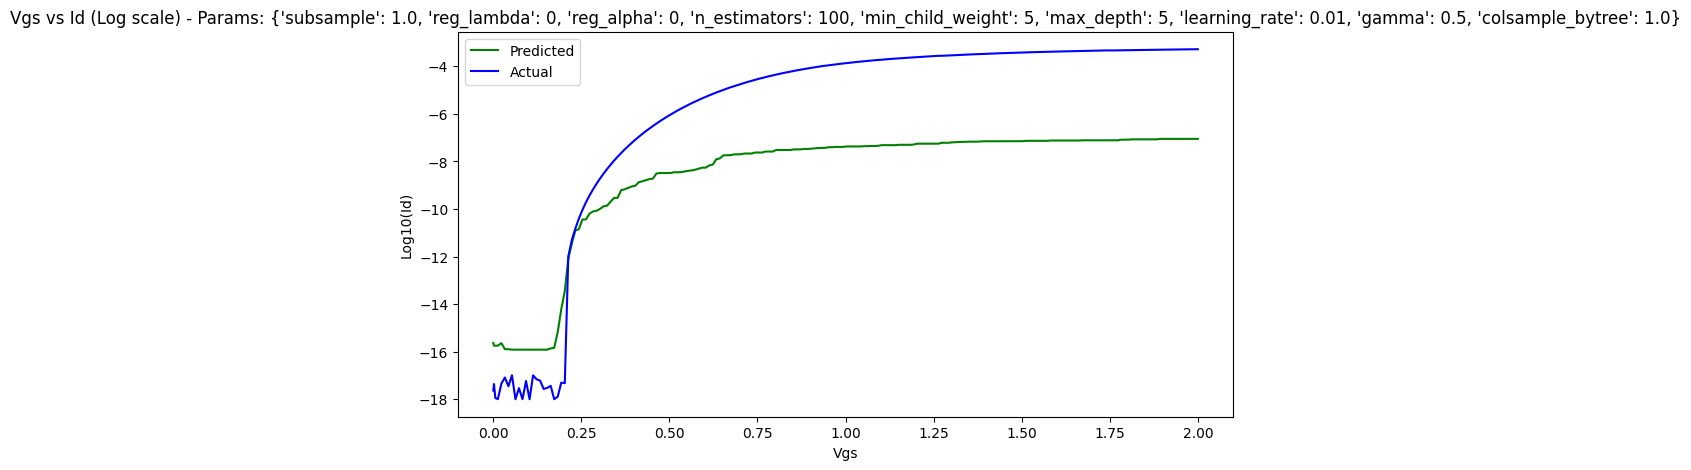

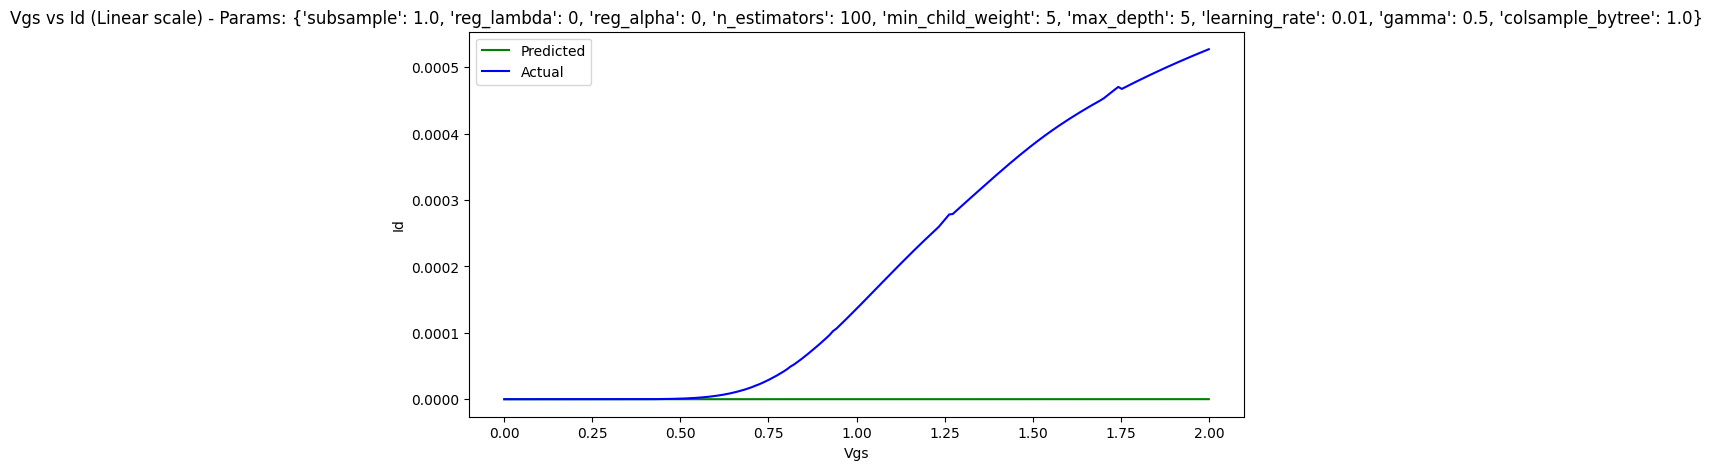

<ipython-input-13-23f2d83d3468>:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, current_result], ignore_index=True)


-------------
-------------------
---------------

{'subsample': 0.5, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.7}


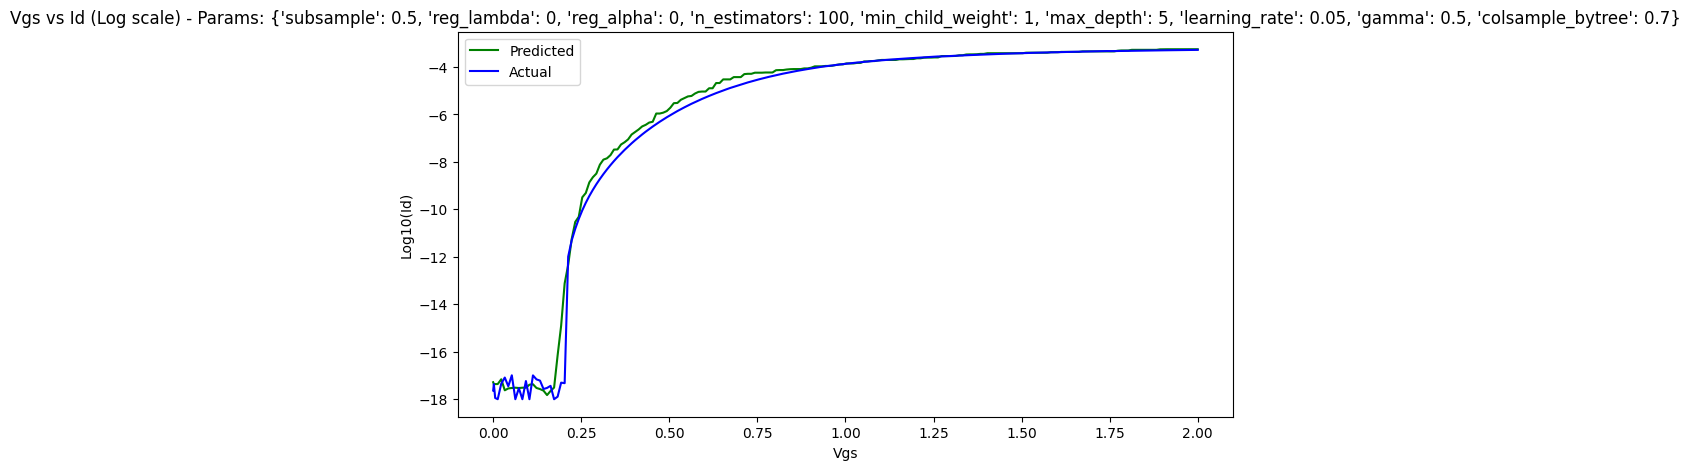

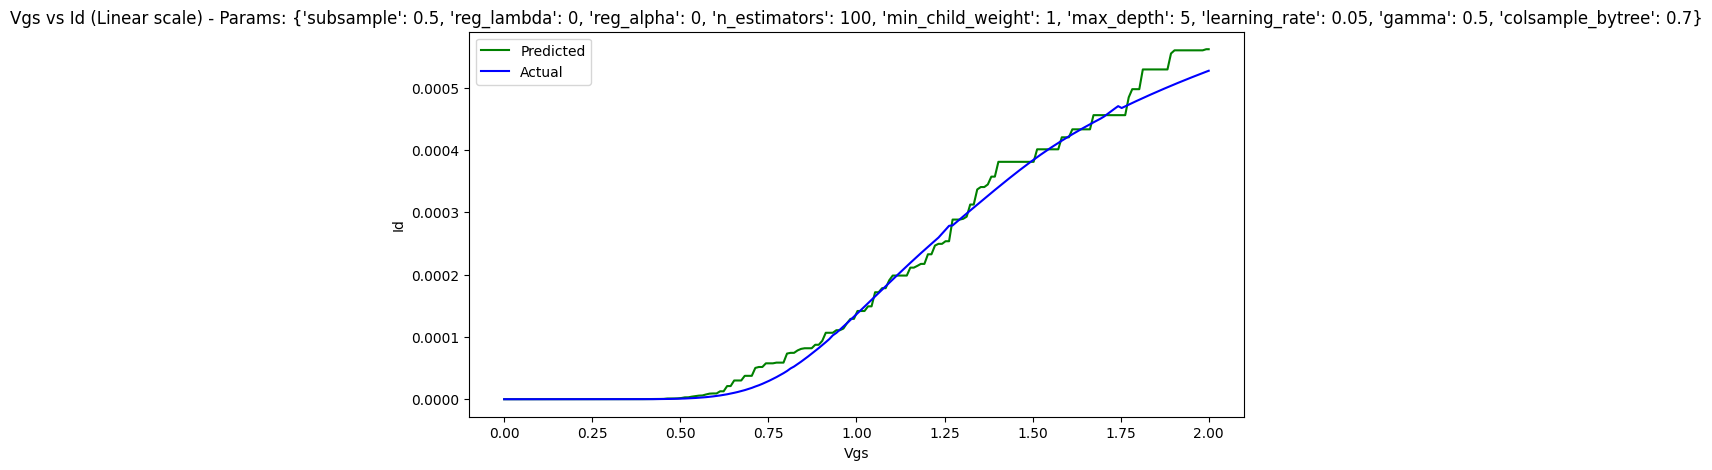

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.5}


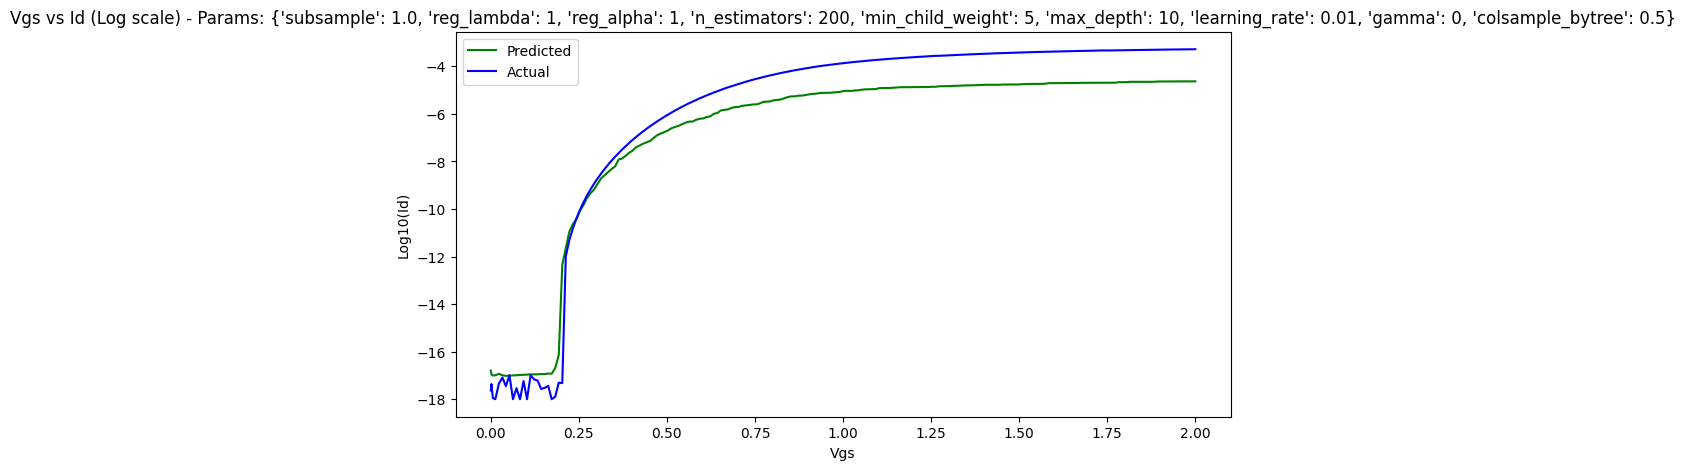

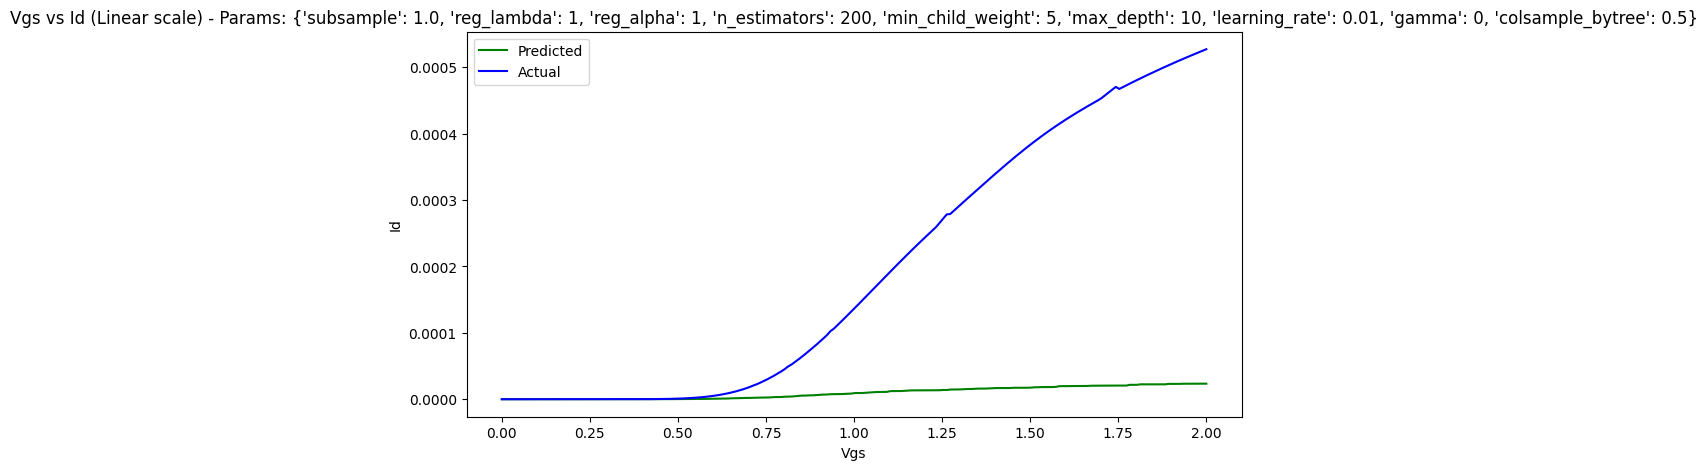

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.5}


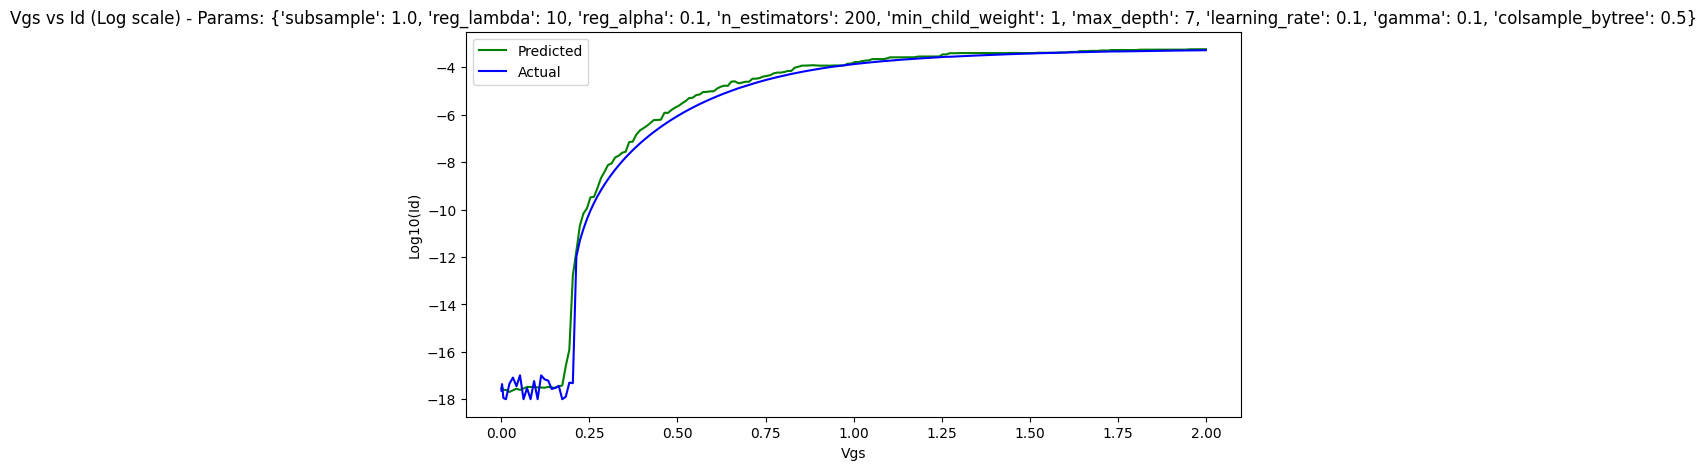

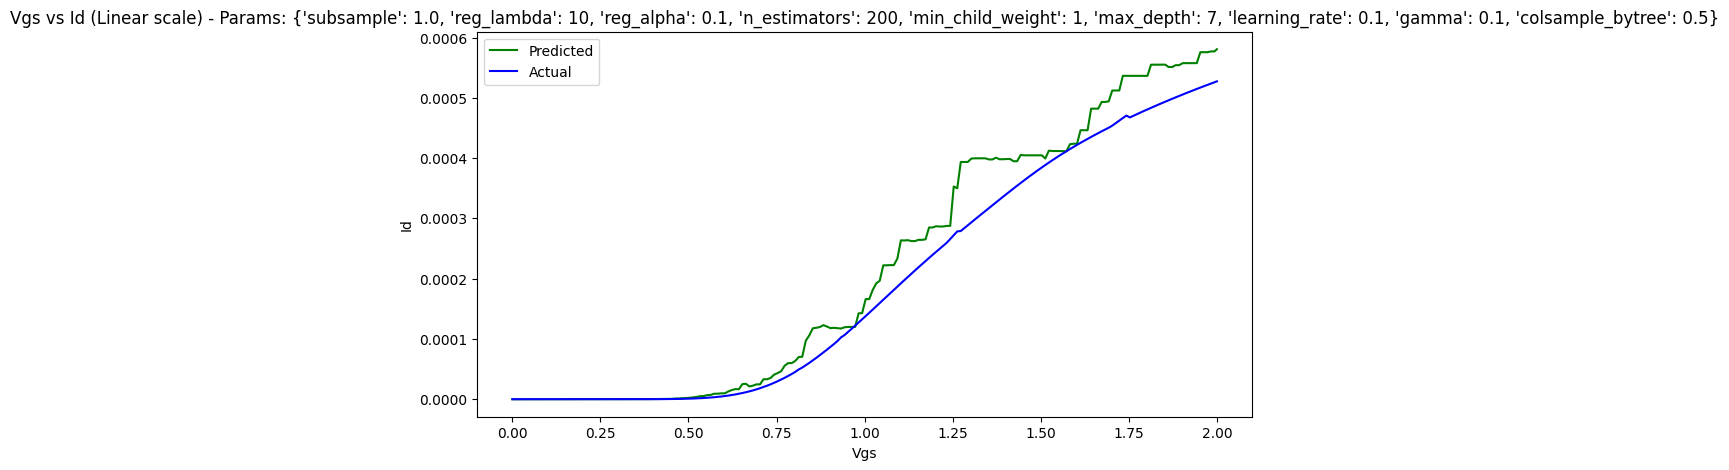

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}


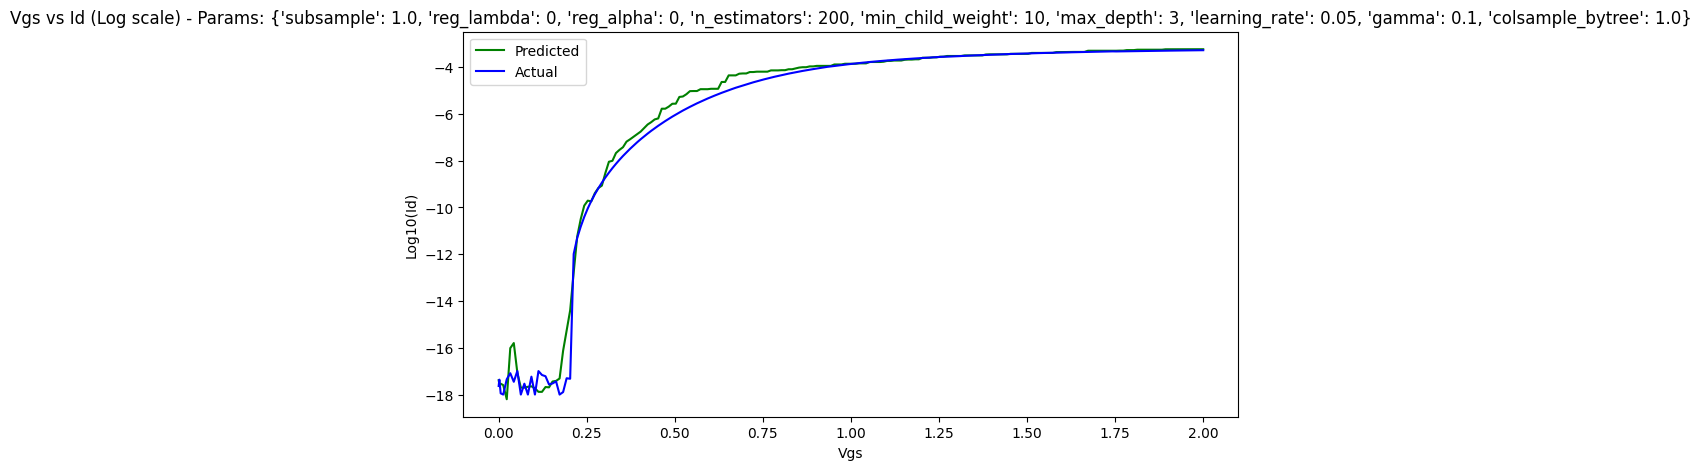

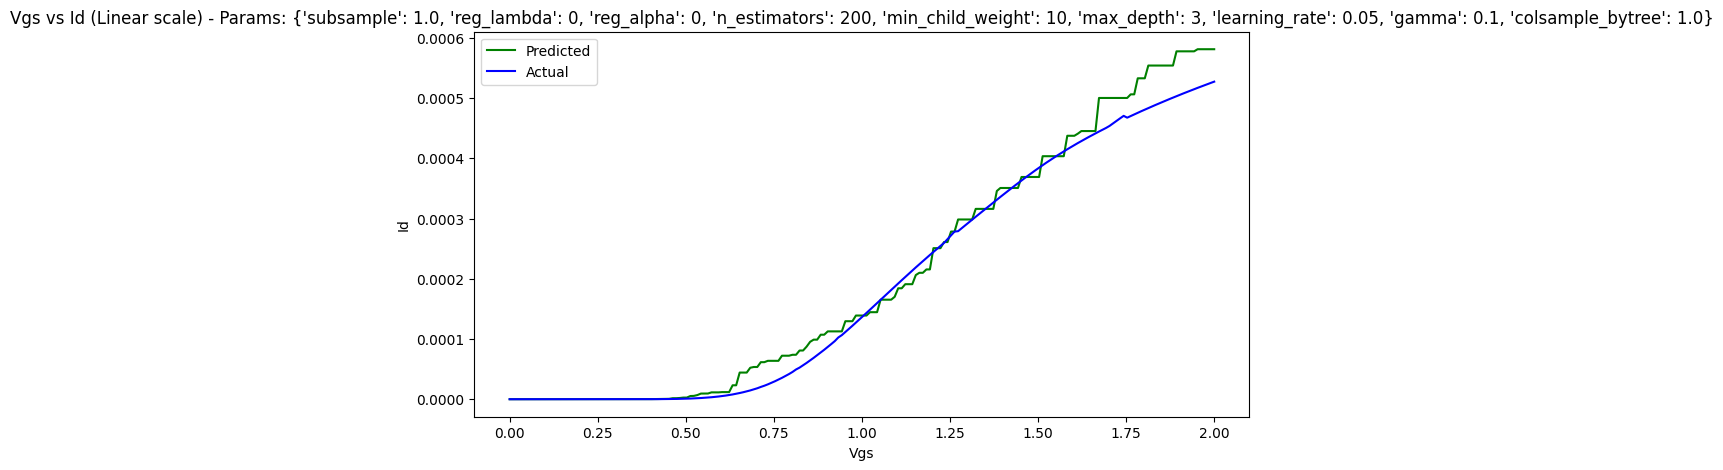

-------------
-------------------
---------------

{'subsample': 0.5, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.7}


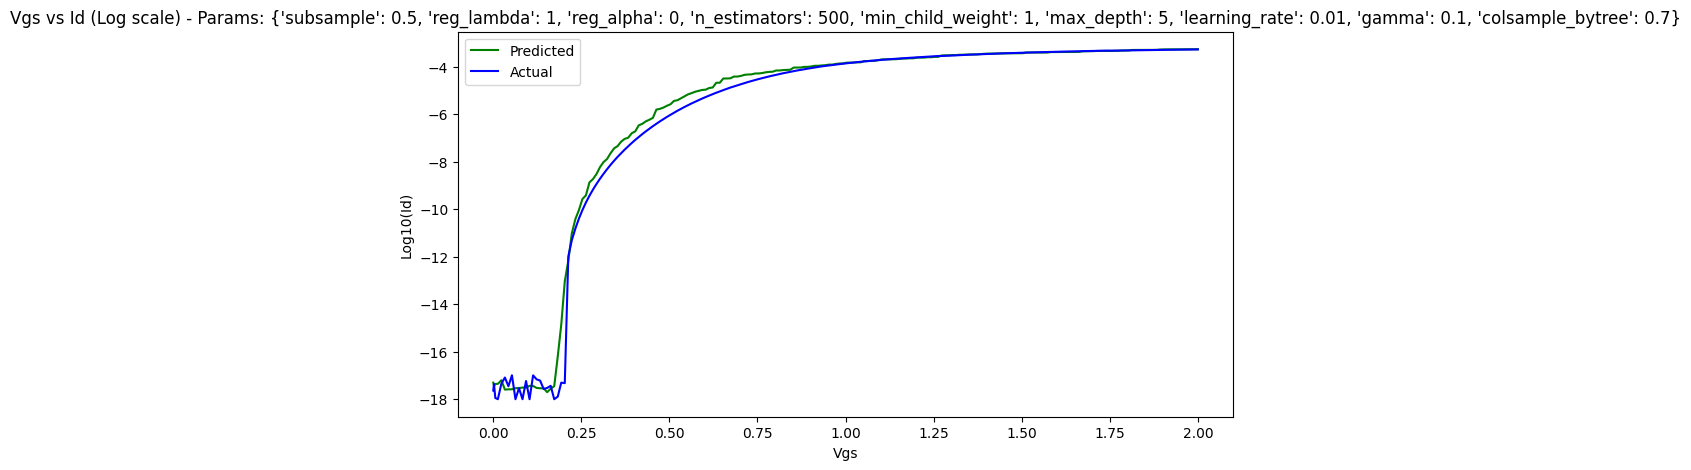

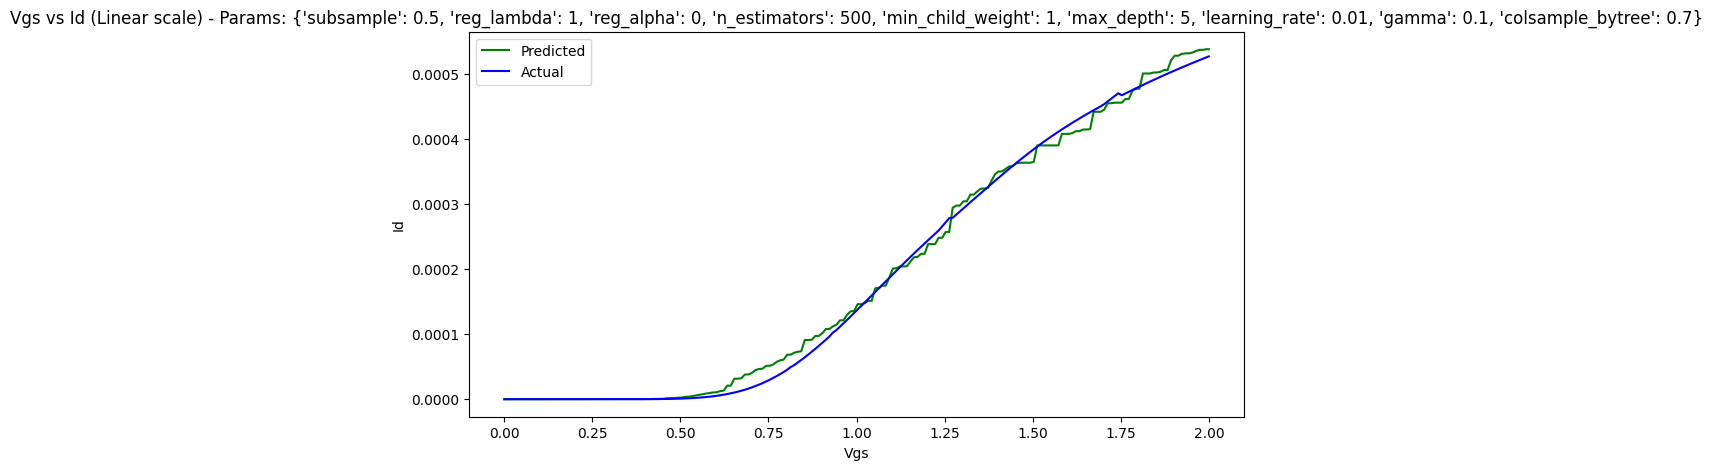

-------------
-------------------
---------------

{'subsample': 0.7, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


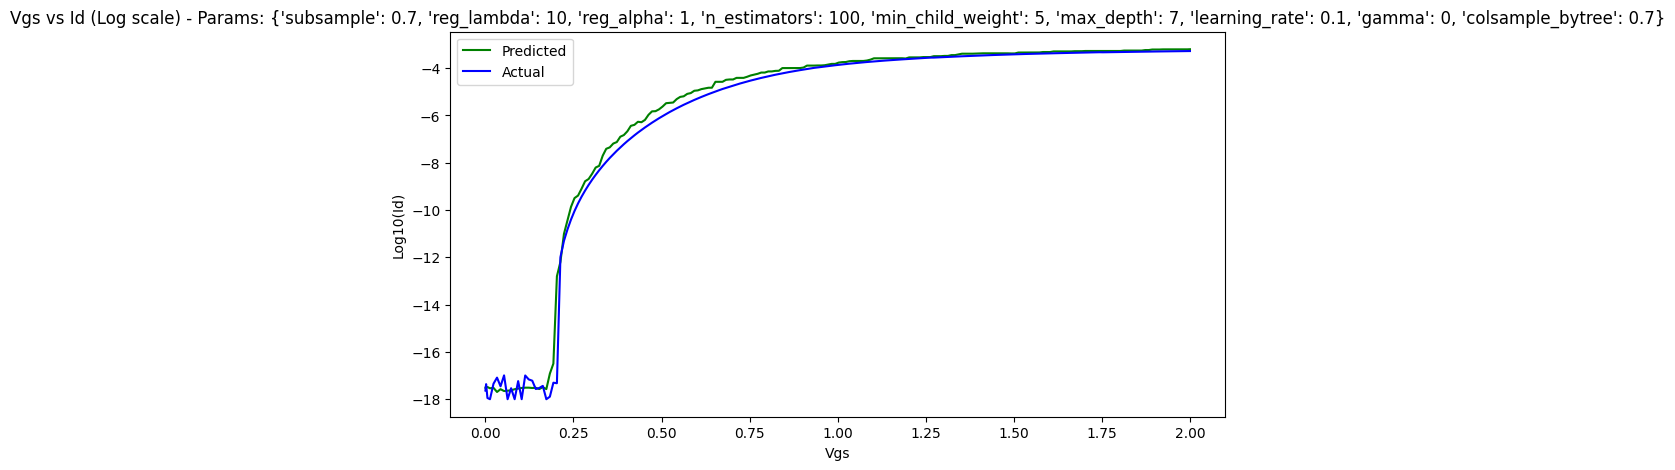

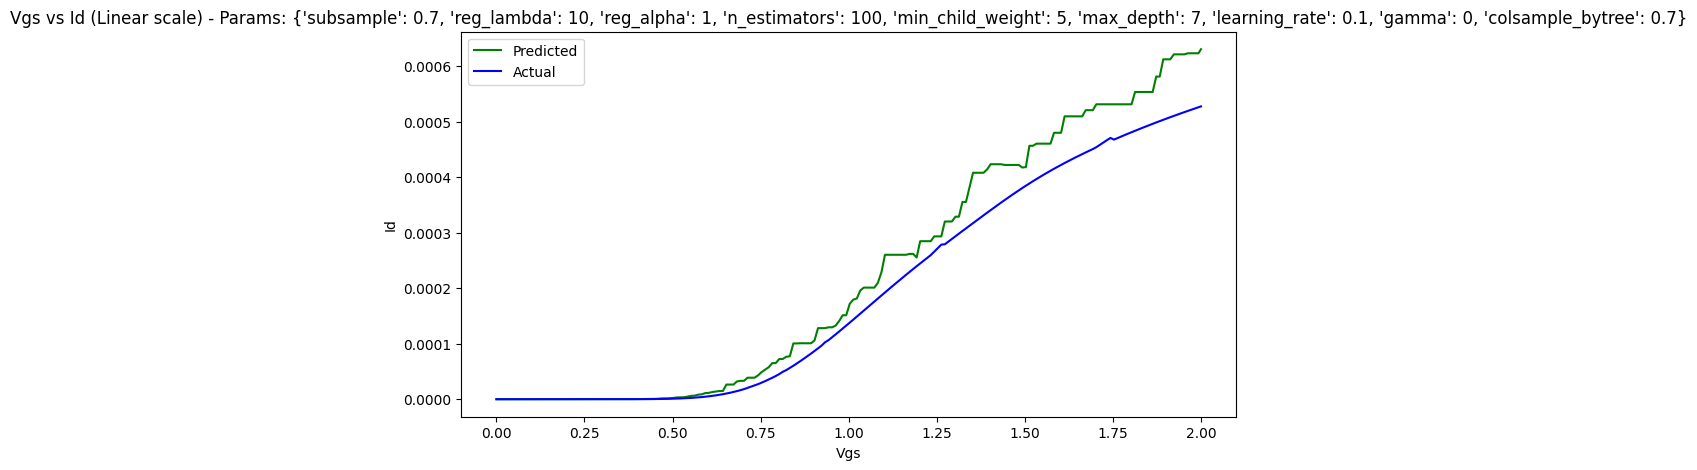

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}


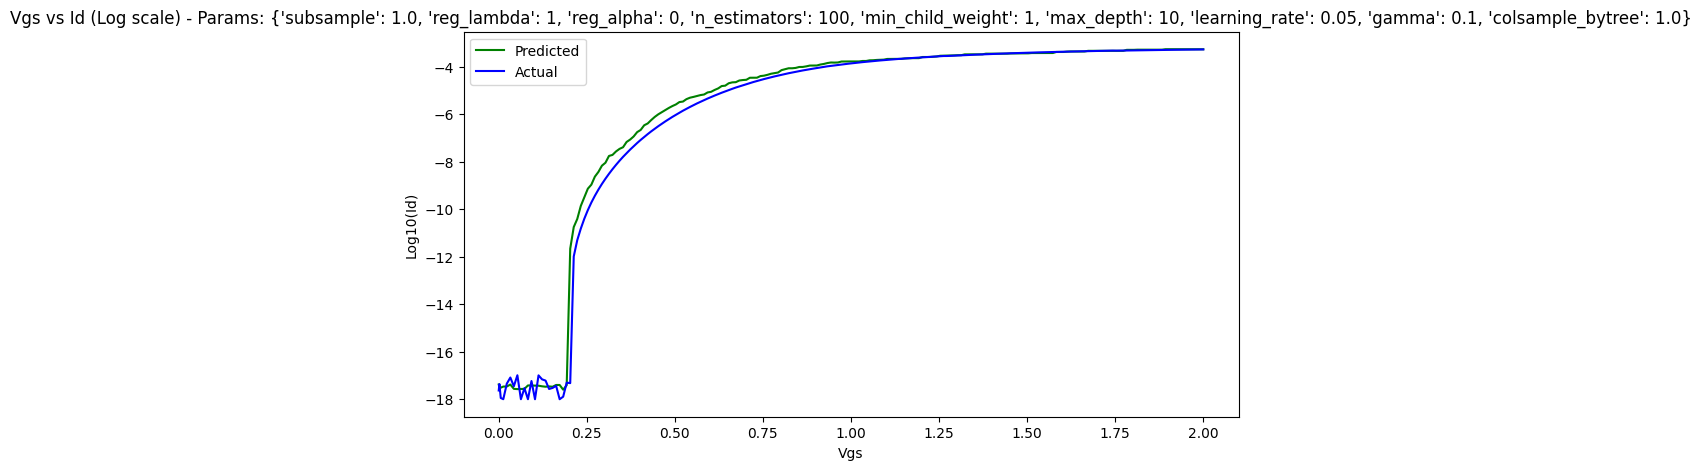

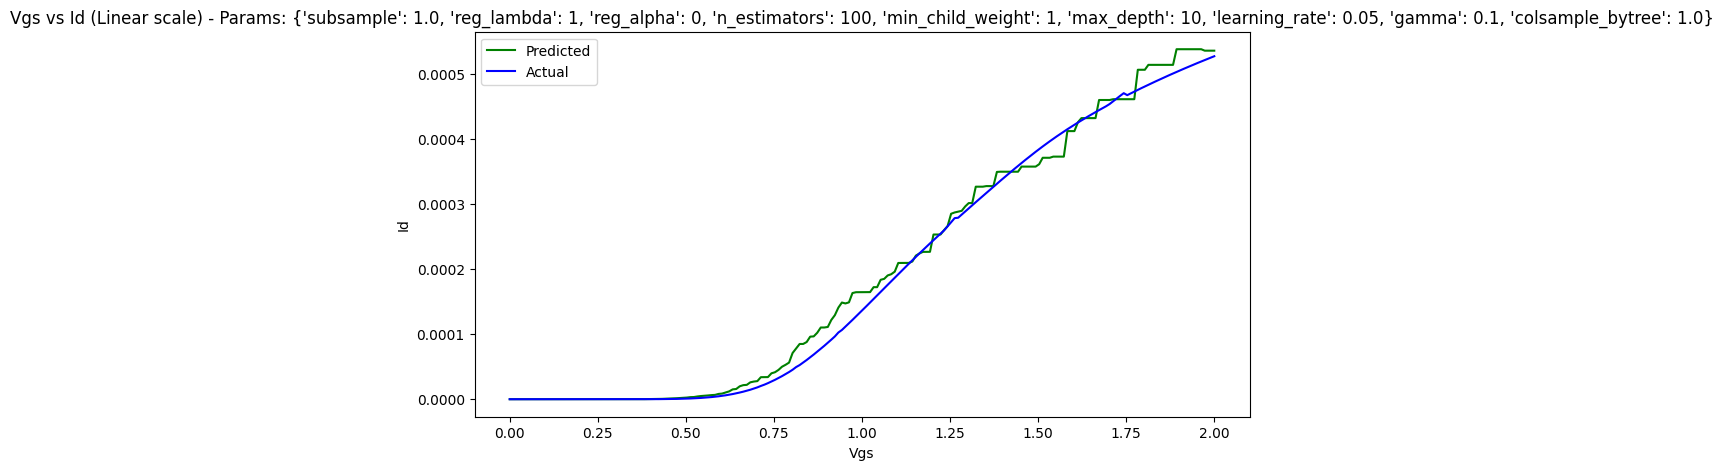

-------------
-------------------
---------------

{'subsample': 0.7, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.5}


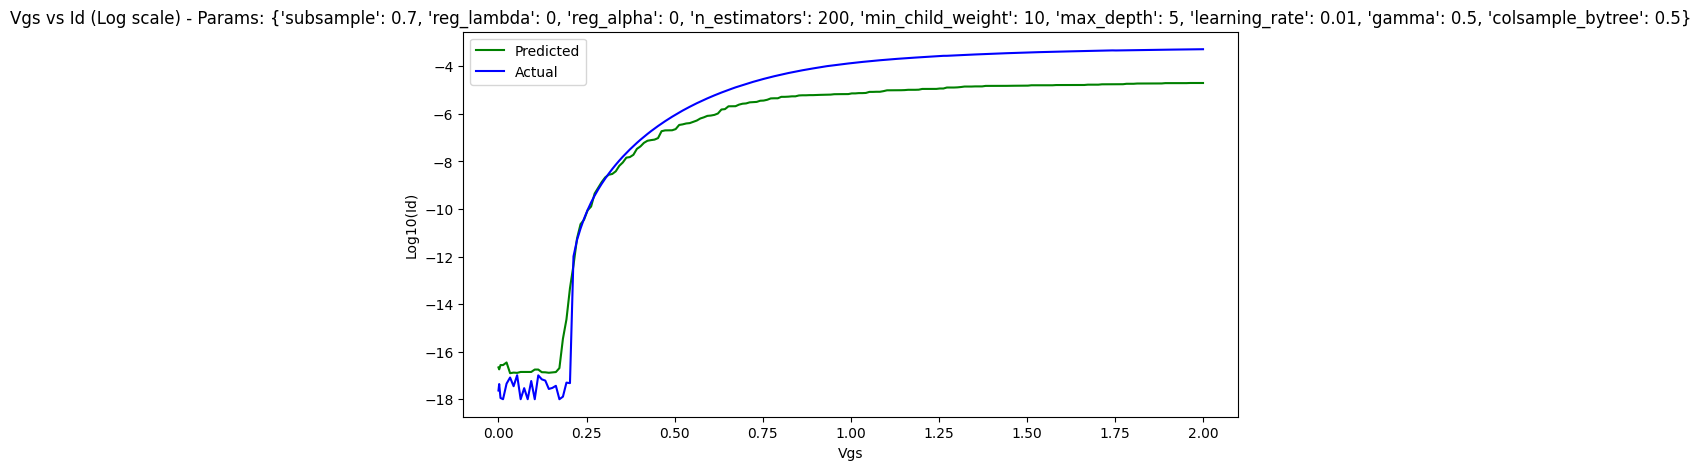

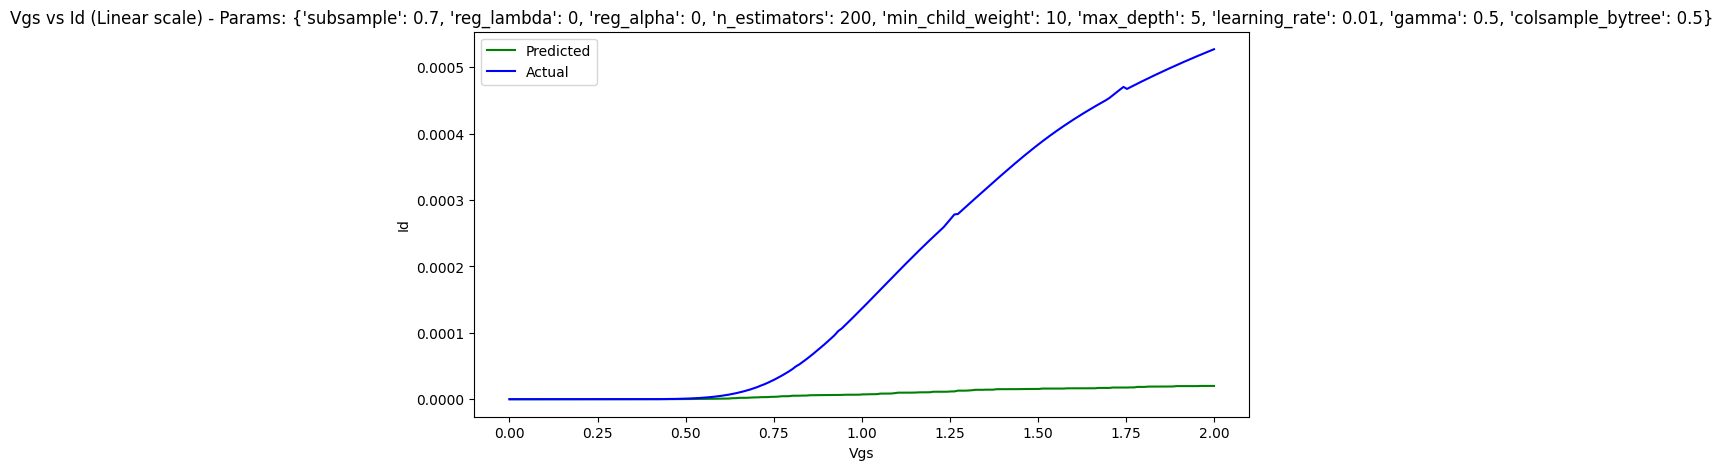

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.7}


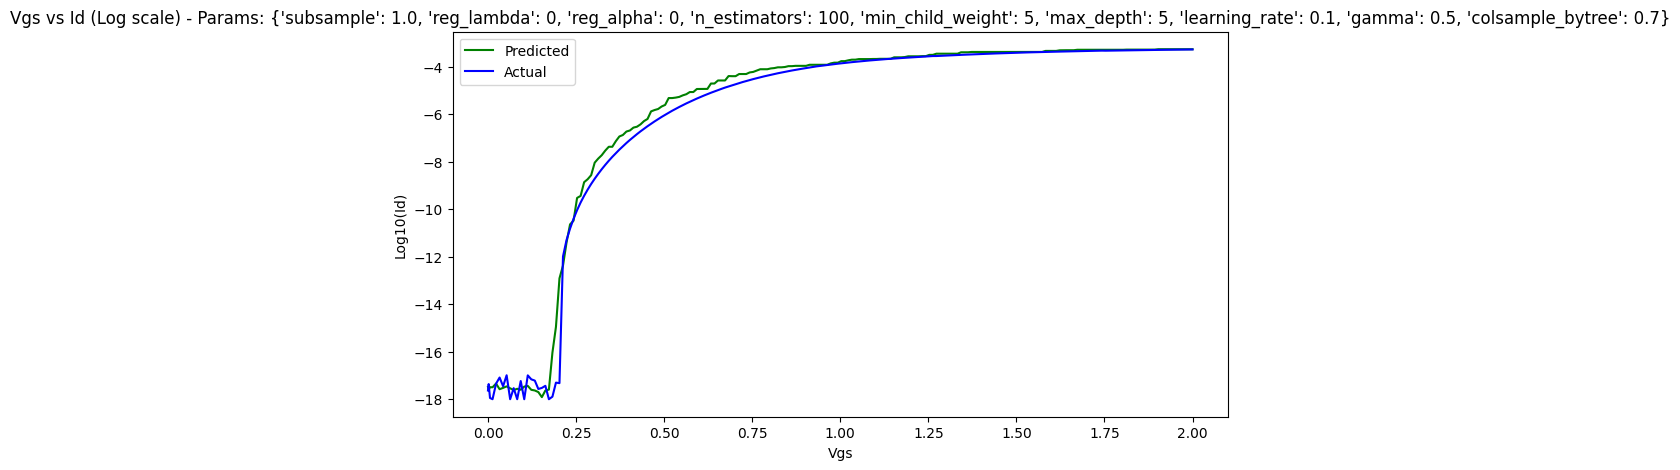

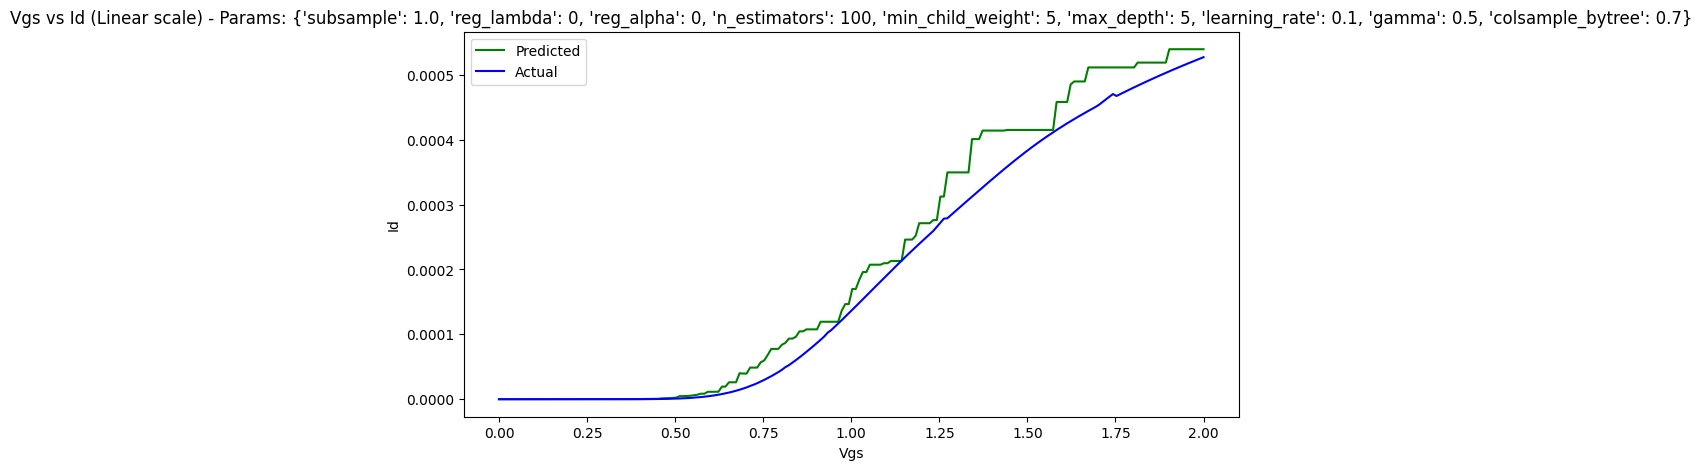

-------------
-------------------
---------------

{'subsample': 0.7, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.5}


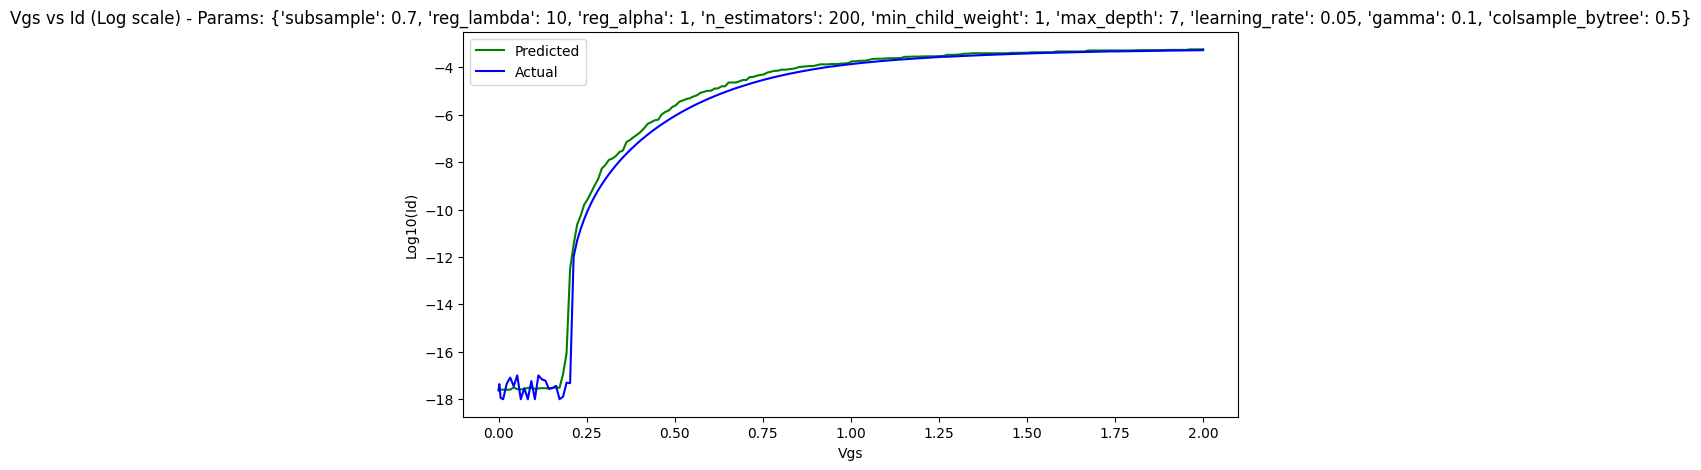

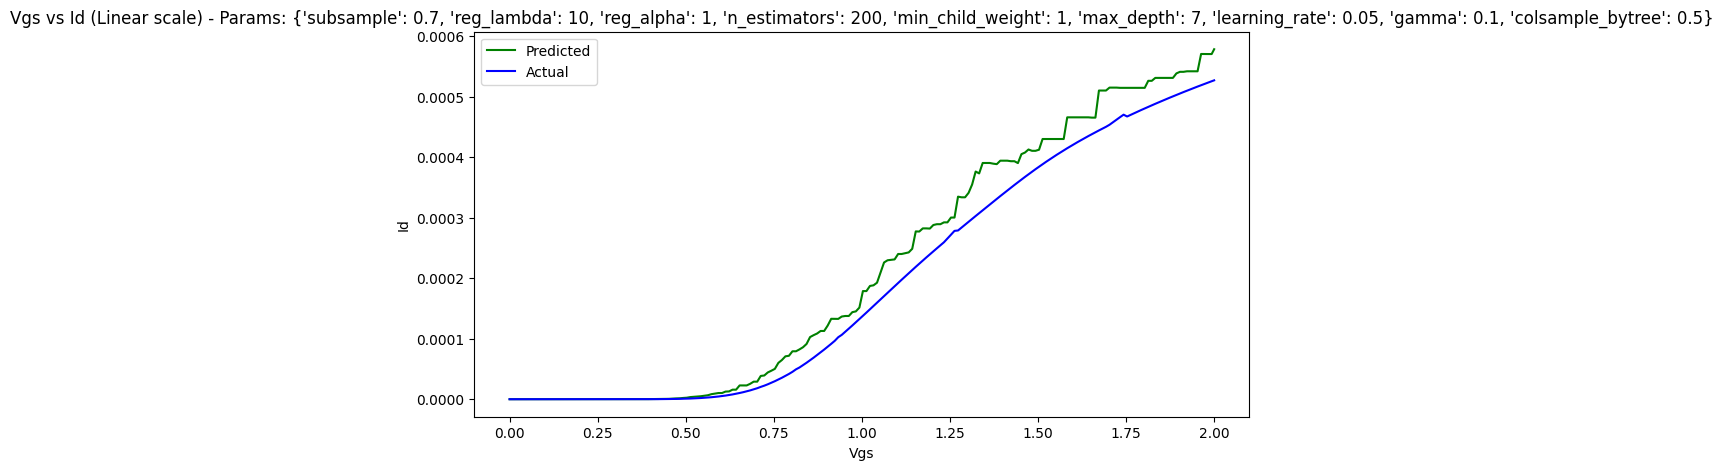

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}


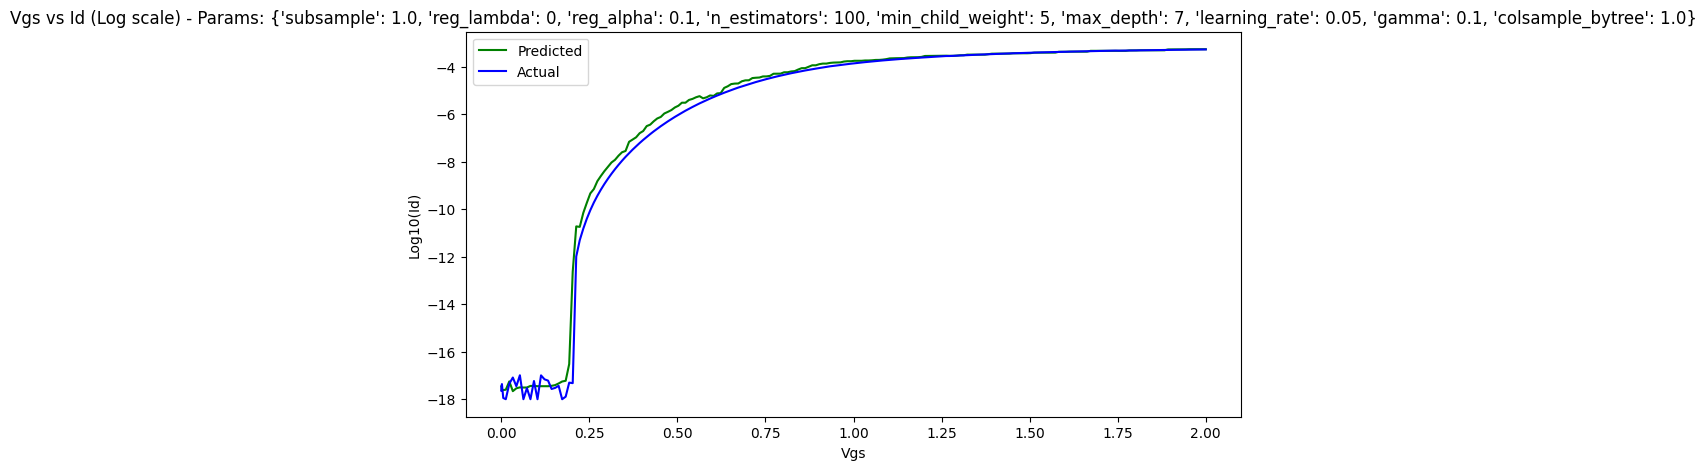

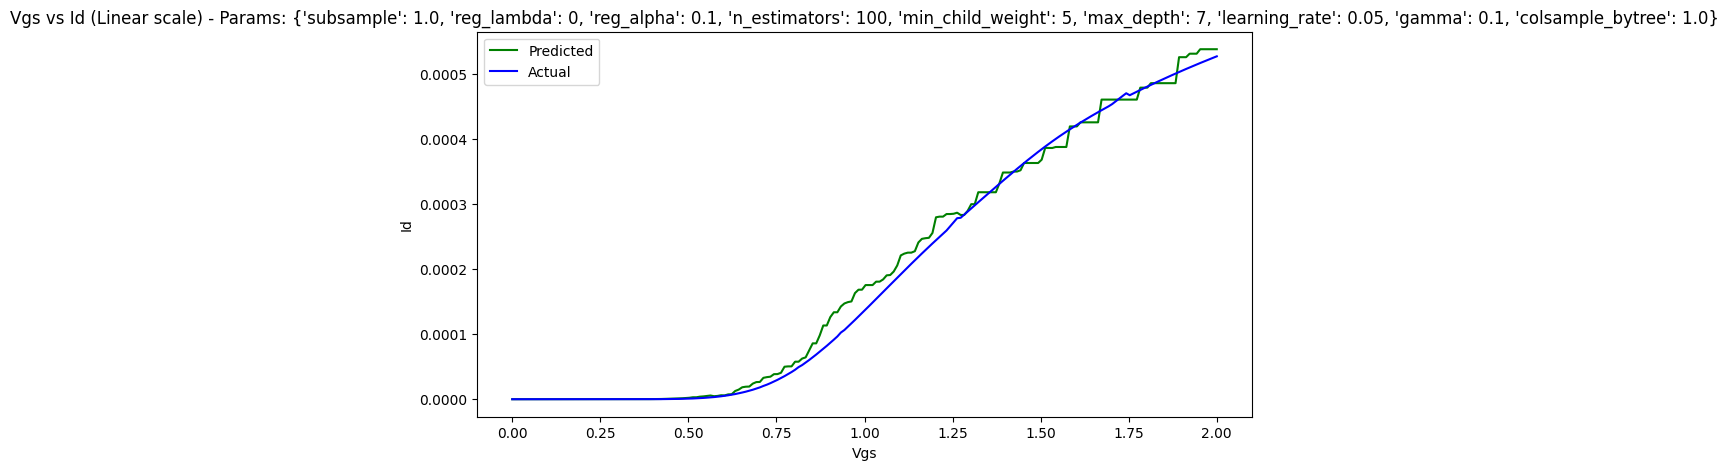

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}


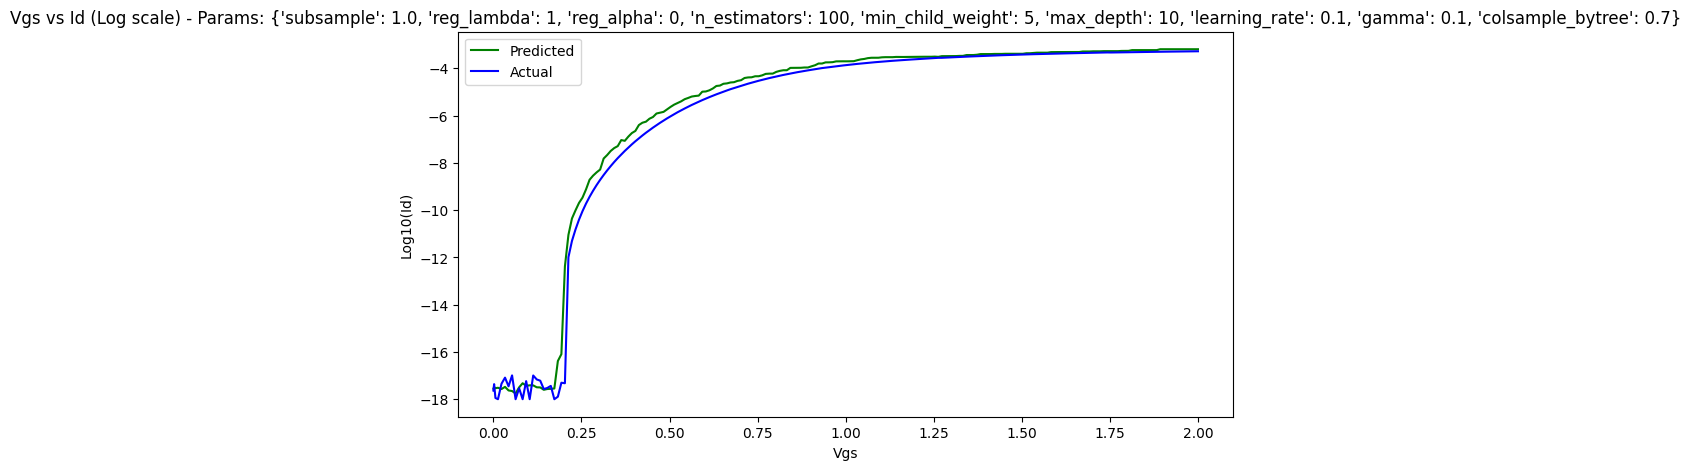

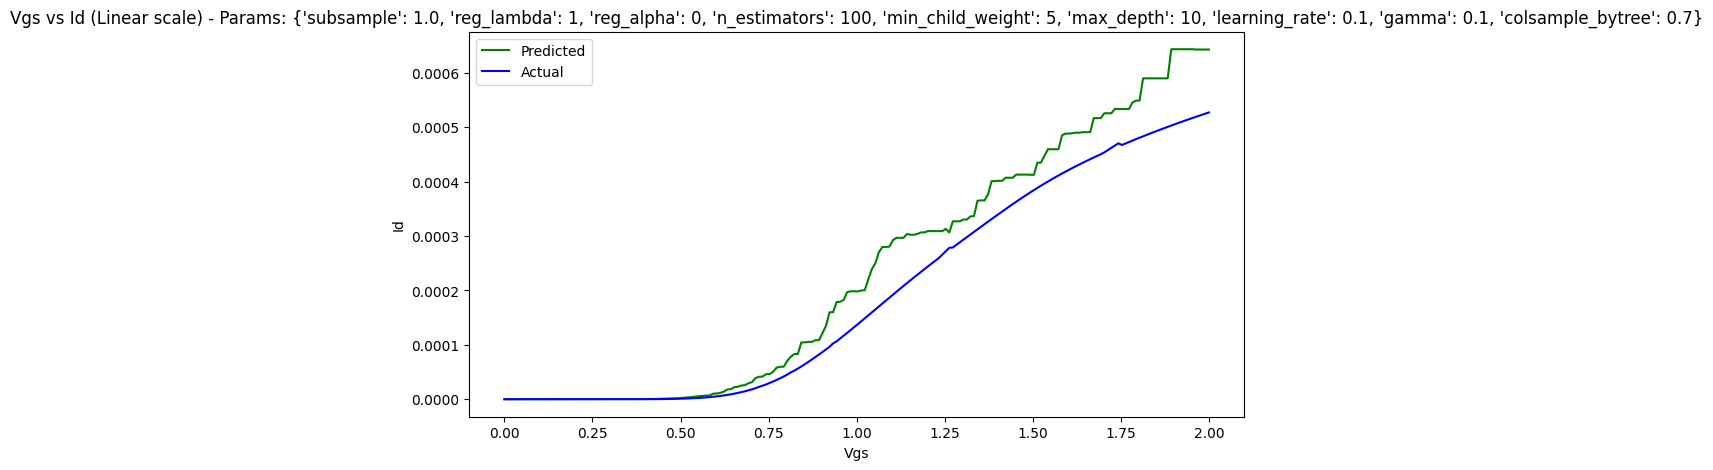

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


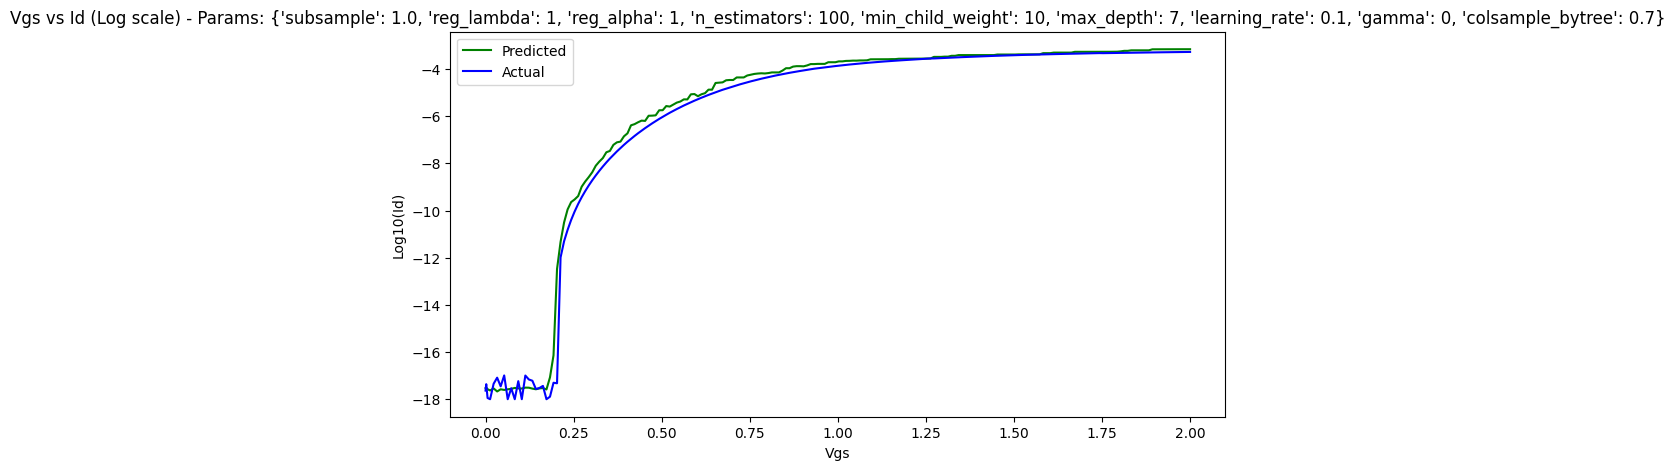

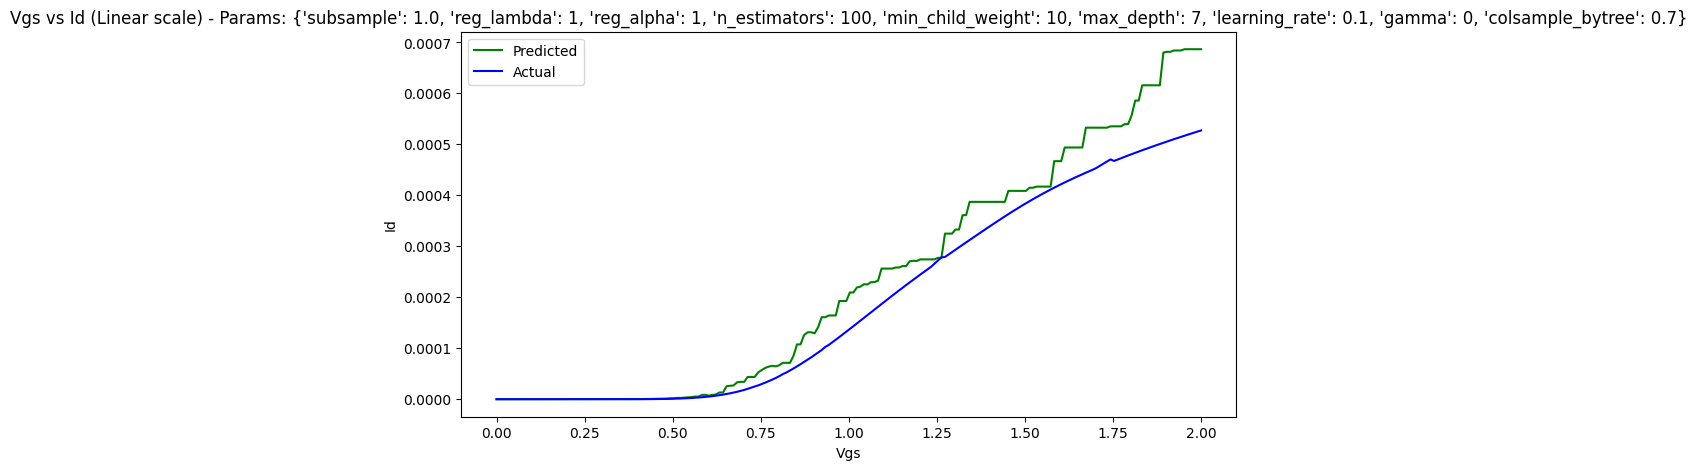

-------------
-------------------
---------------

{'subsample': 0.5, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.7}


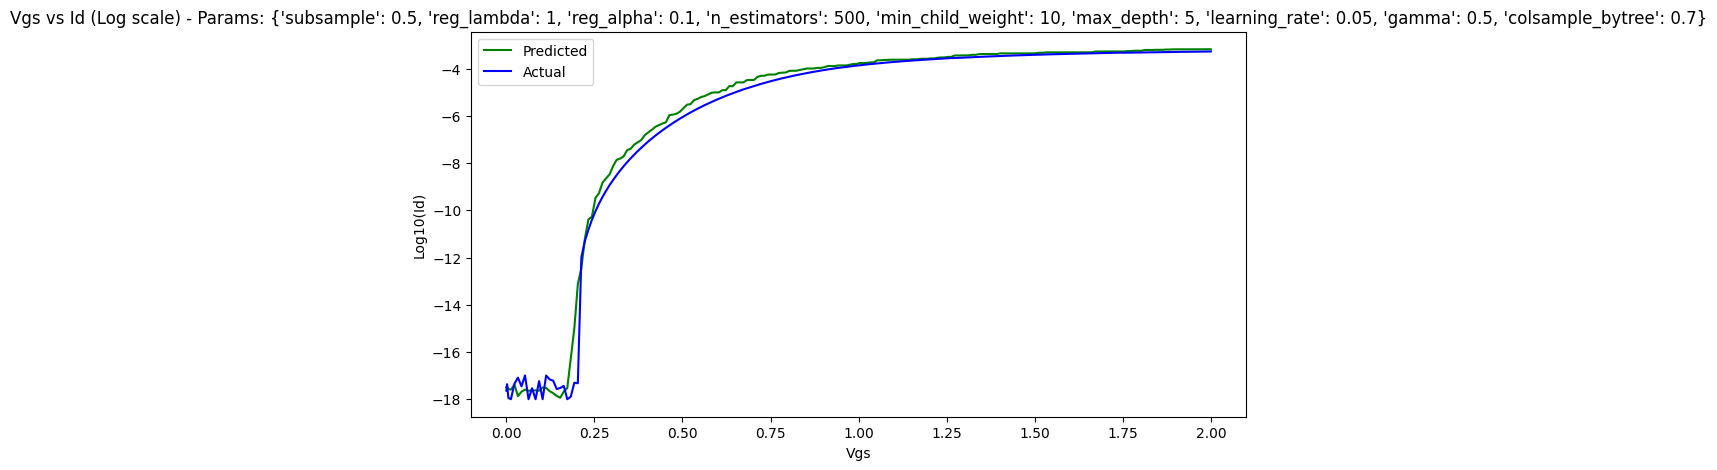

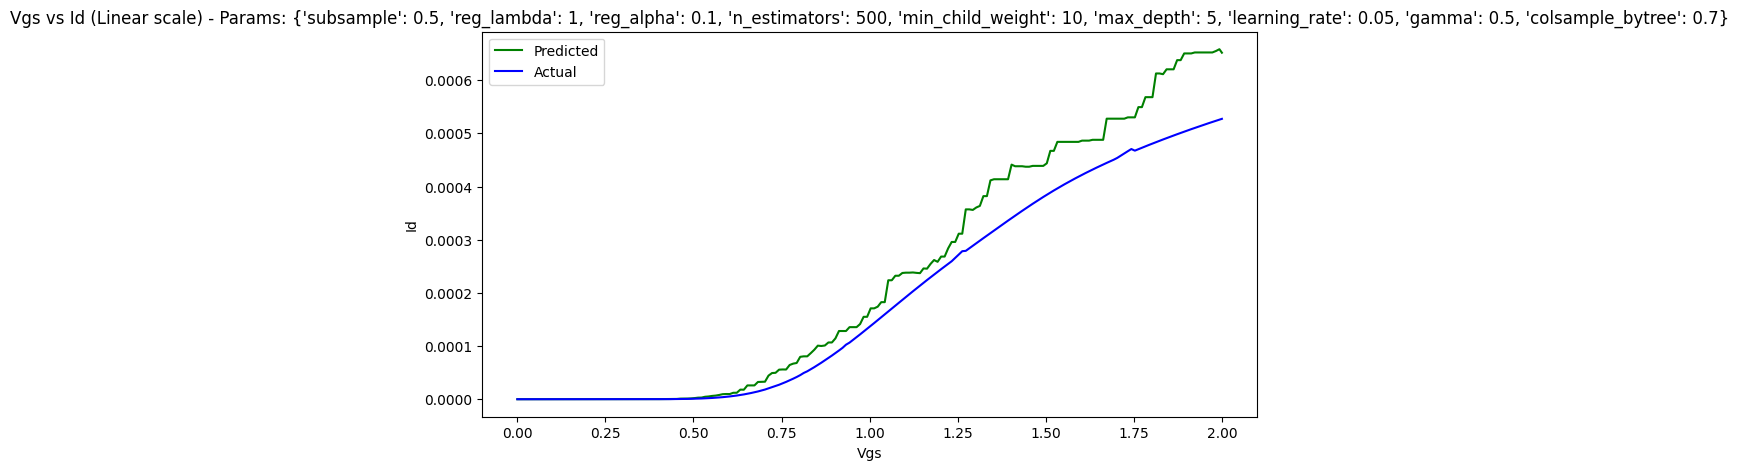

-------------
-------------------
---------------

{'subsample': 0.5, 'reg_lambda': 10, 'reg_alpha': 0, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.5}


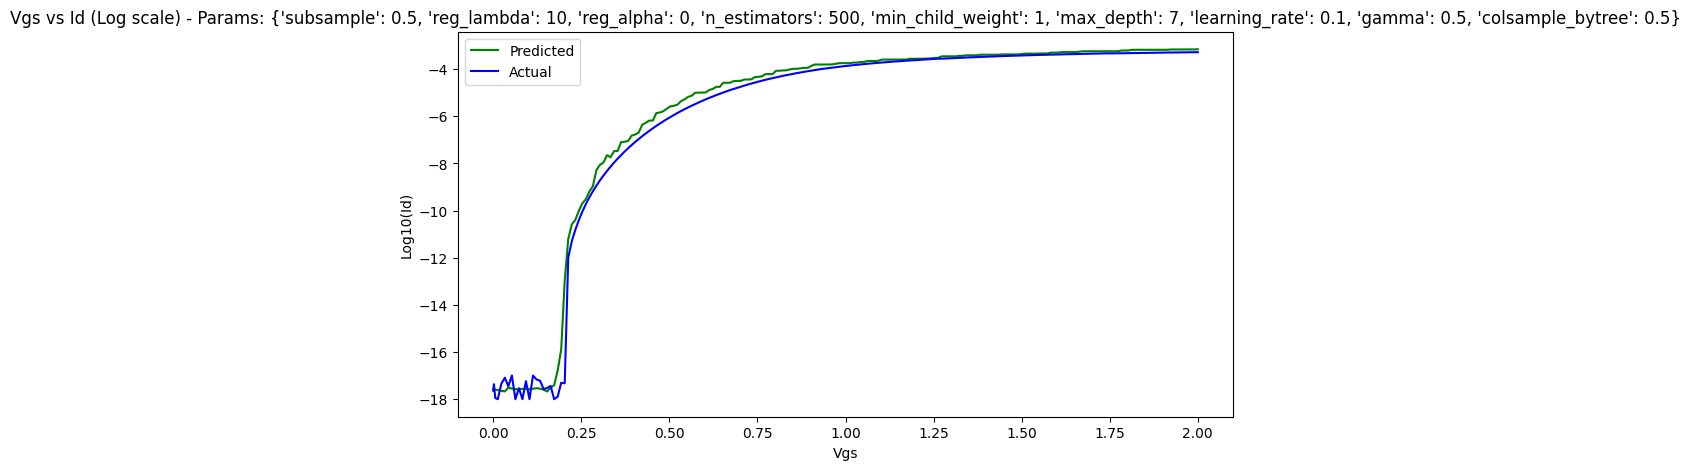

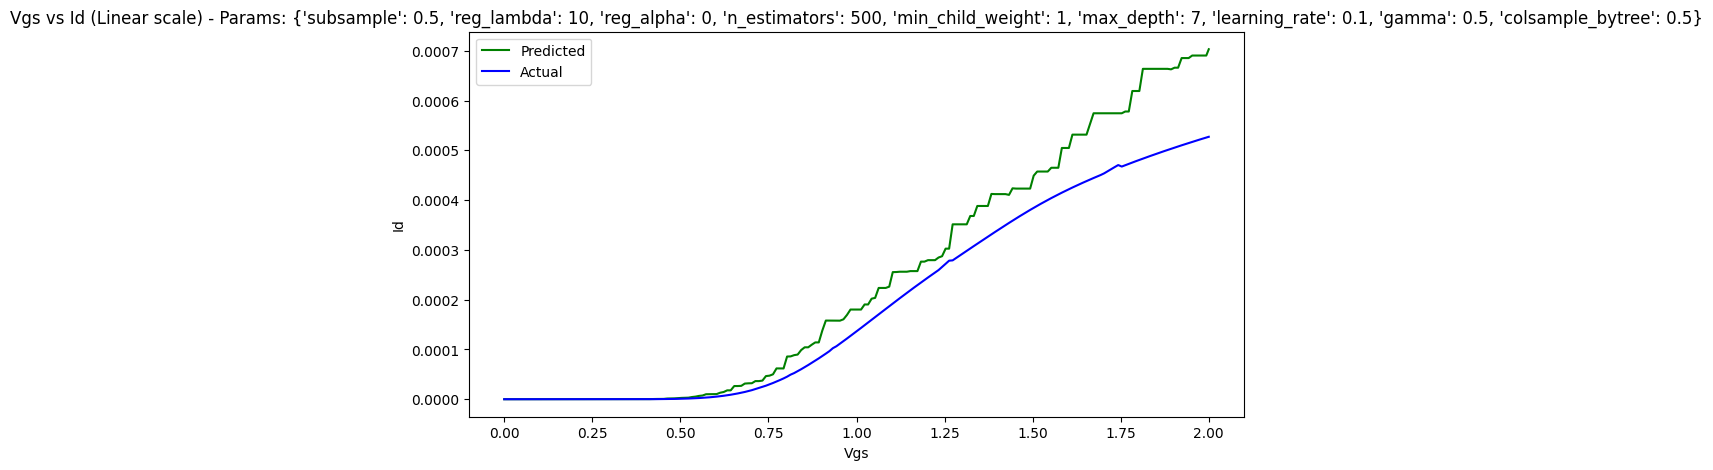

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.5}


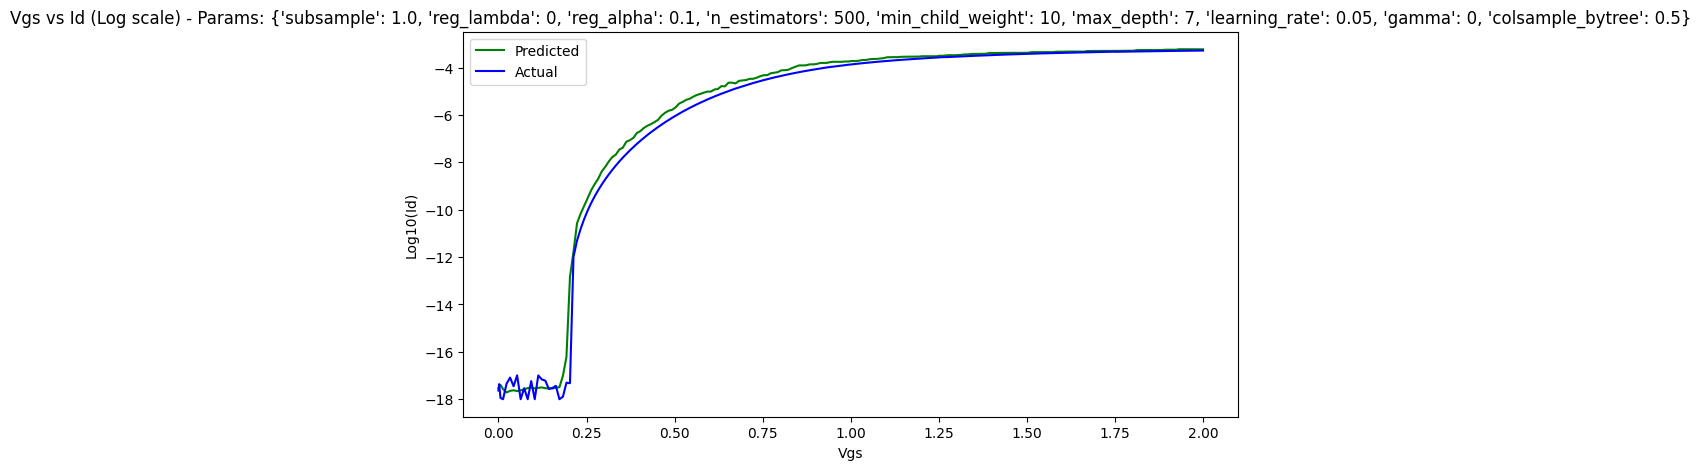

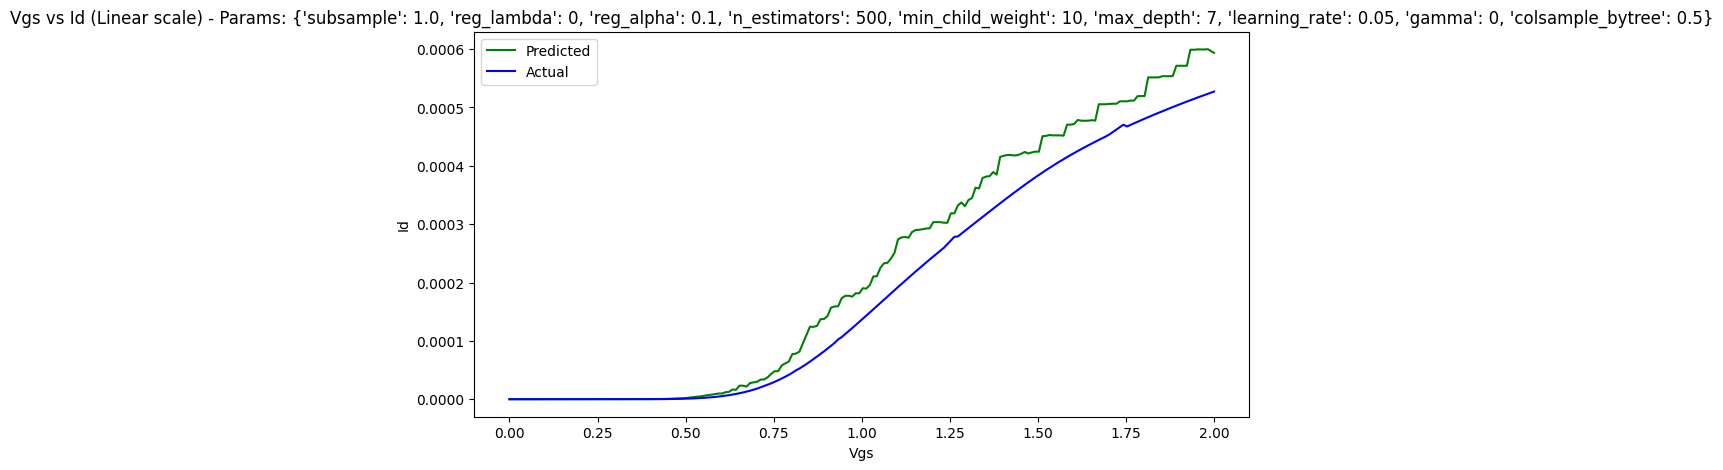

-------------
-------------------
---------------

{'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.5}


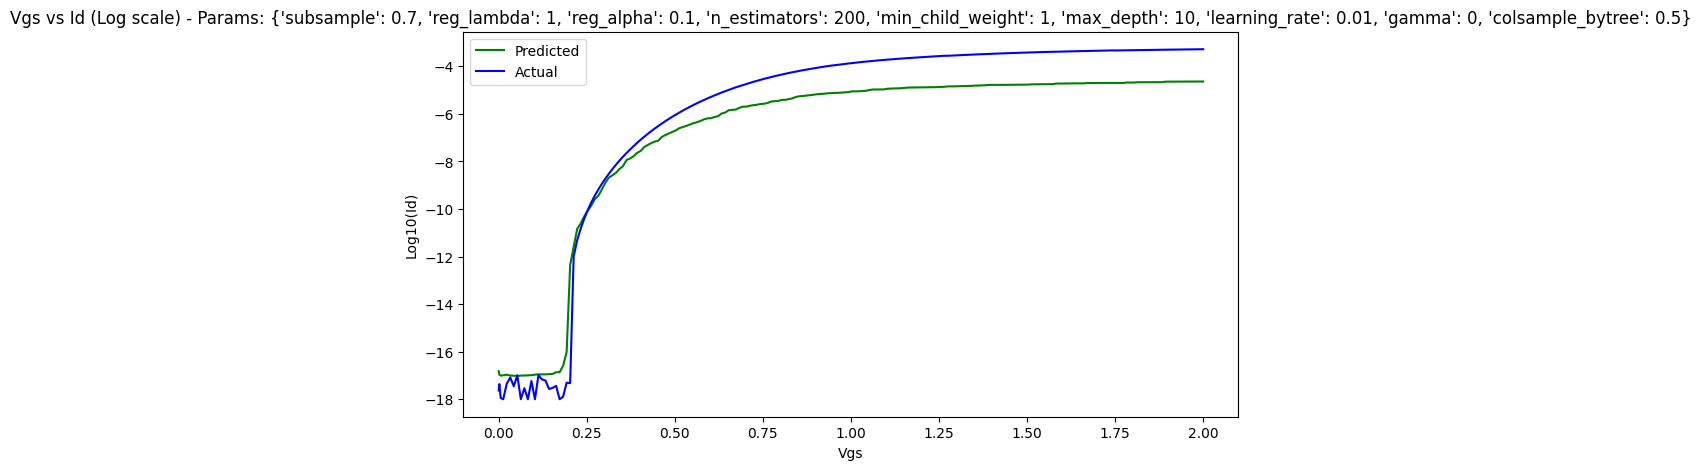

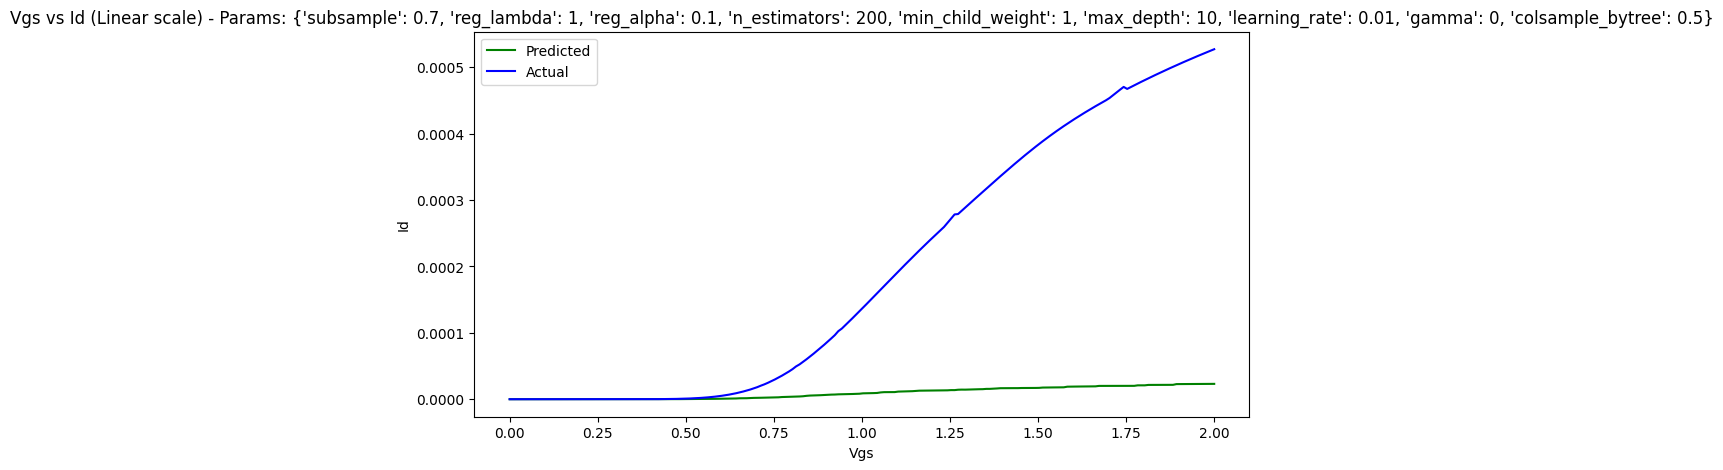

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 1.0}


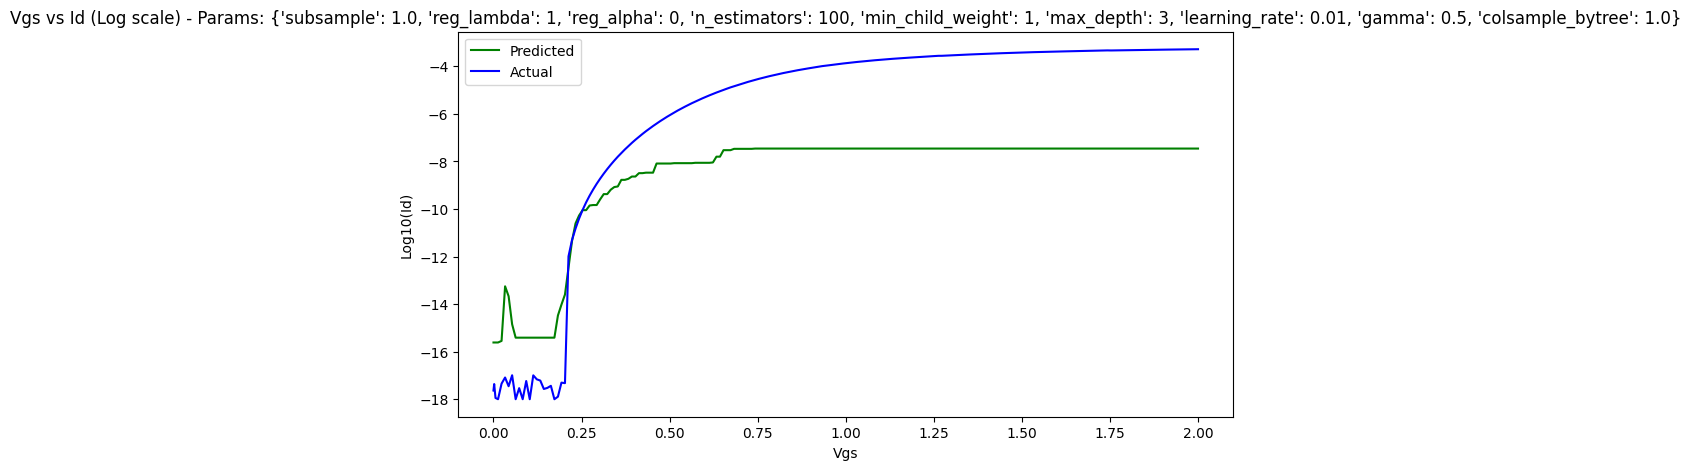

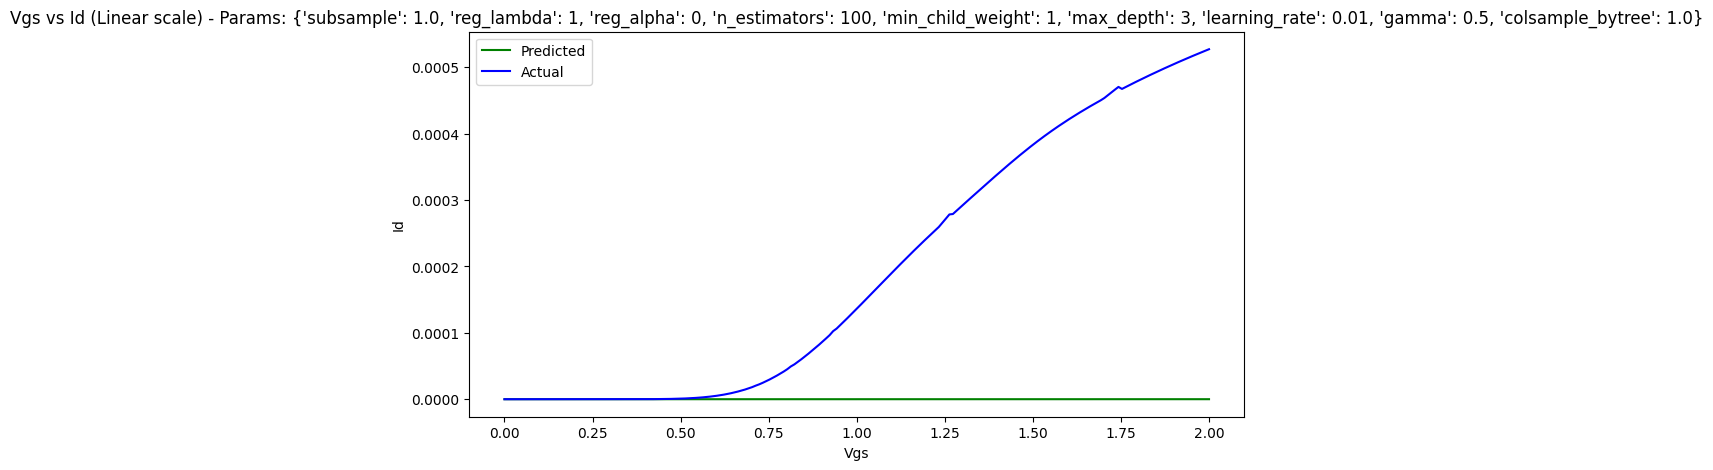

-------------
-------------------
---------------

{'subsample': 0.5, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.5}


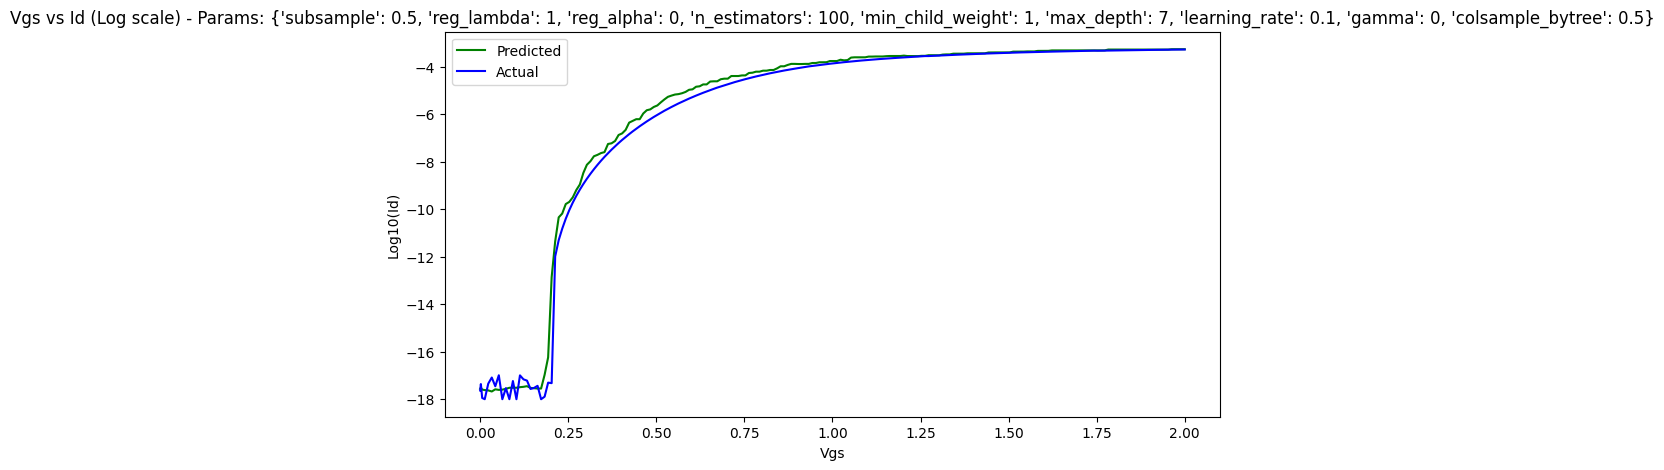

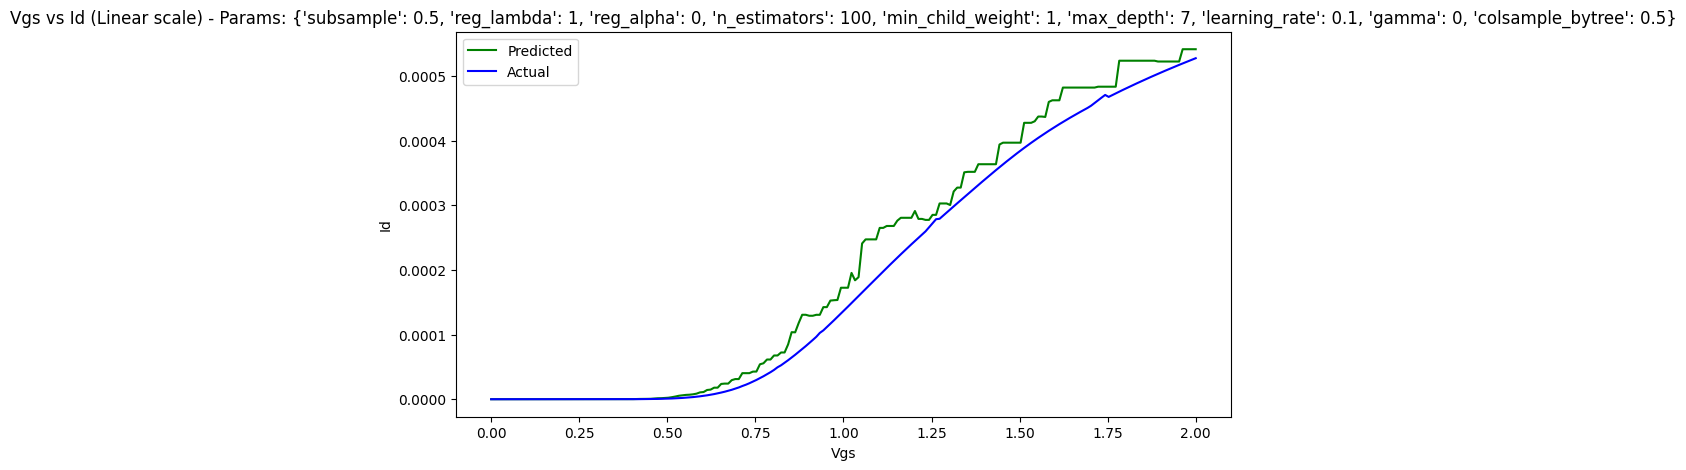

-------------
-------------------
---------------

{'subsample': 0.7, 'reg_lambda': 0, 'reg_alpha': 1, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.5}


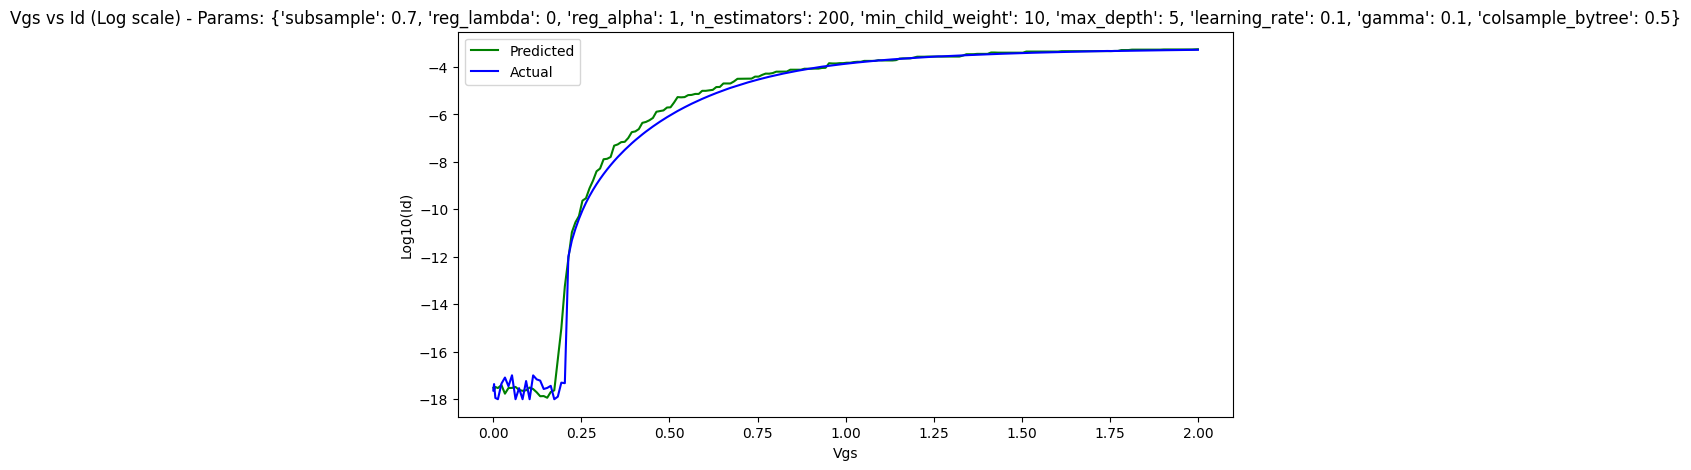

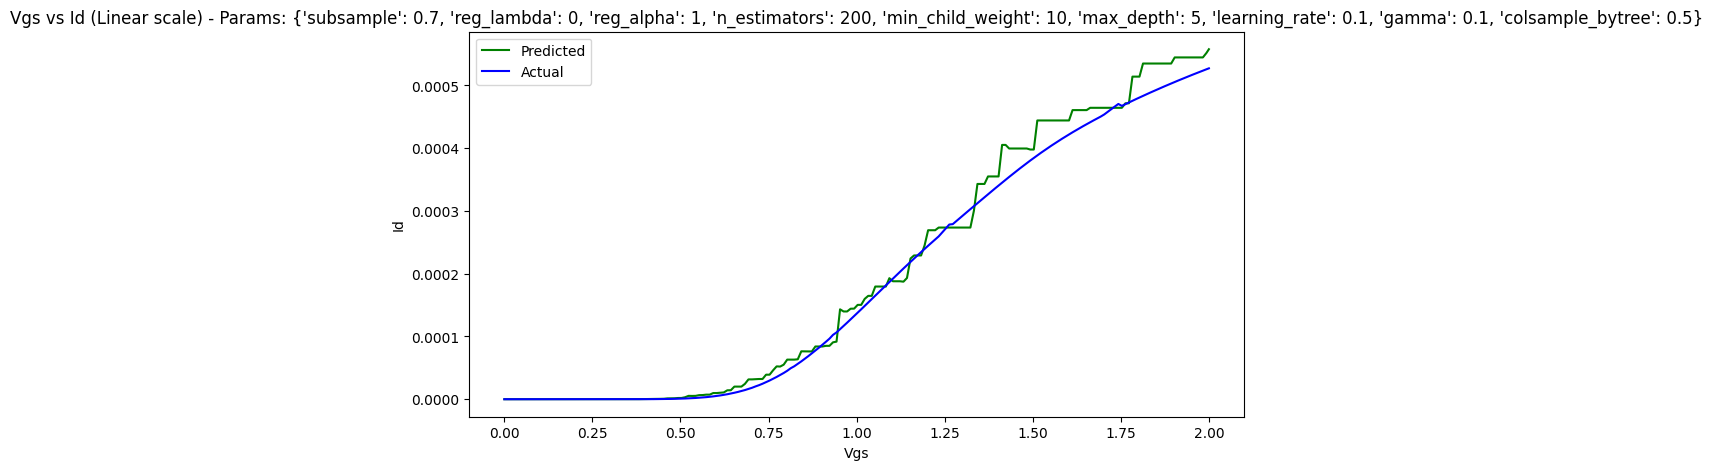

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.5}


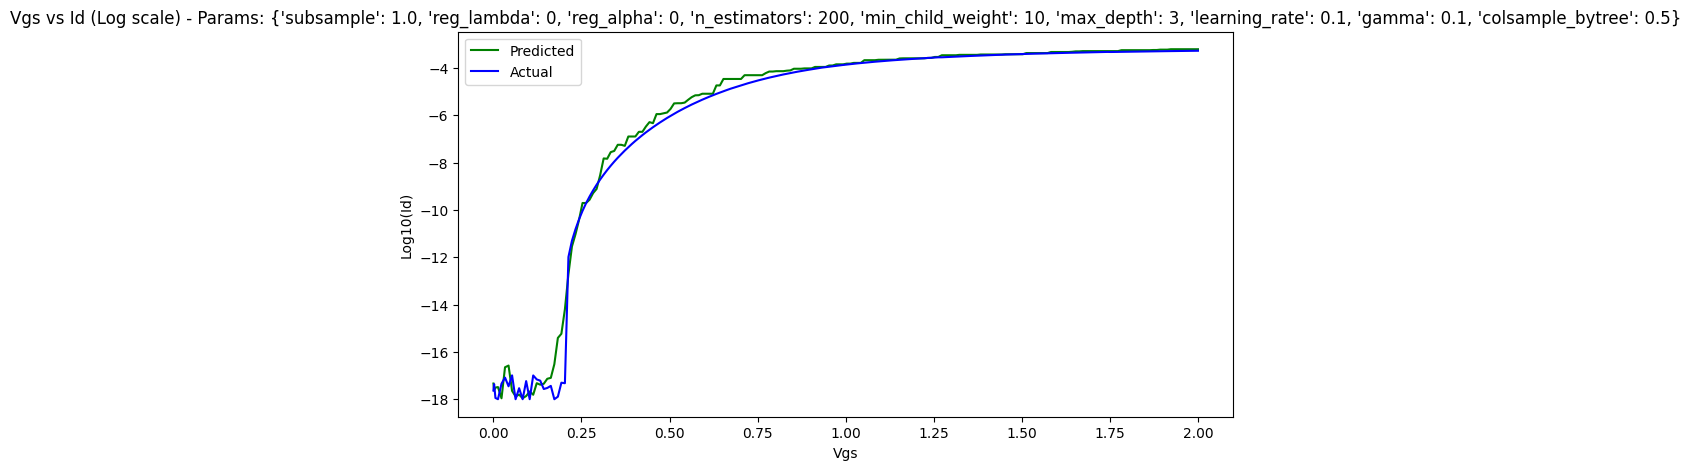

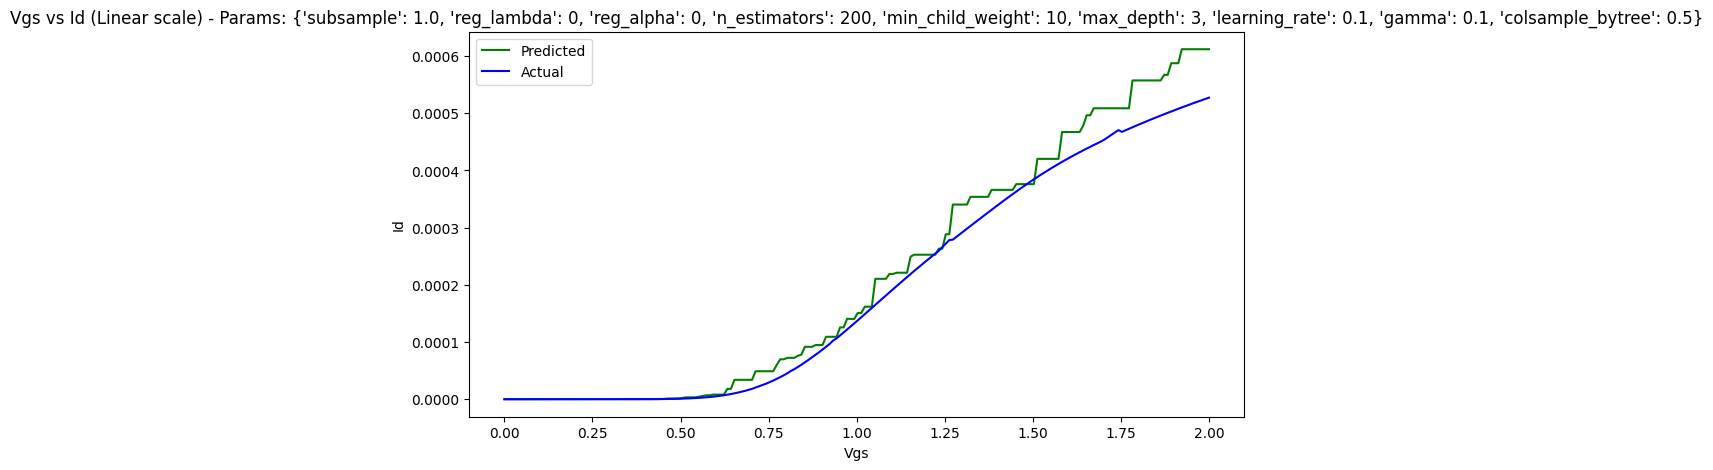

-------------
-------------------
---------------

{'subsample': 0.5, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.5}


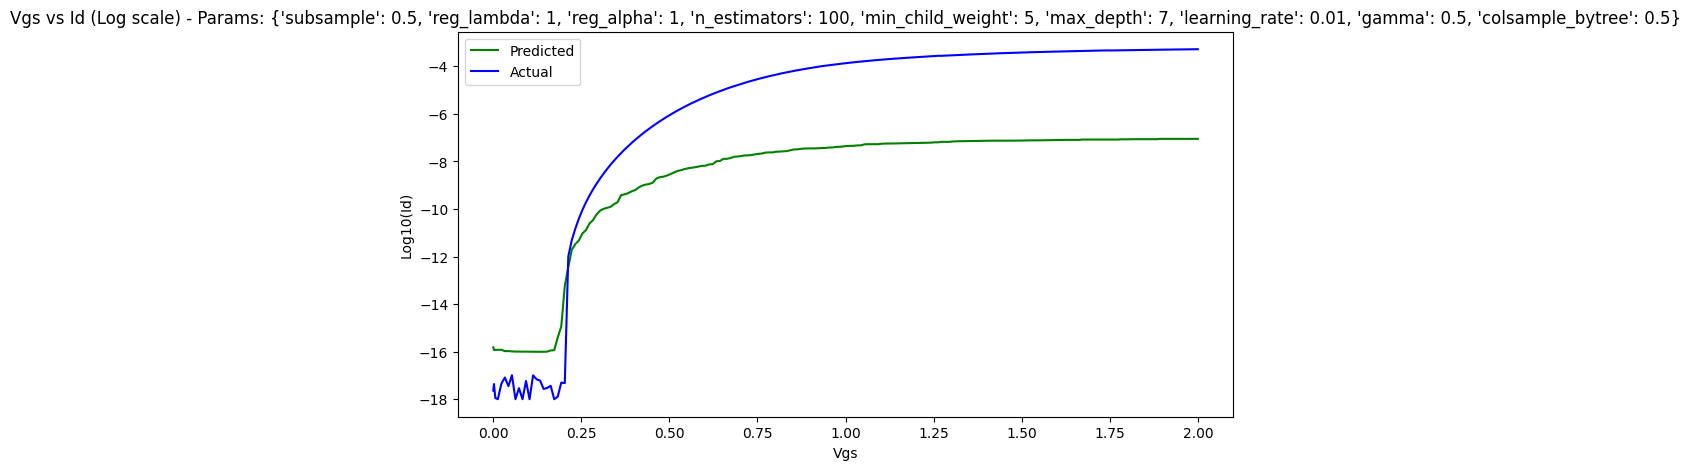

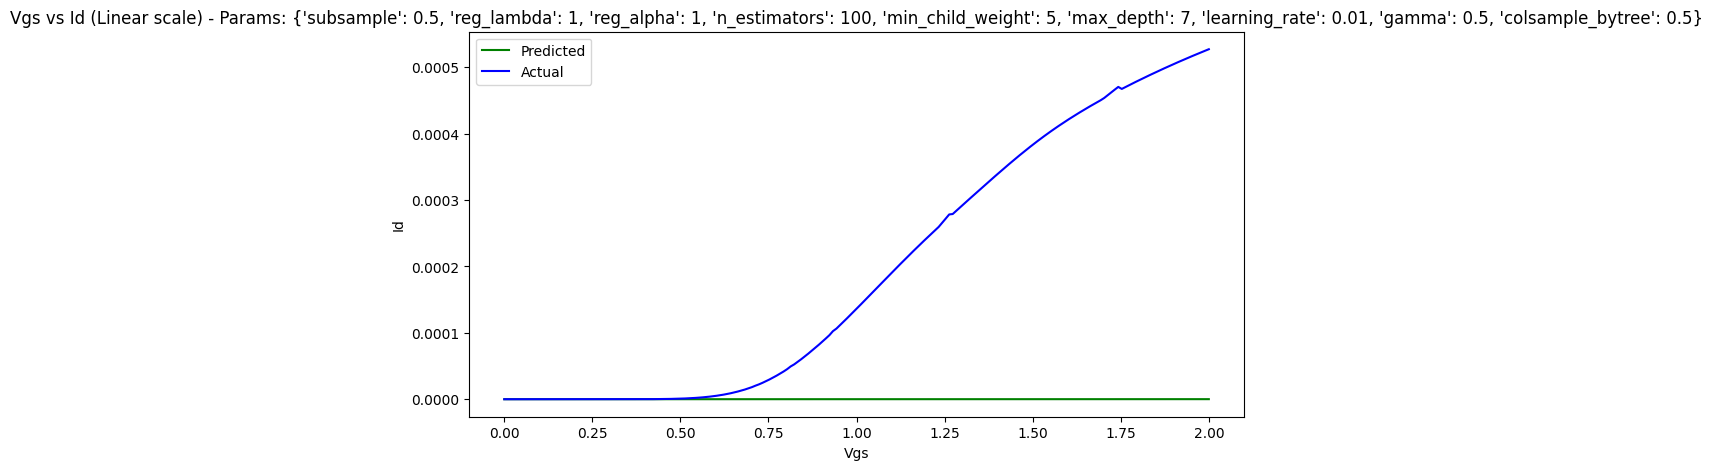

-------------
-------------------
---------------

{'subsample': 0.5, 'reg_lambda': 0, 'reg_alpha': 1, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 1.0}


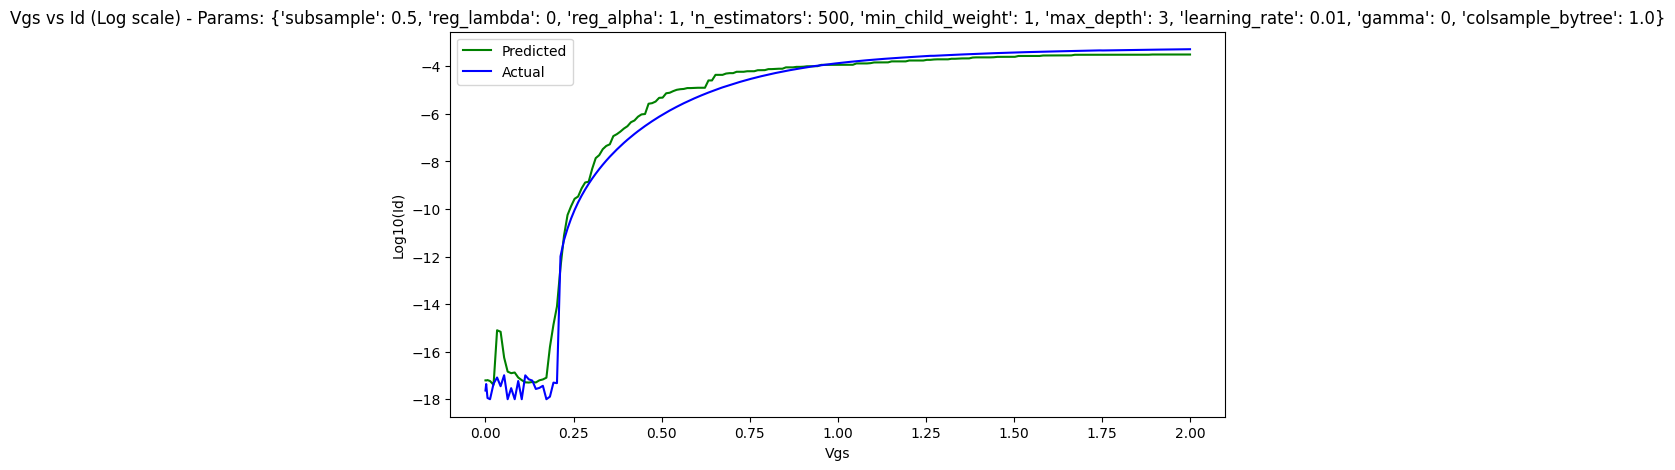

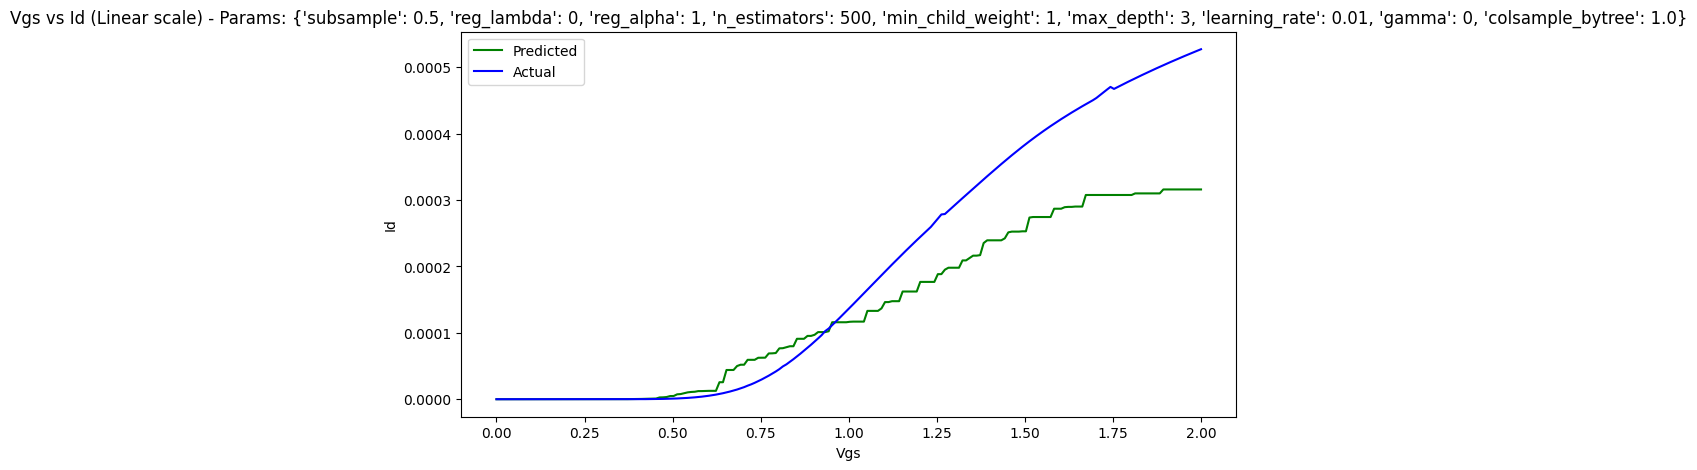

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1.0}


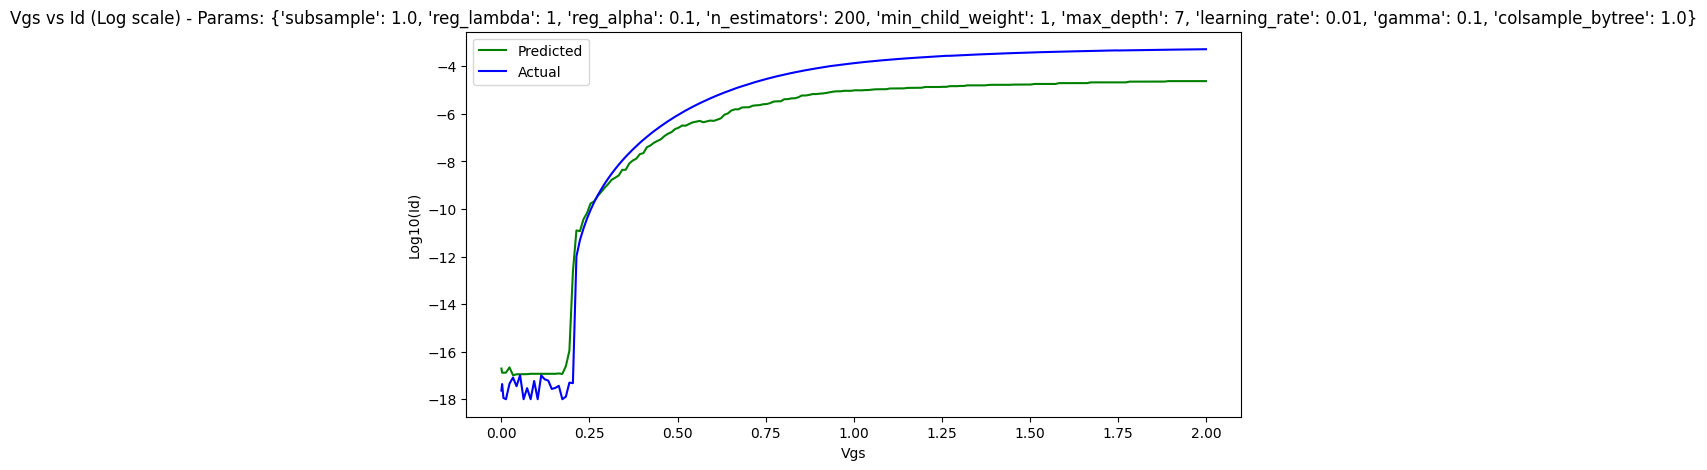

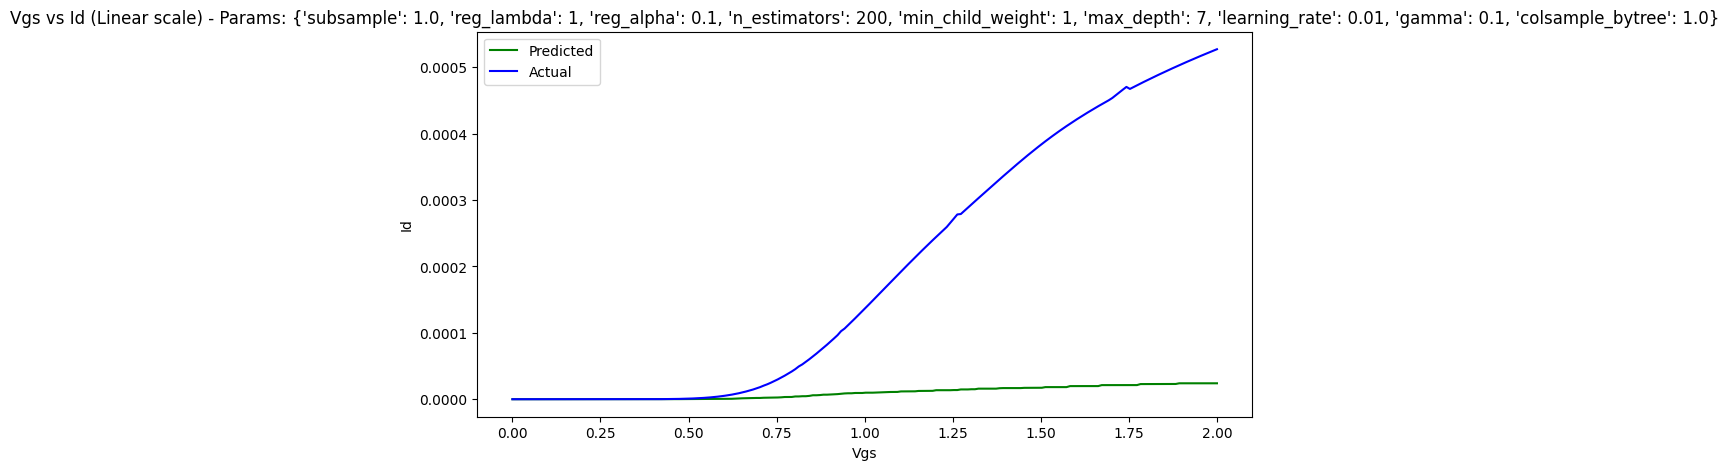

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}


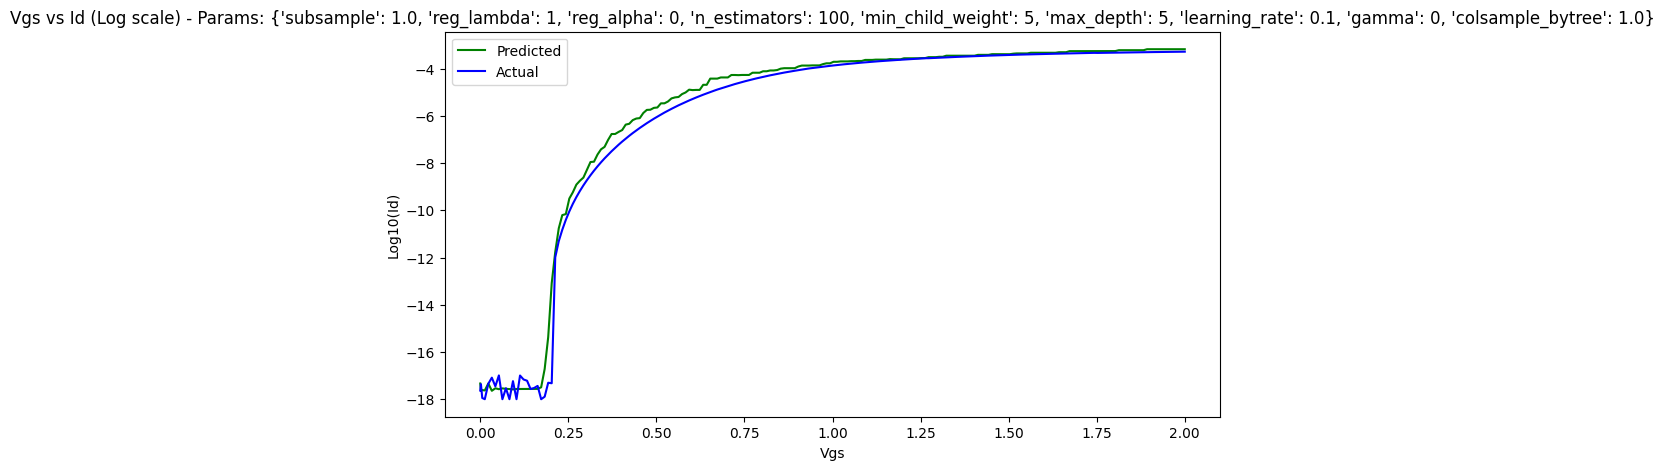

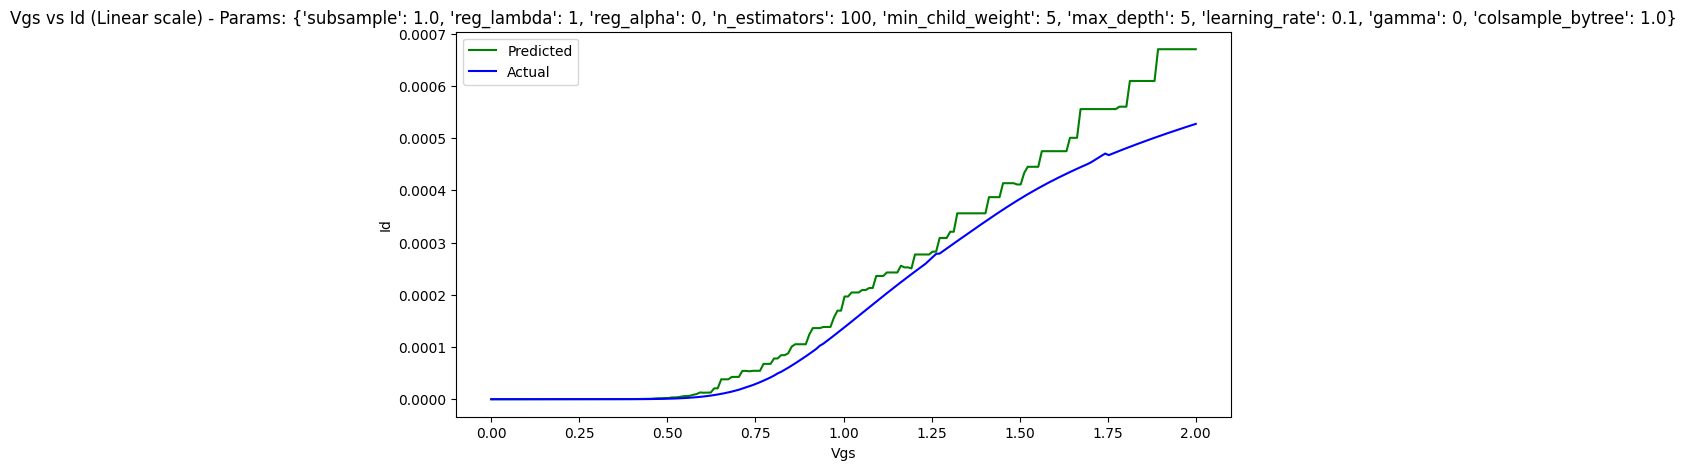

-------------
-------------------
---------------

{'subsample': 0.5, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.5}


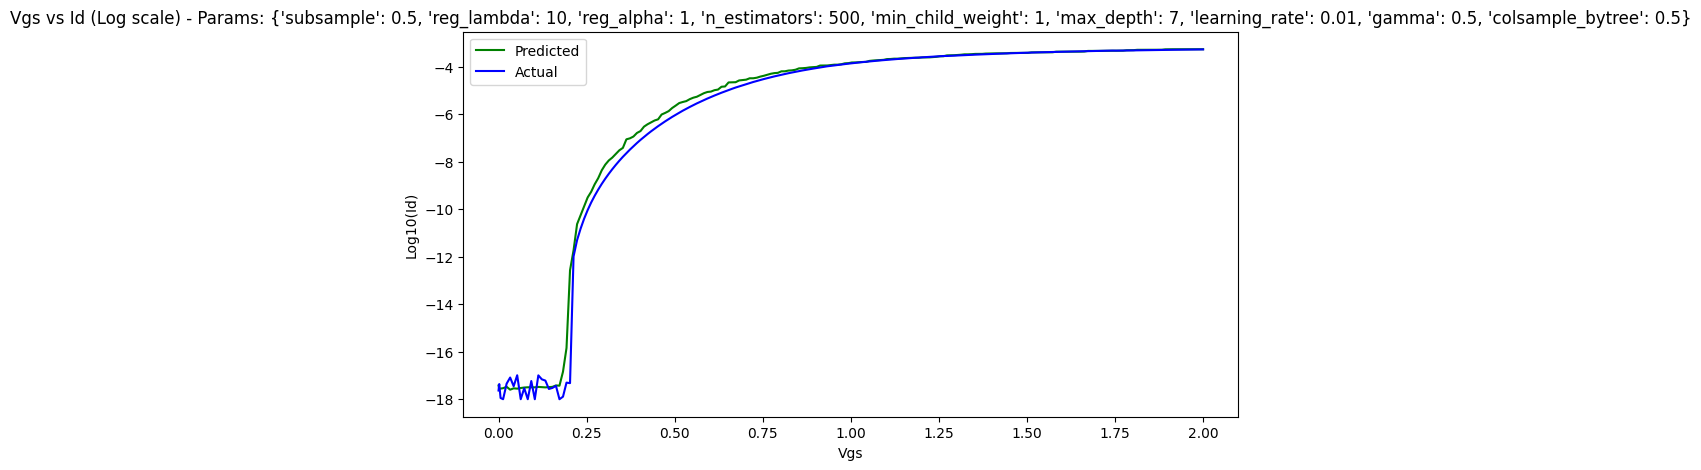

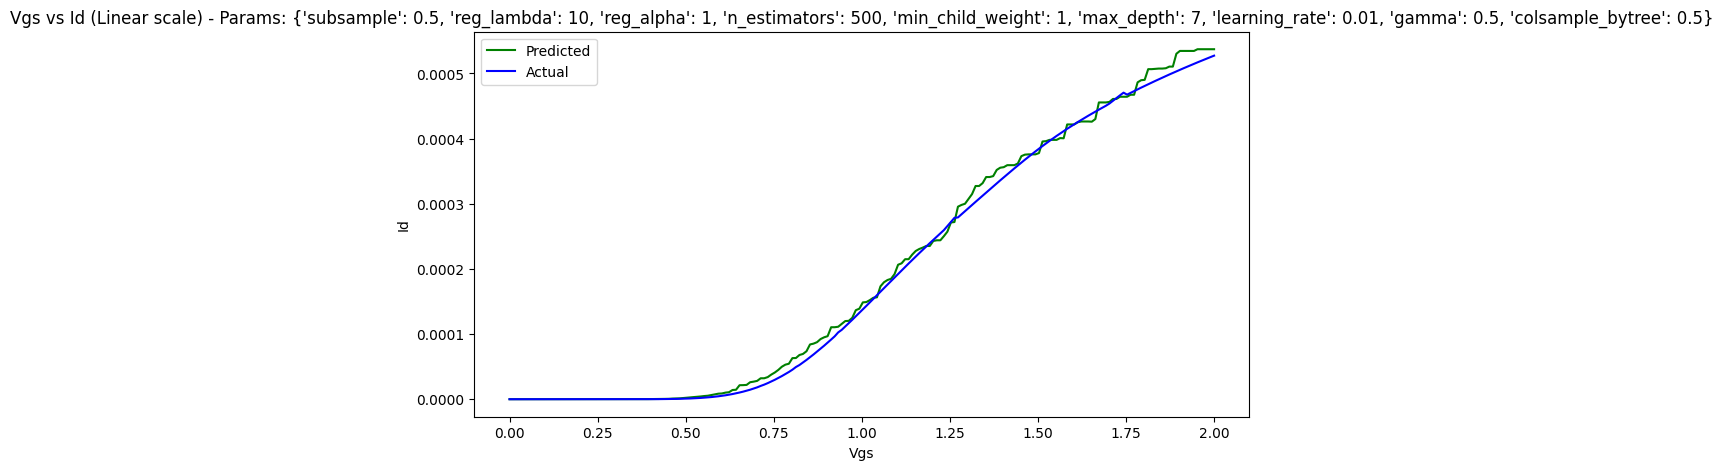

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.5}


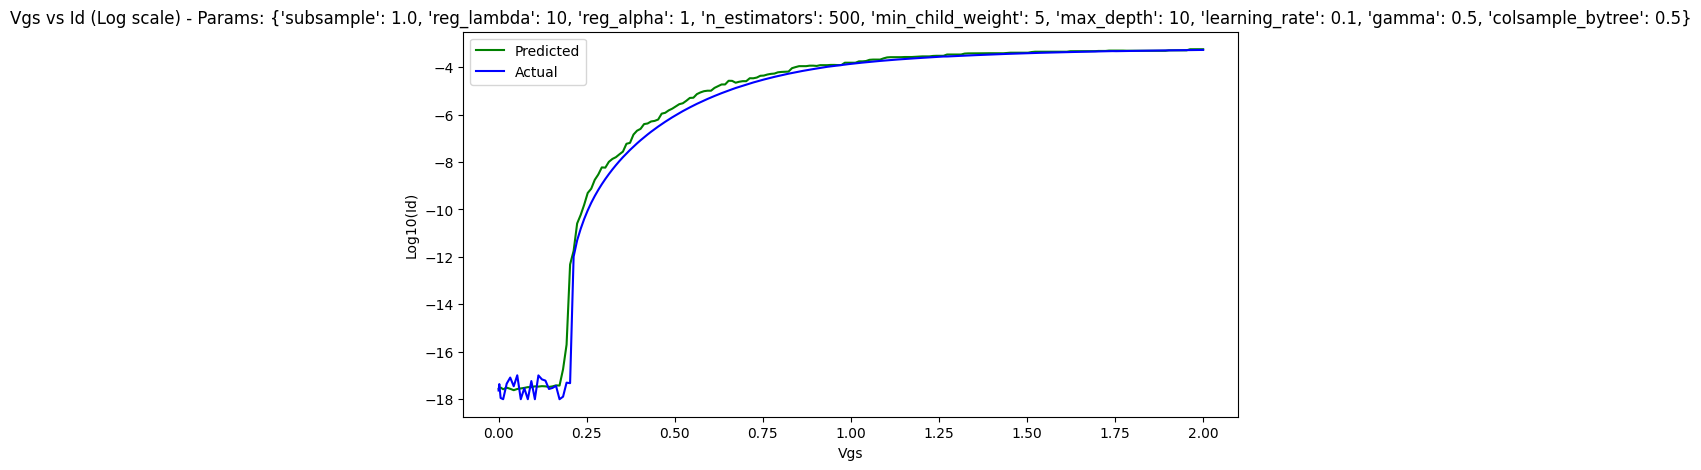

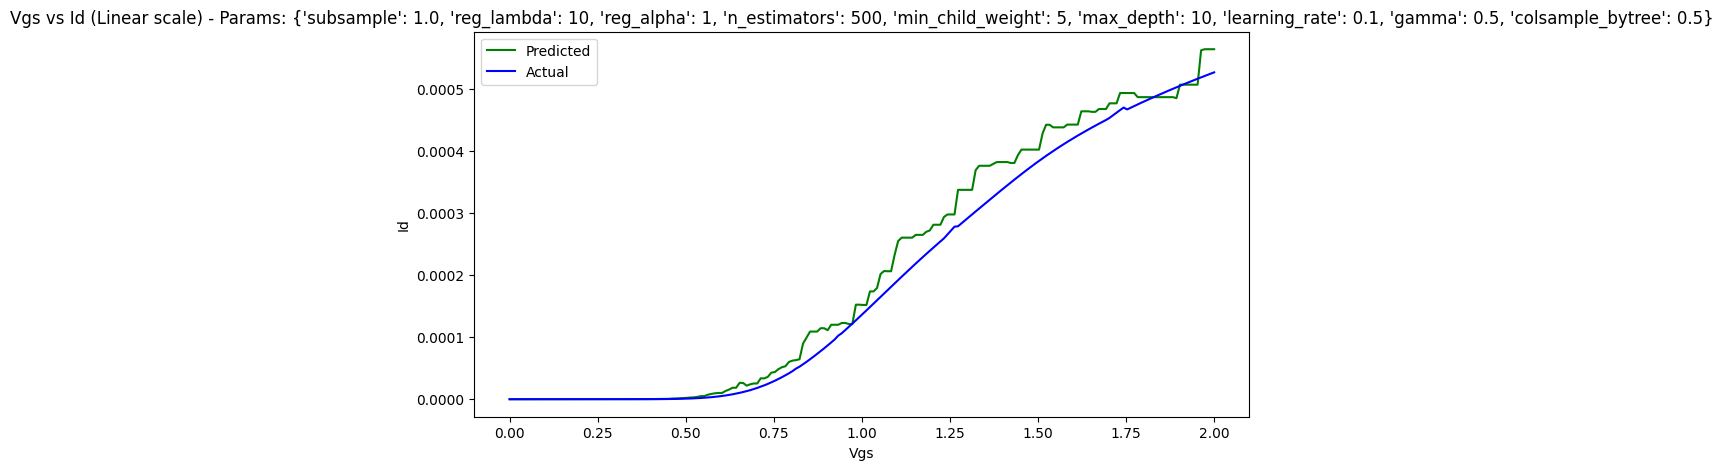

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 0, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 1.0}


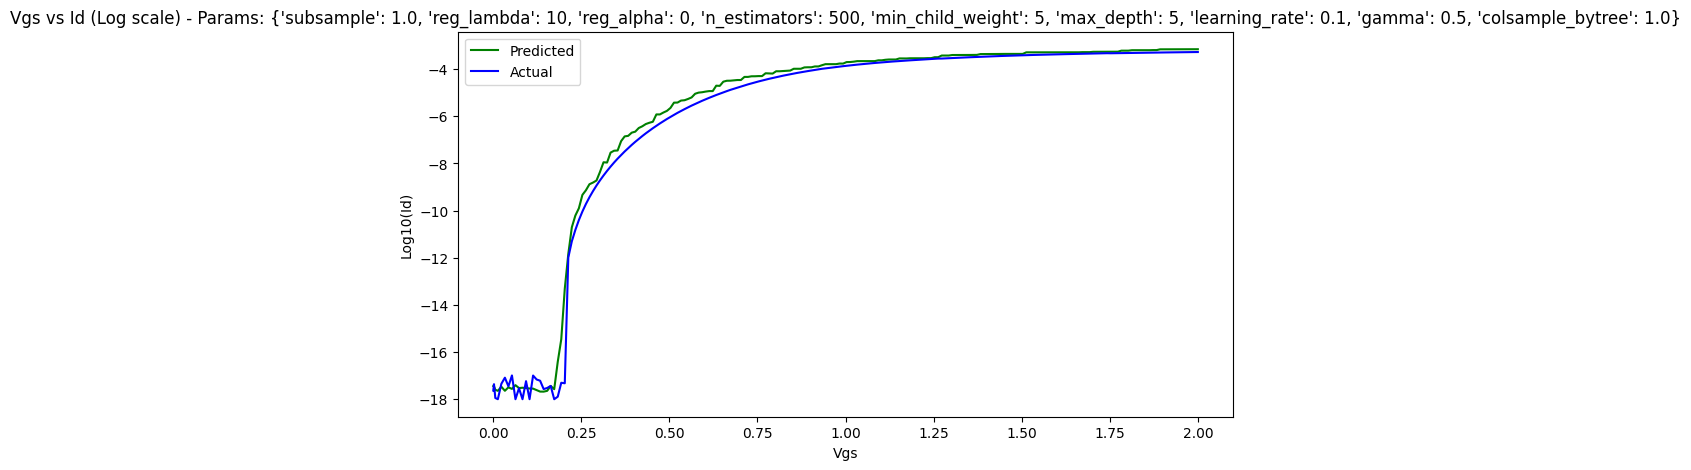

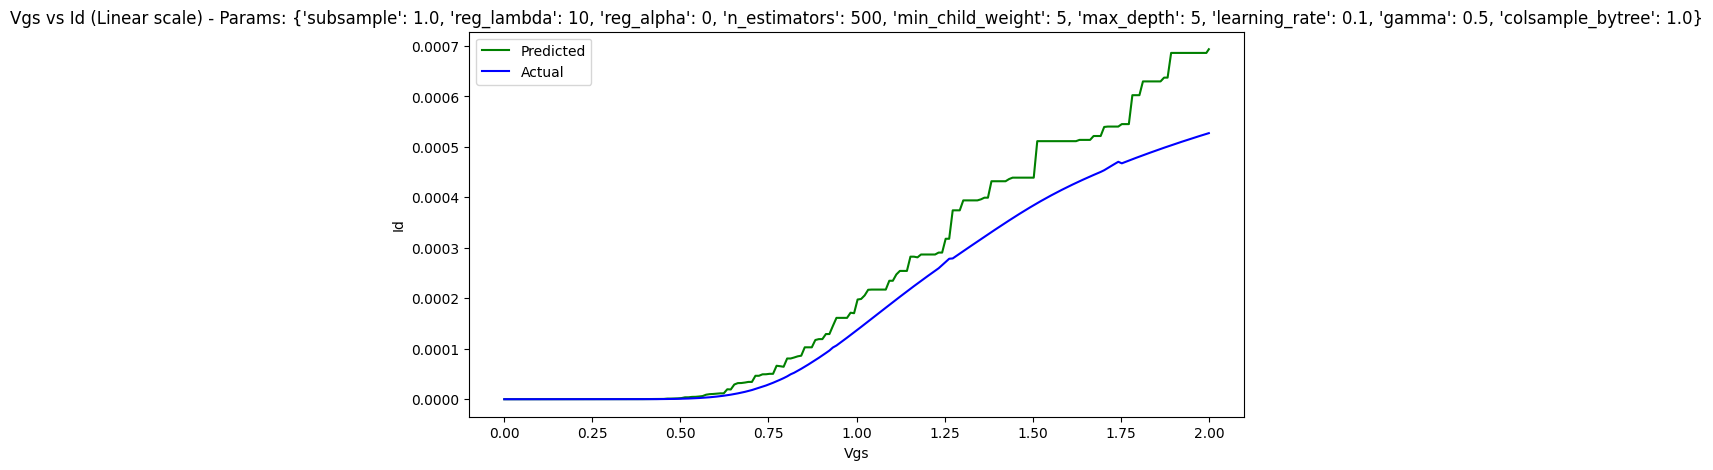

-------------
-------------------
---------------

{'subsample': 0.5, 'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}


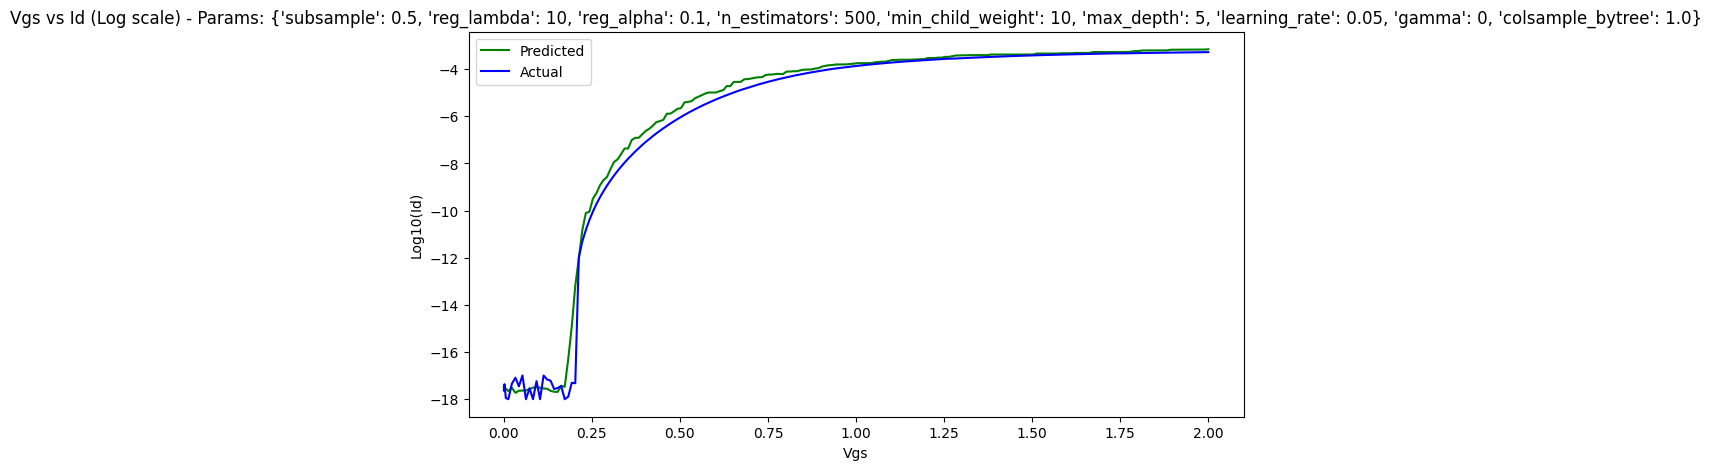

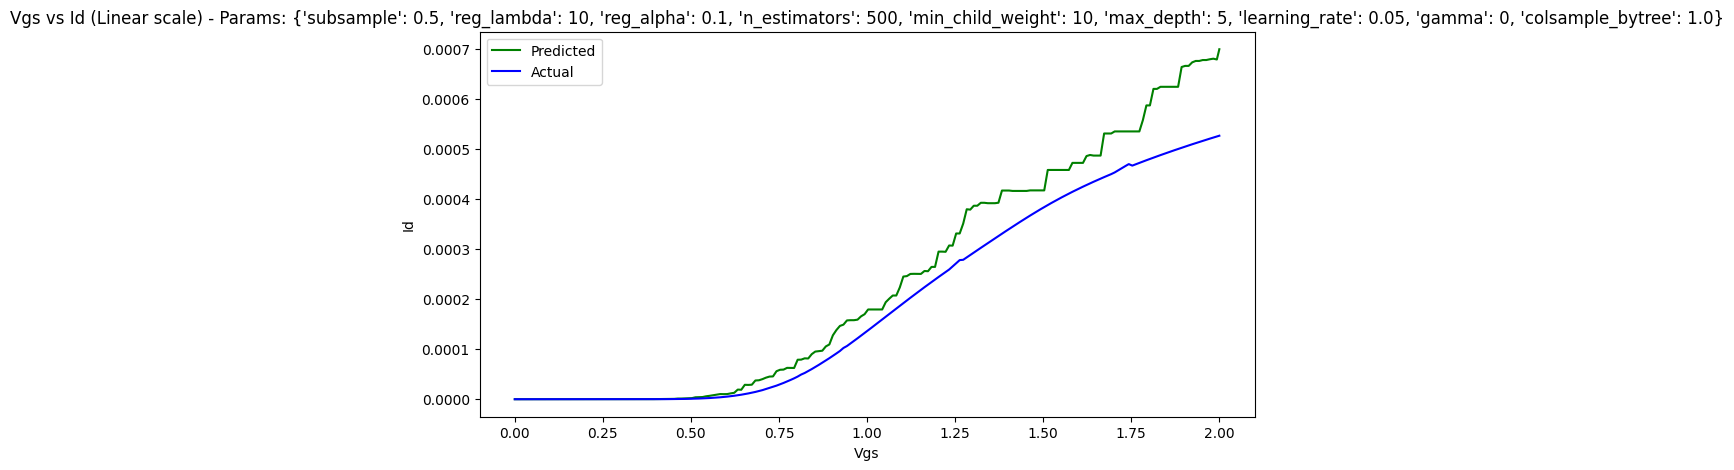

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 1.0}


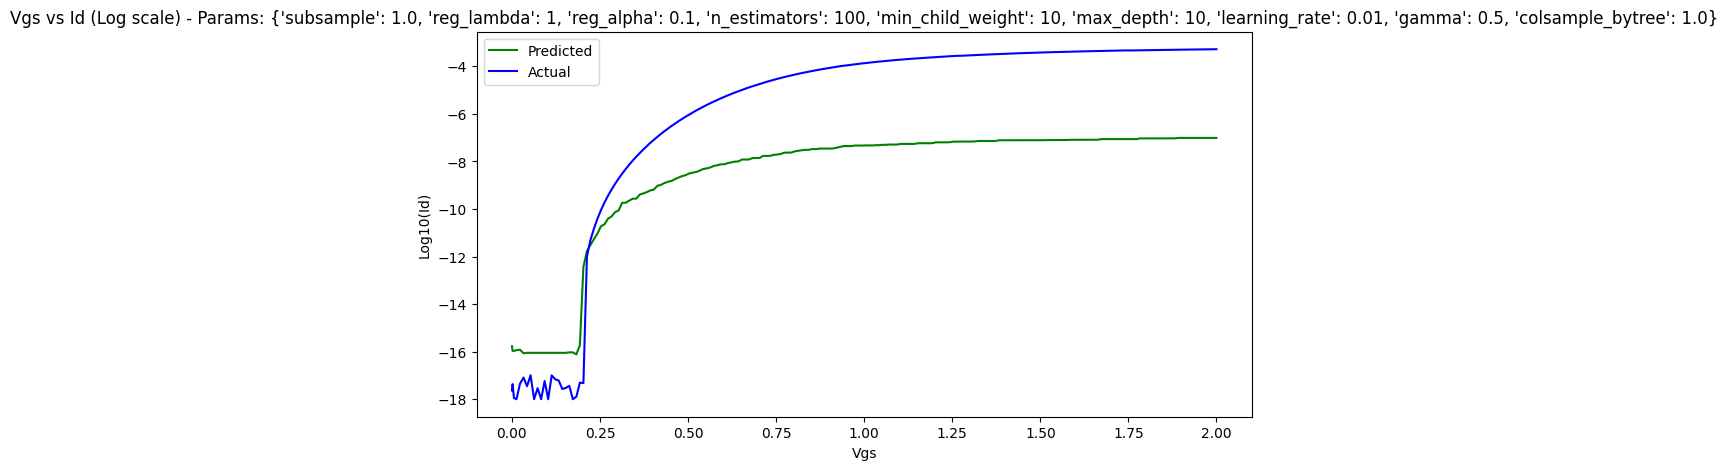

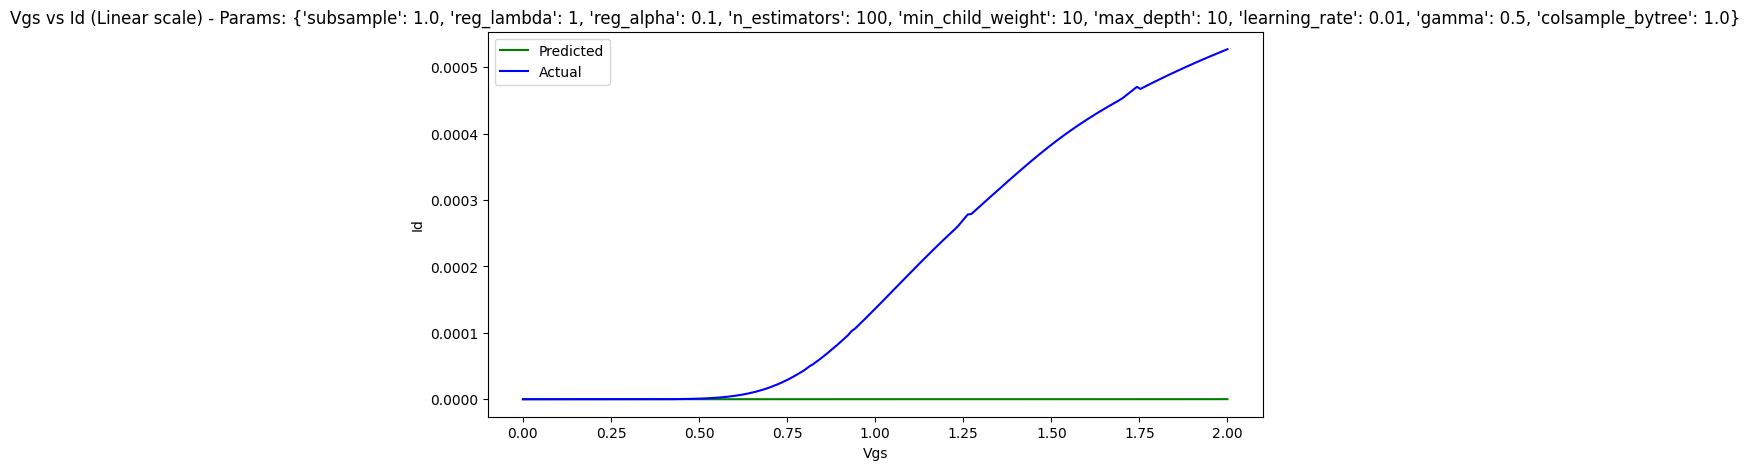

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 1.0}


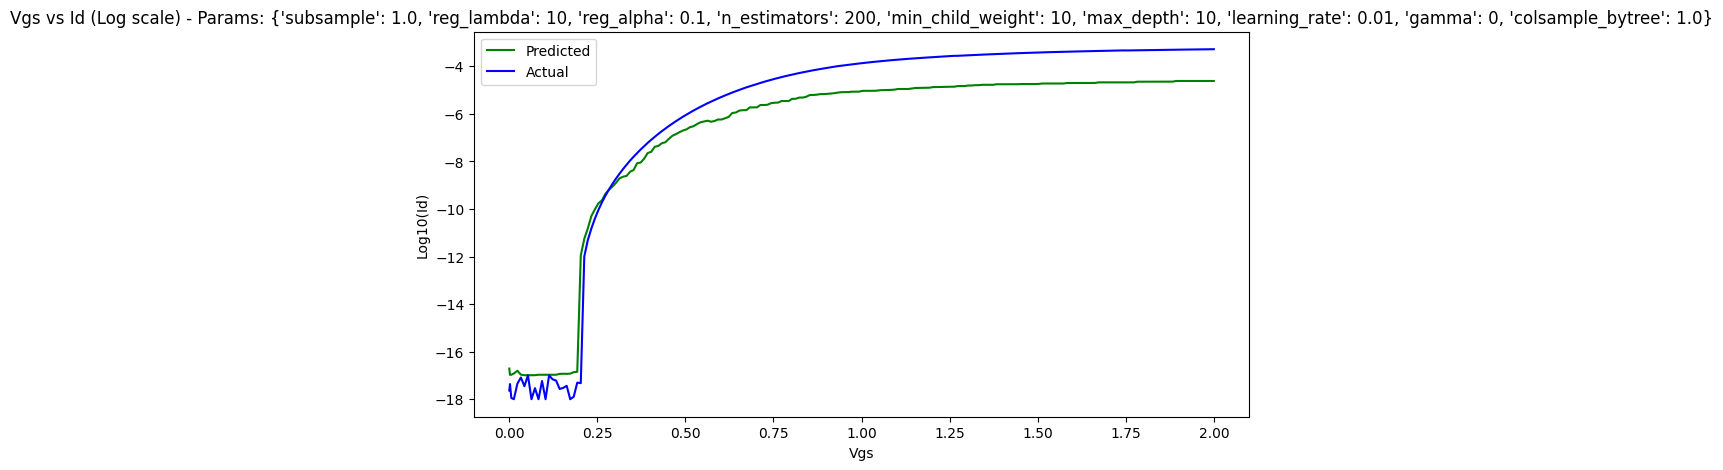

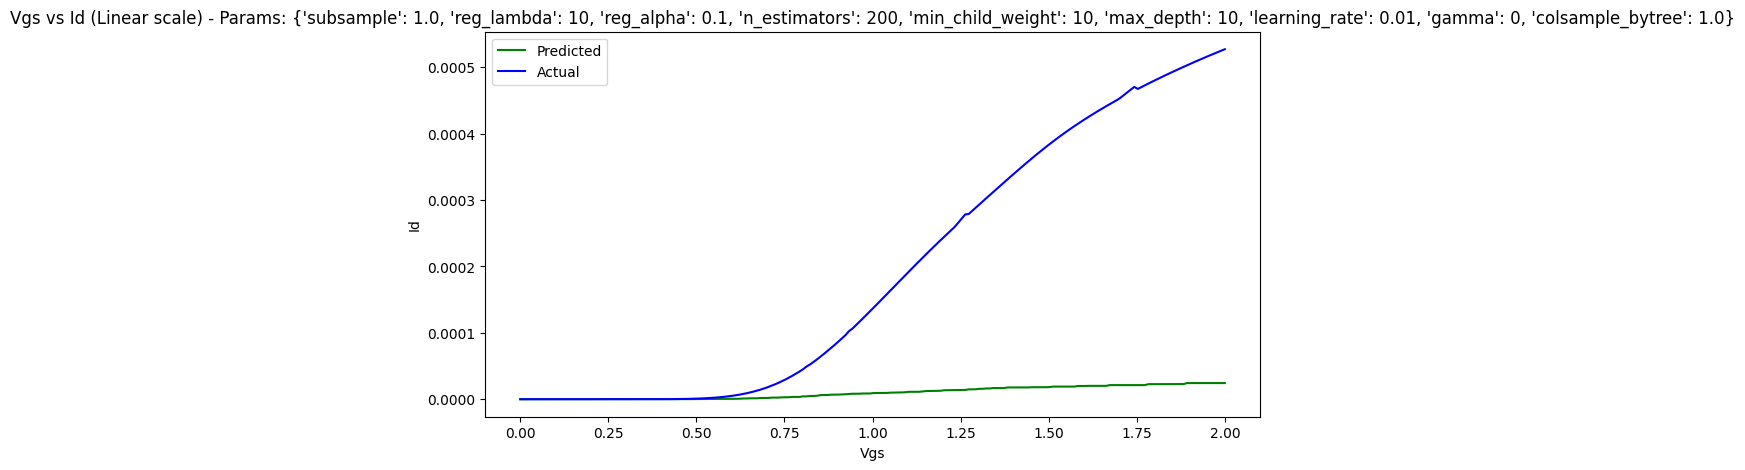

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 1, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.5}


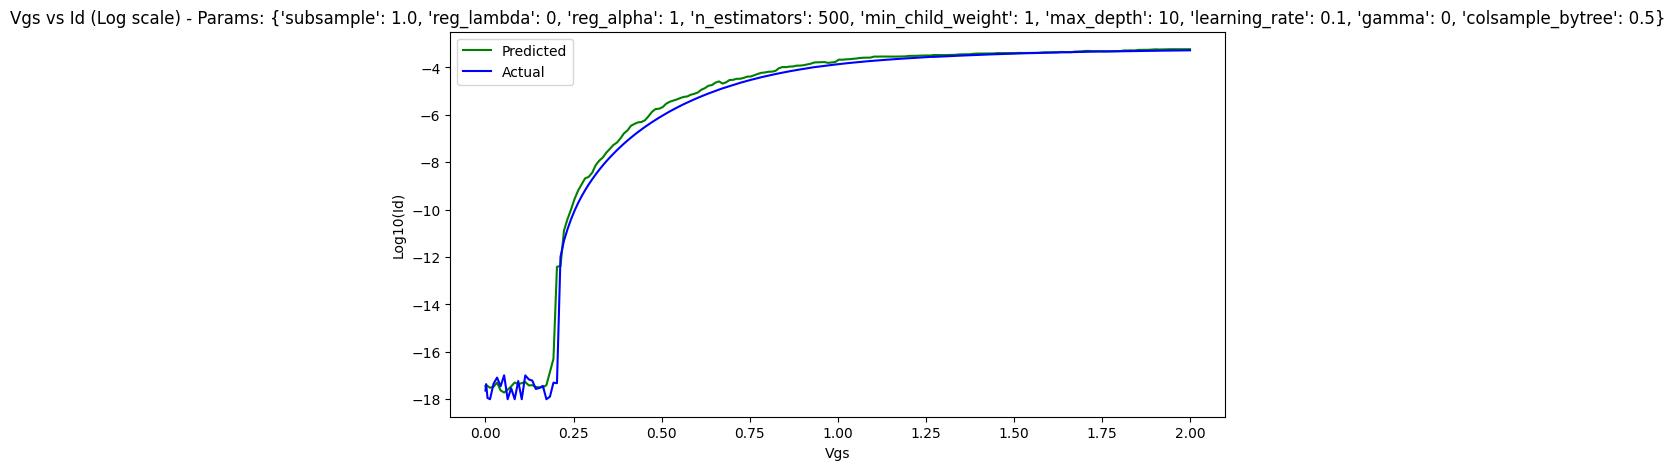

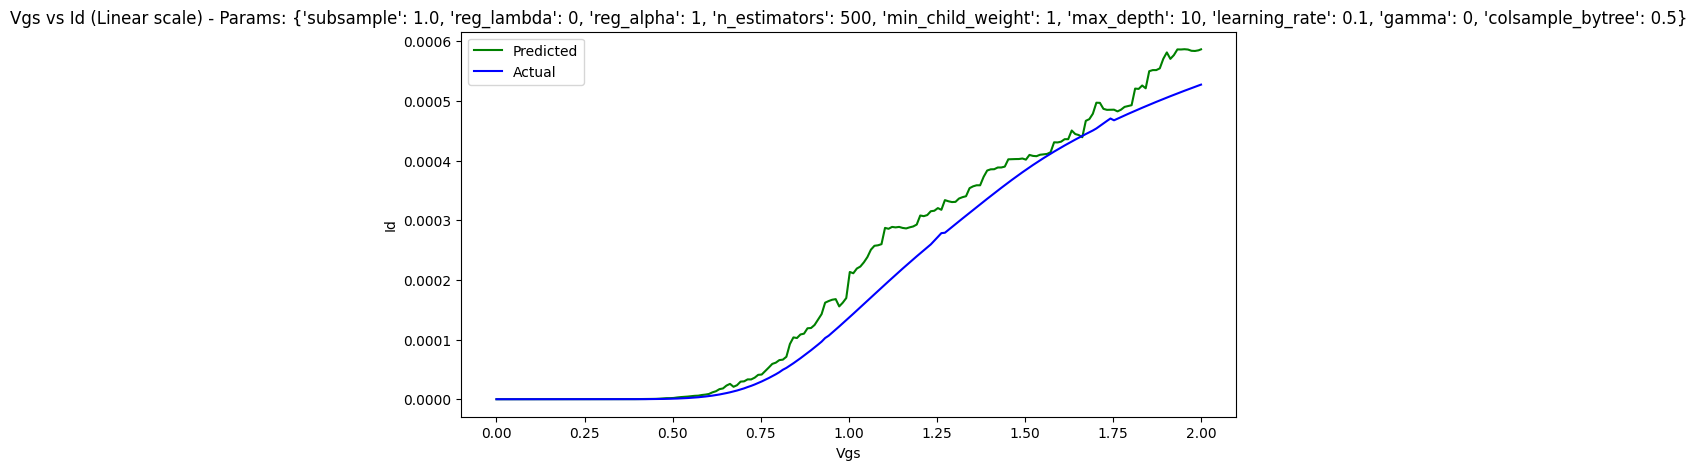

-------------
-------------------
---------------

{'subsample': 0.5, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 1.0}


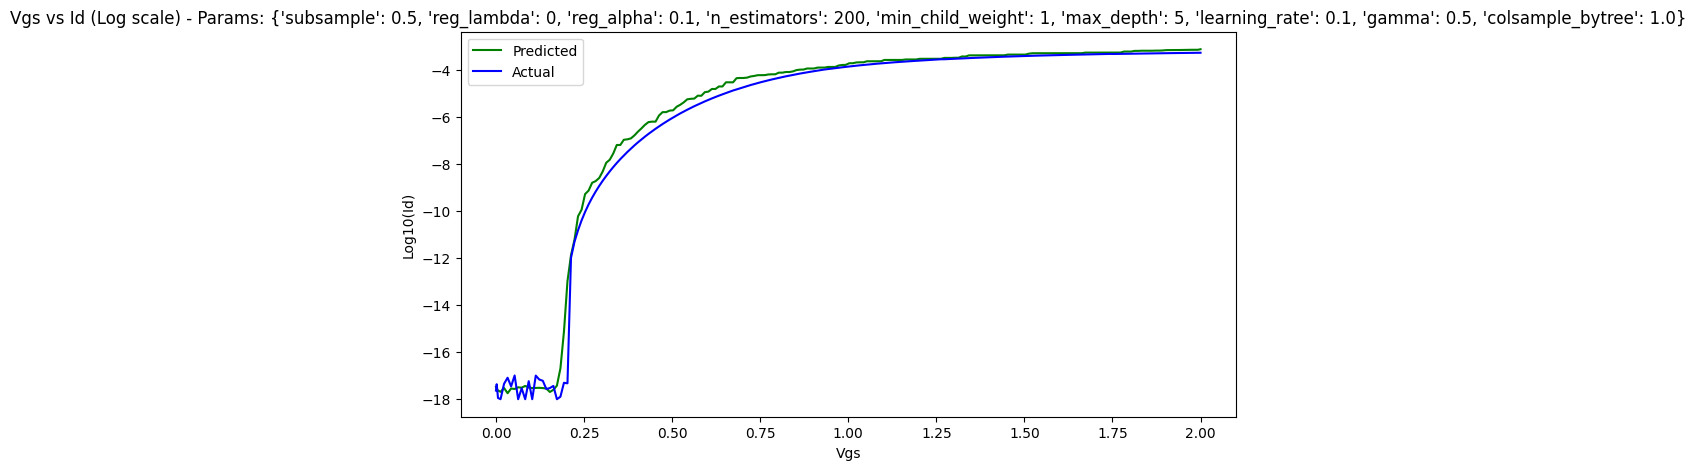

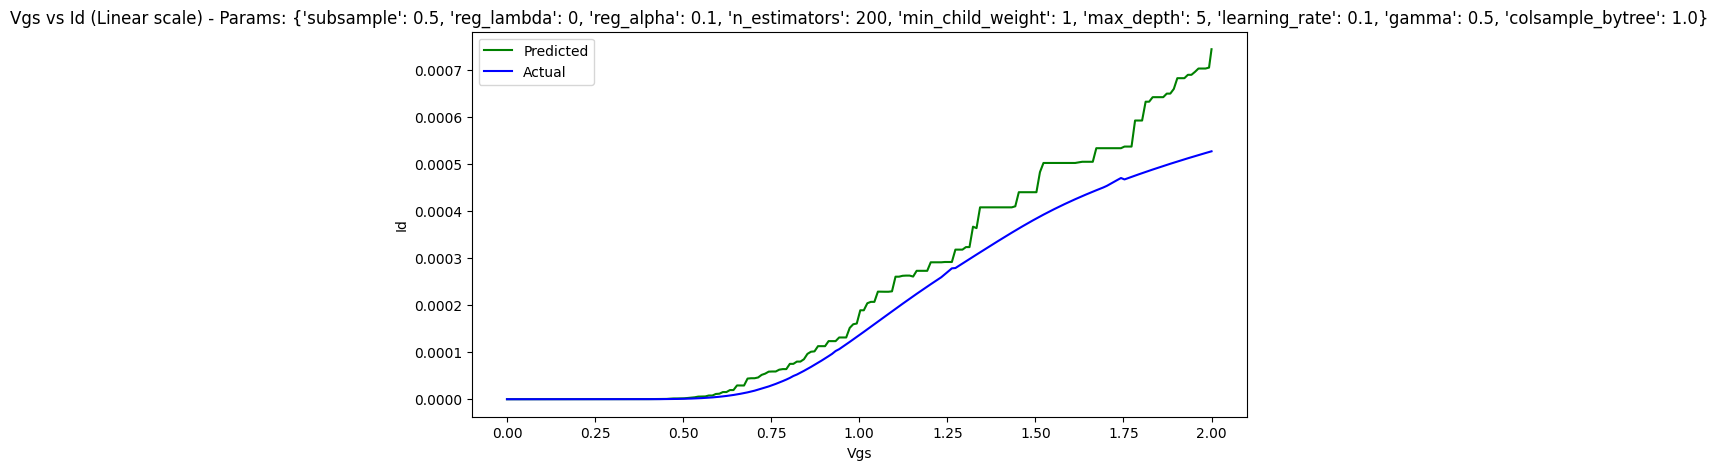

-------------
-------------------
---------------

{'subsample': 0.5, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.5}


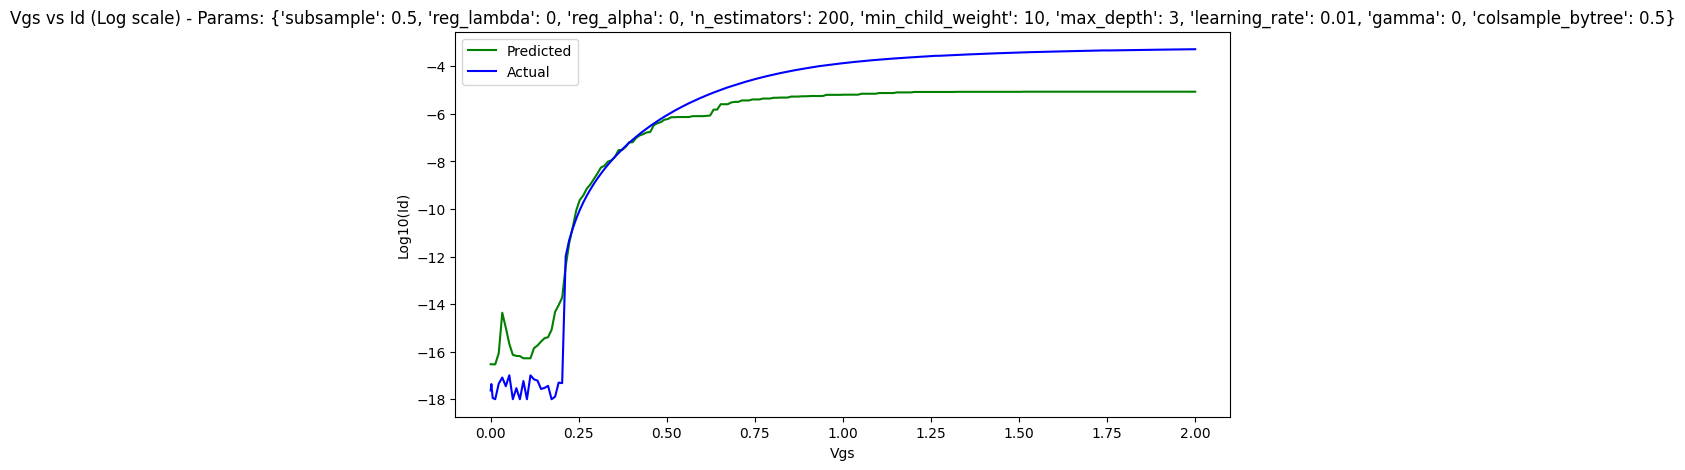

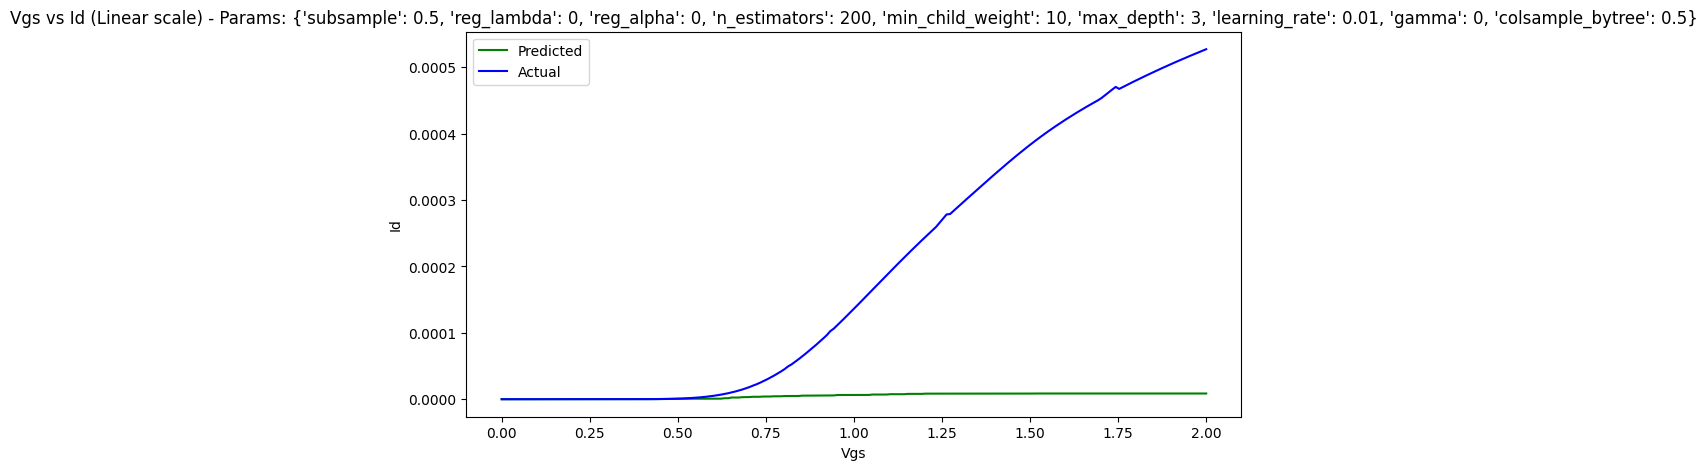

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}


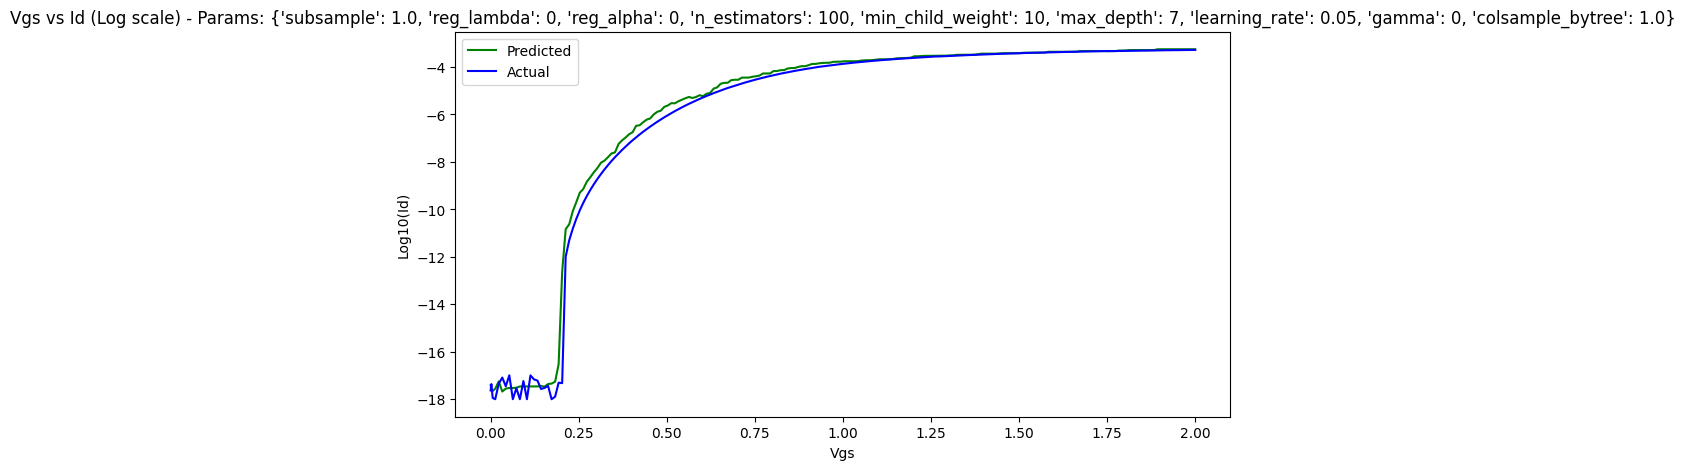

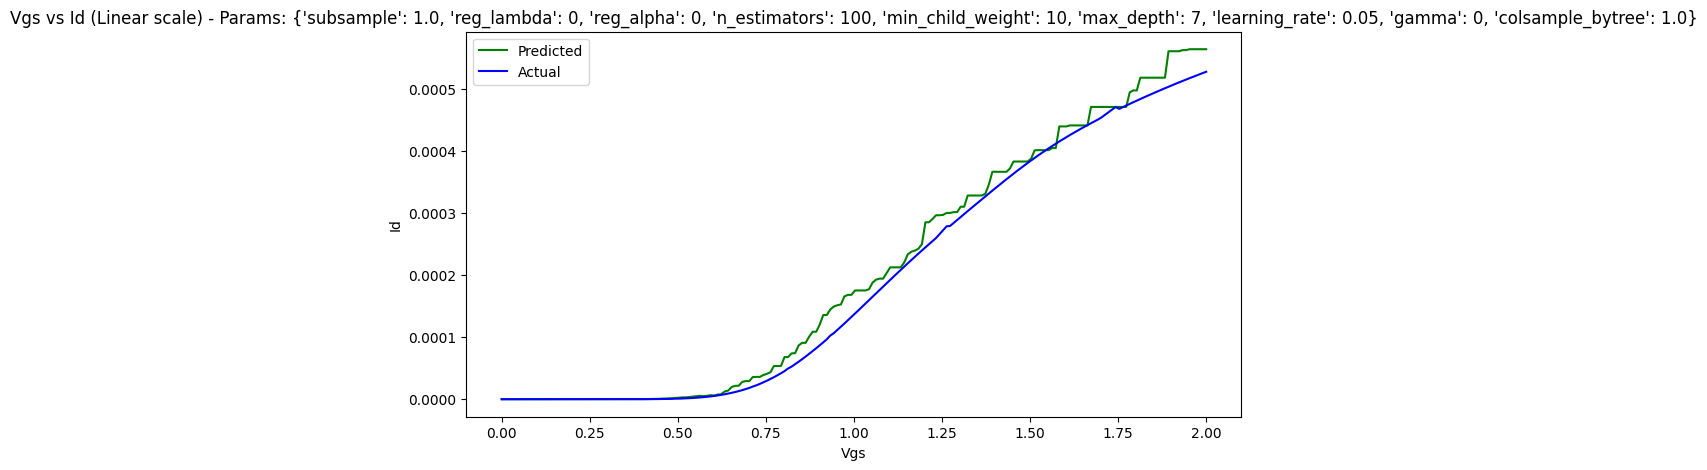

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.5}


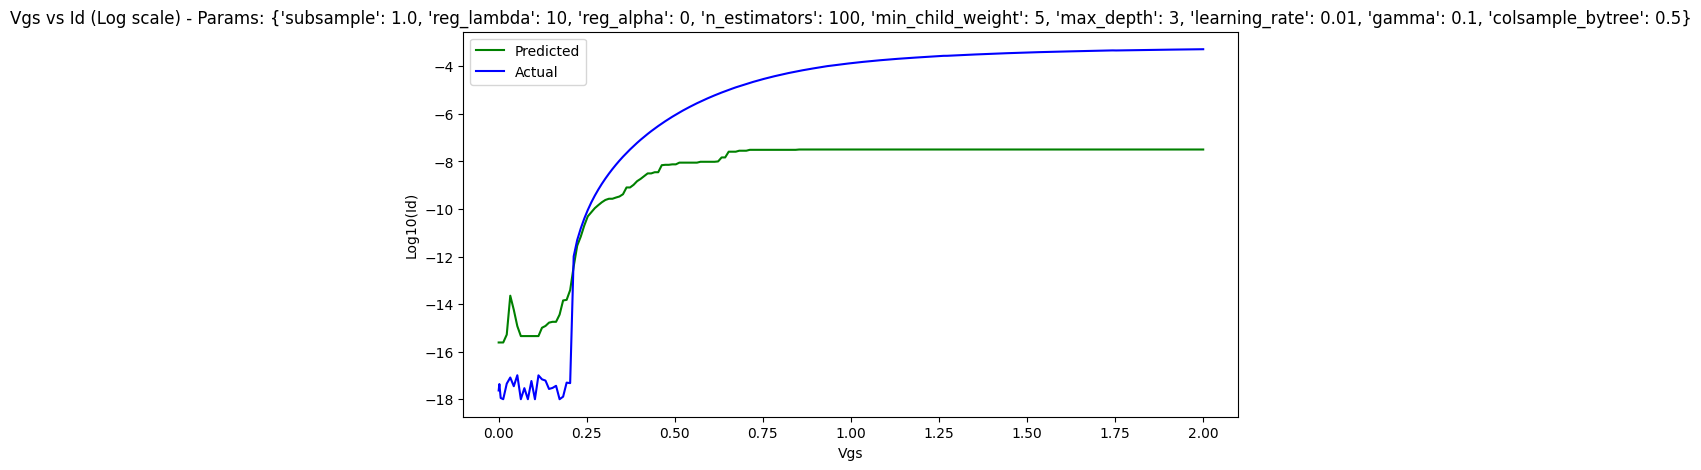

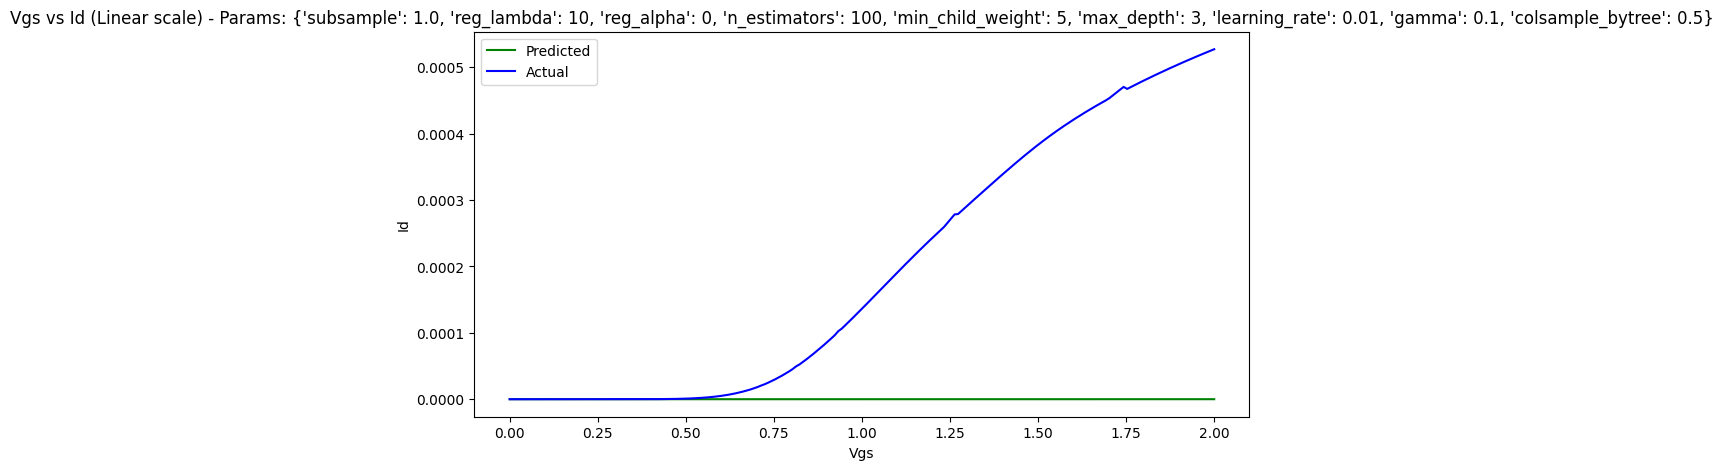

-------------
-------------------
---------------

{'subsample': 0.5, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1.0}


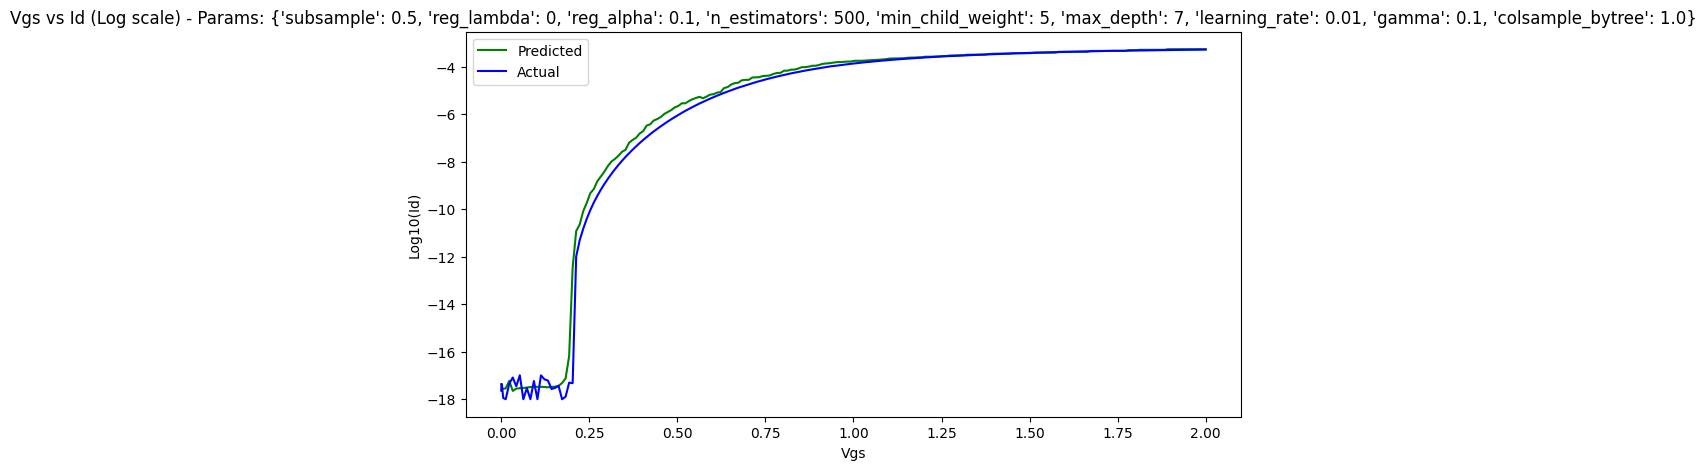

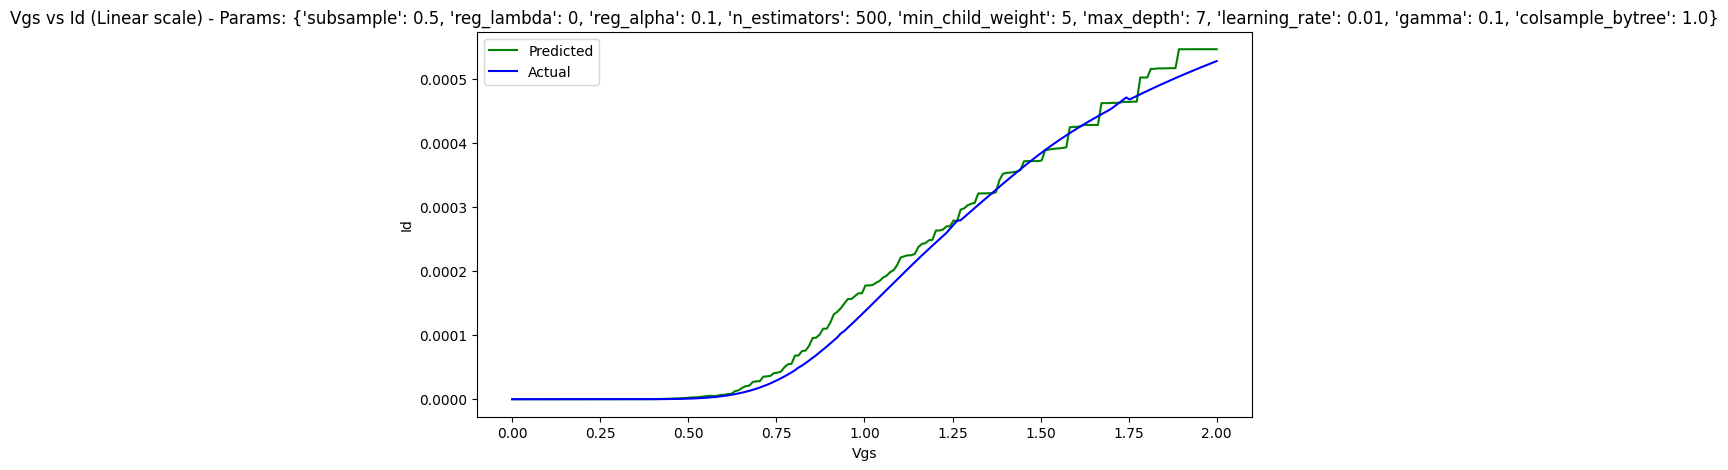

-------------
-------------------
---------------

{'subsample': 0.5, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.5}


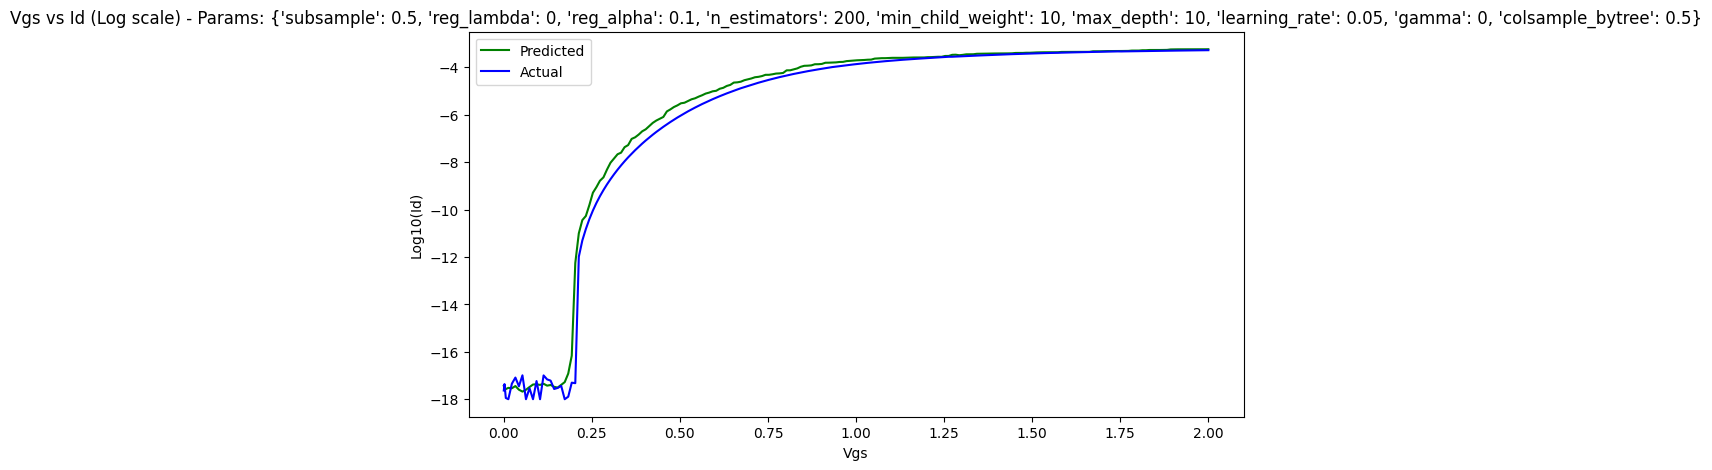

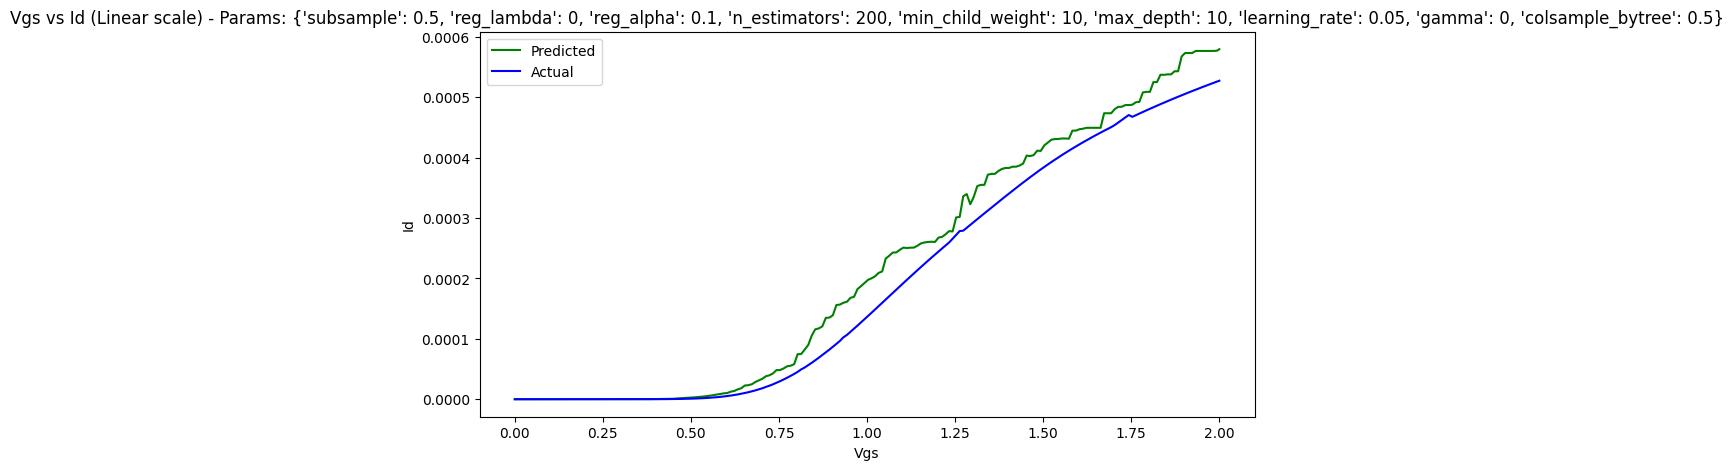

-------------
-------------------
---------------

{'subsample': 0.7, 'reg_lambda': 10, 'reg_alpha': 0, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 1.0}


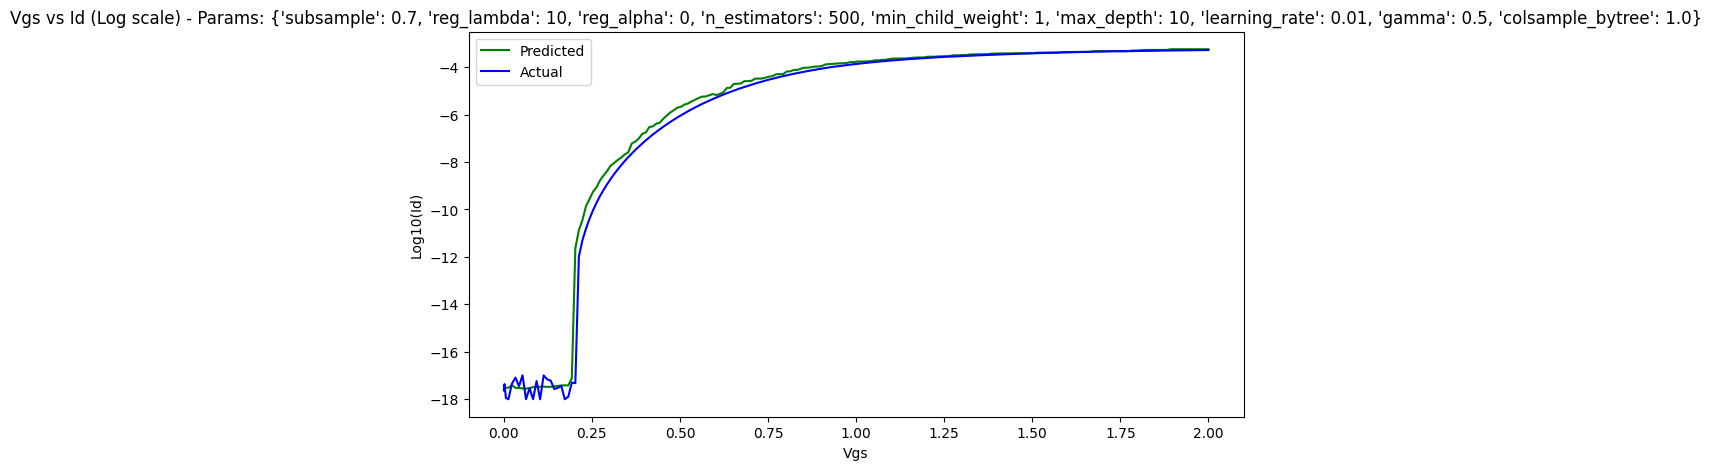

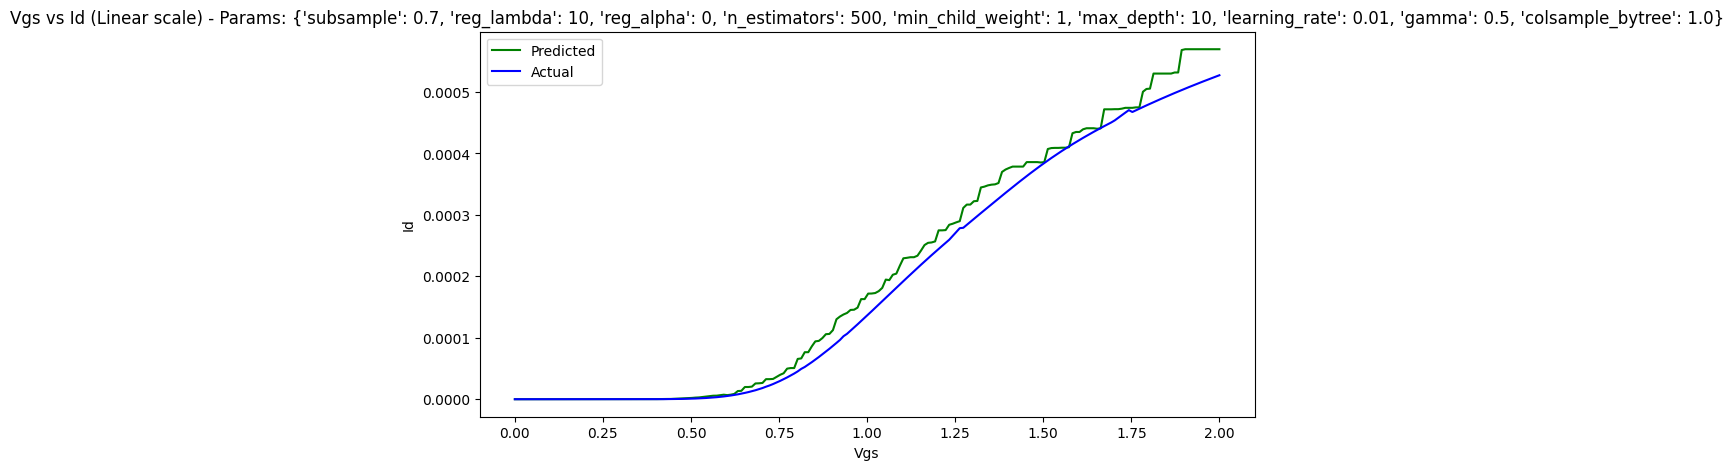

-------------
-------------------
---------------

{'subsample': 0.7, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.5}


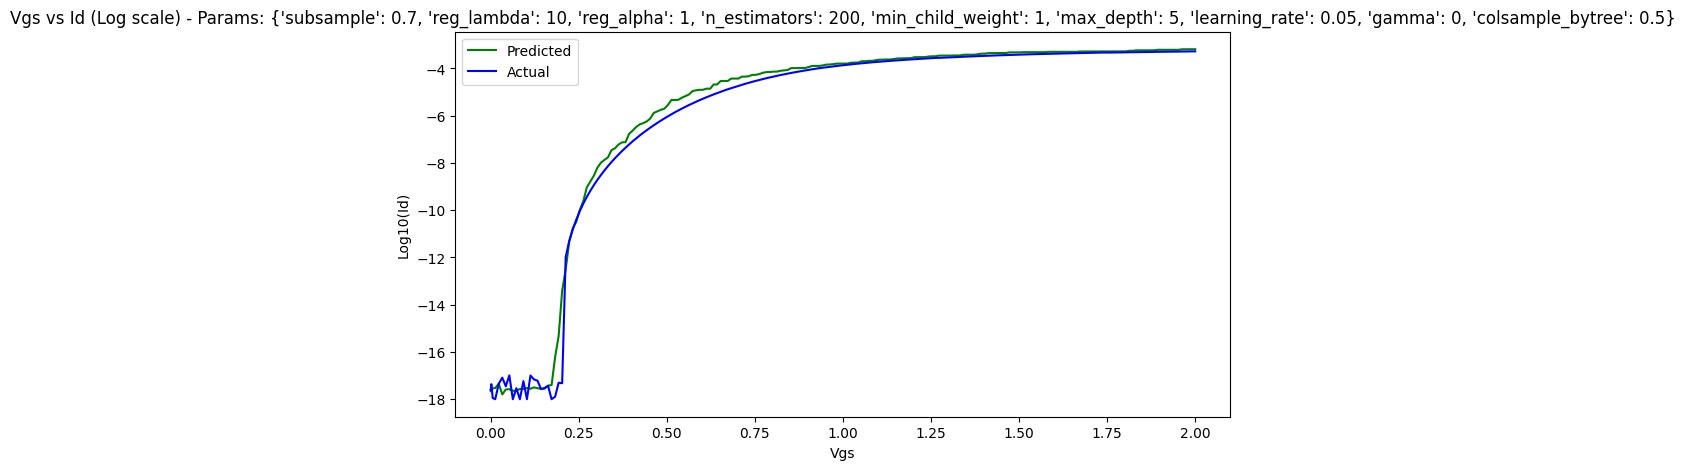

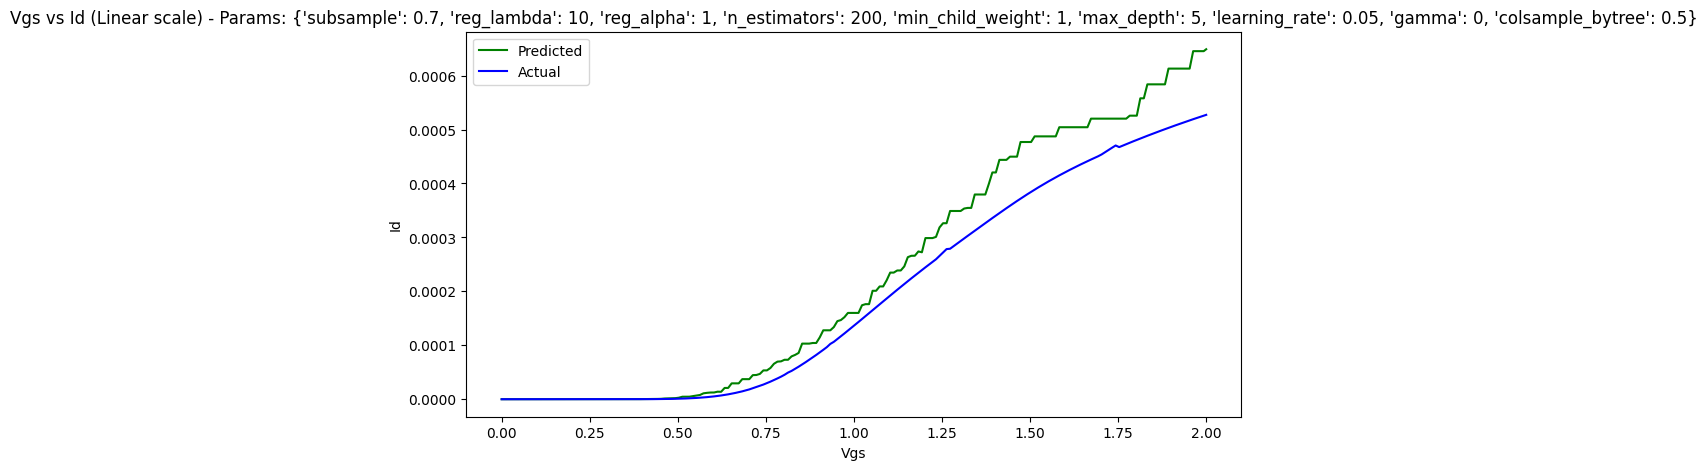

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 1.0}


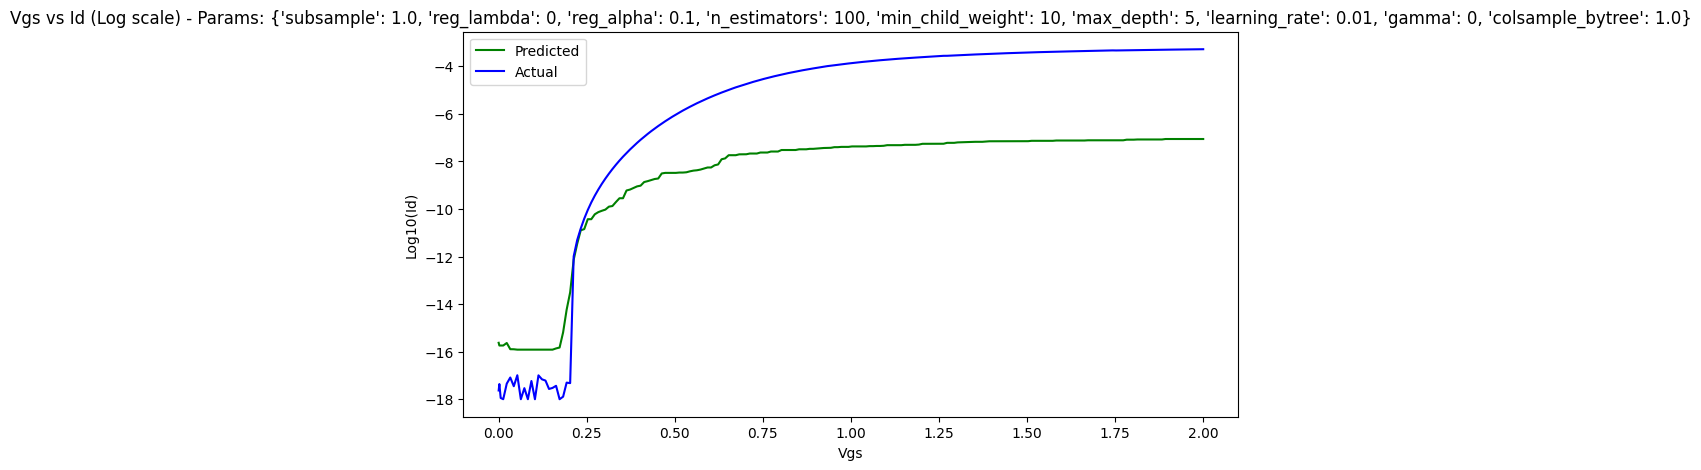

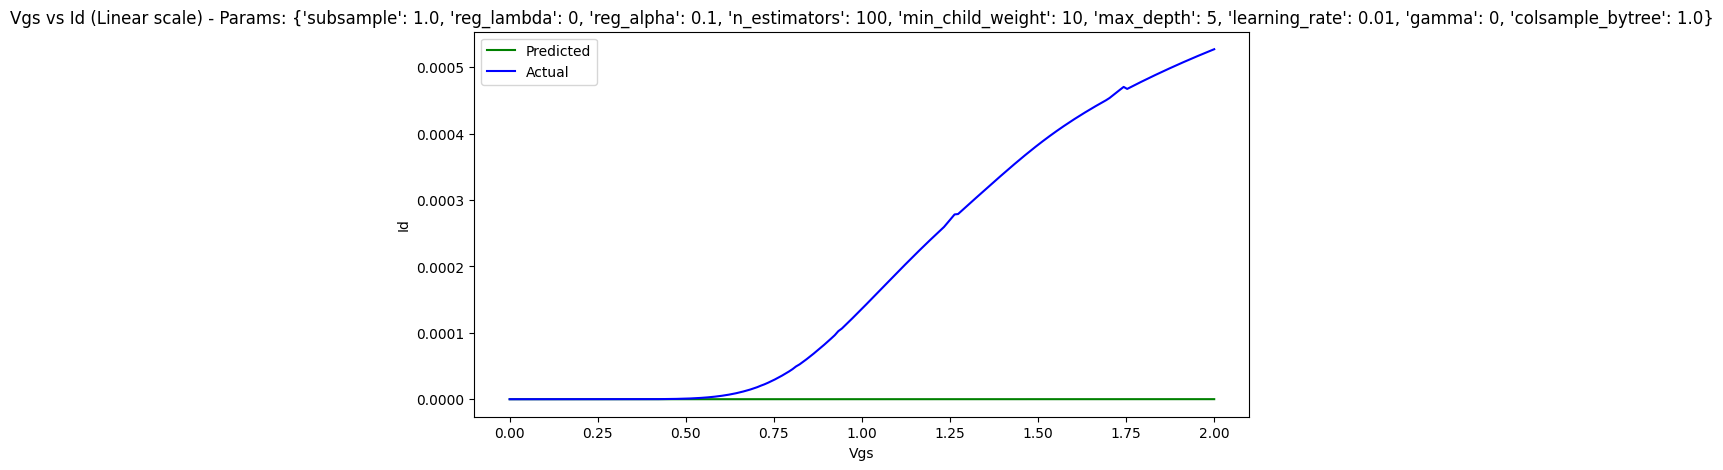

-------------
-------------------
---------------

{'subsample': 0.5, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


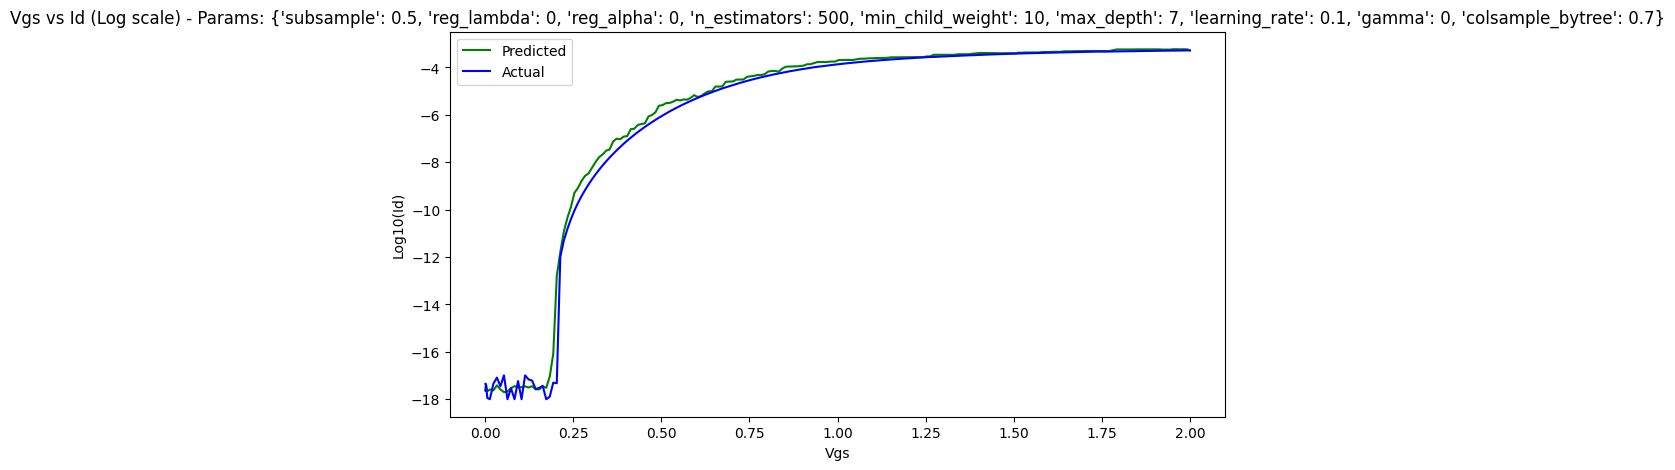

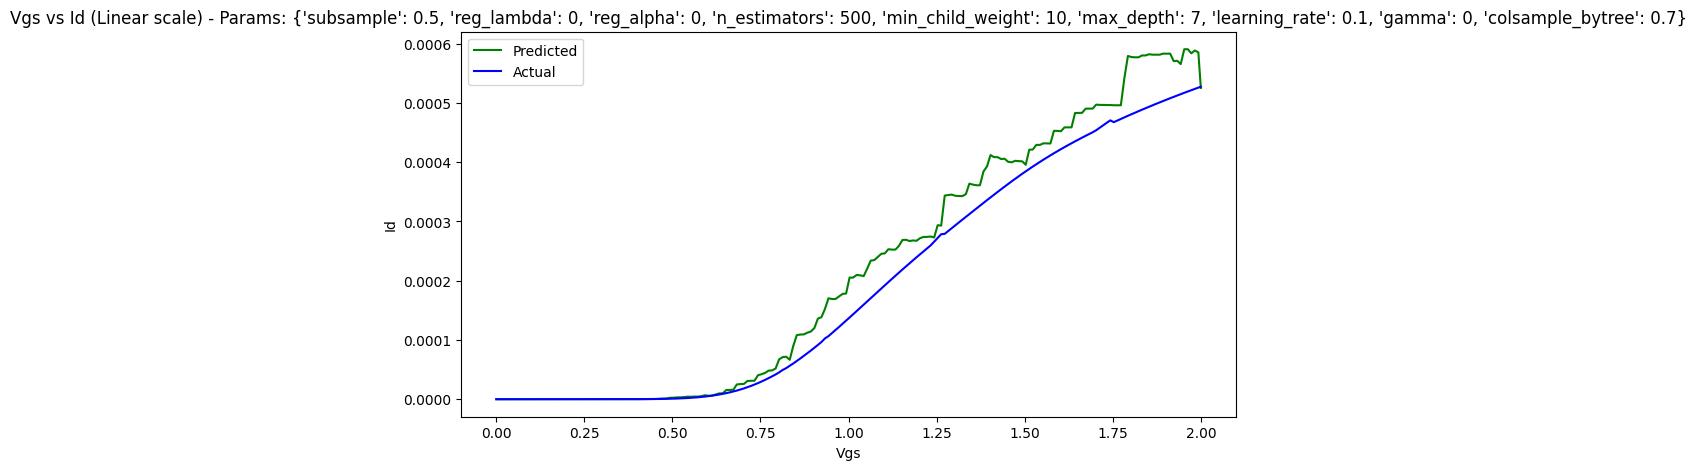

-------------
-------------------
---------------

{'subsample': 0.7, 'reg_lambda': 0, 'reg_alpha': 1, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.5}


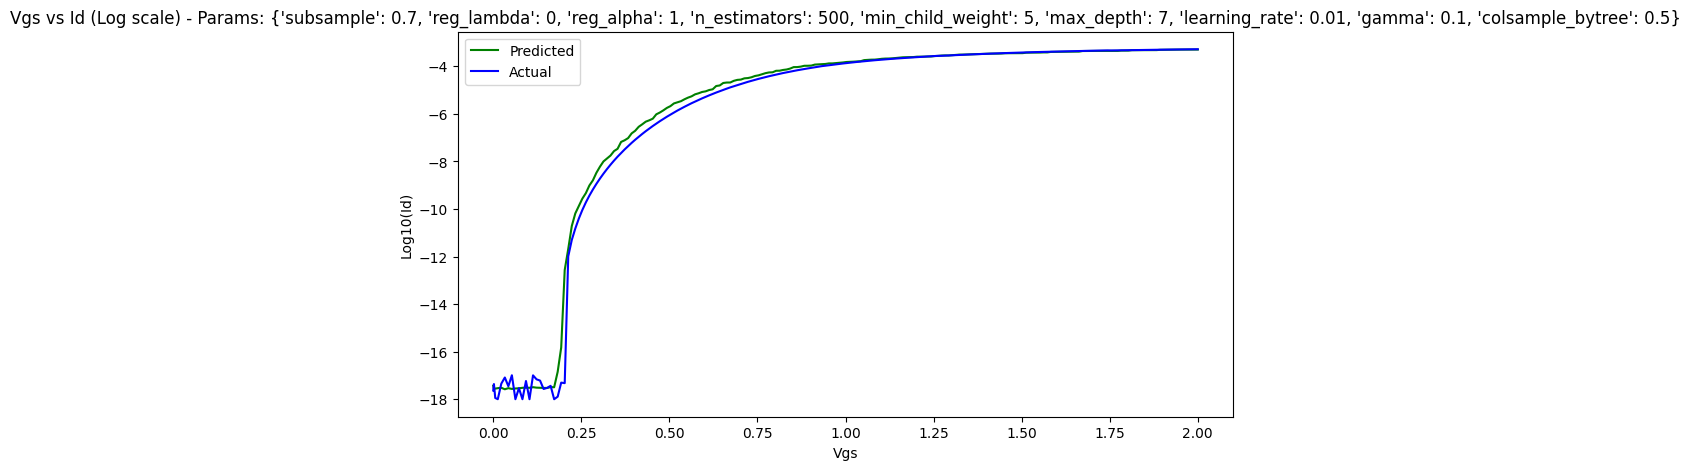

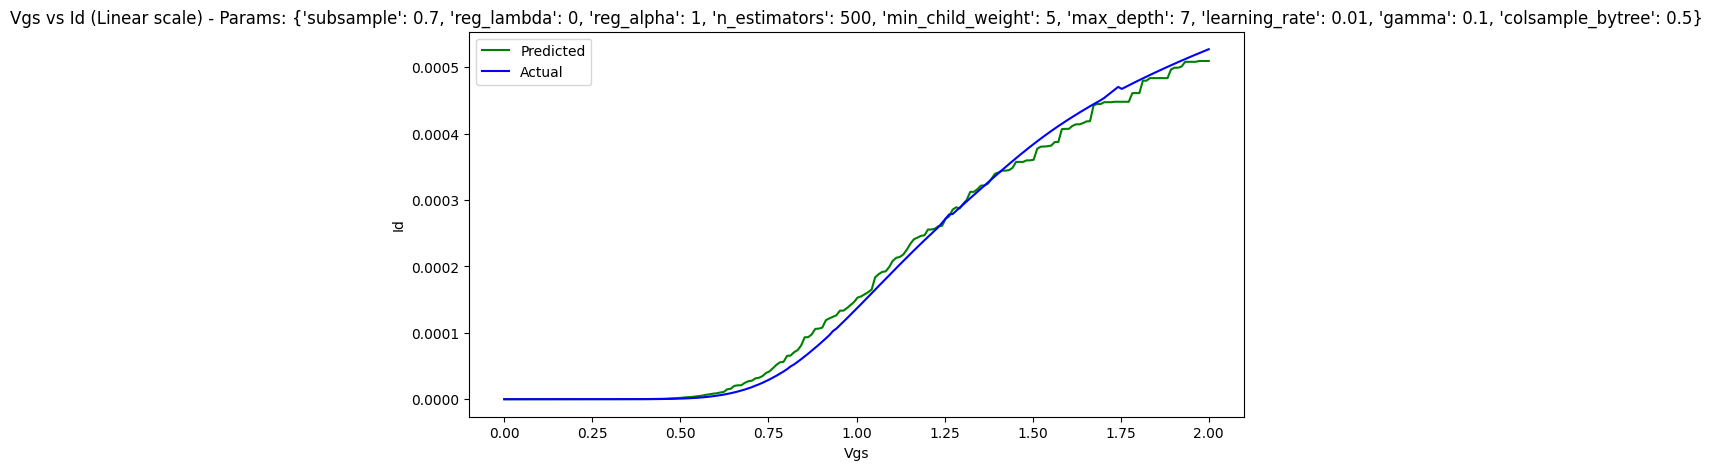

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.5}


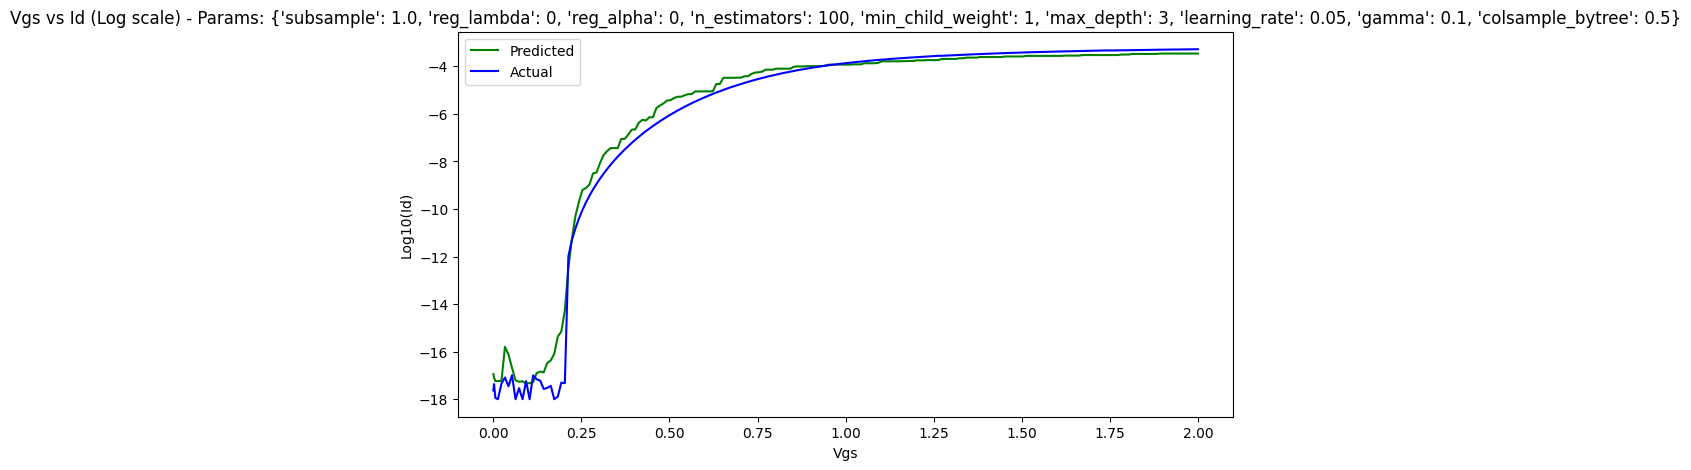

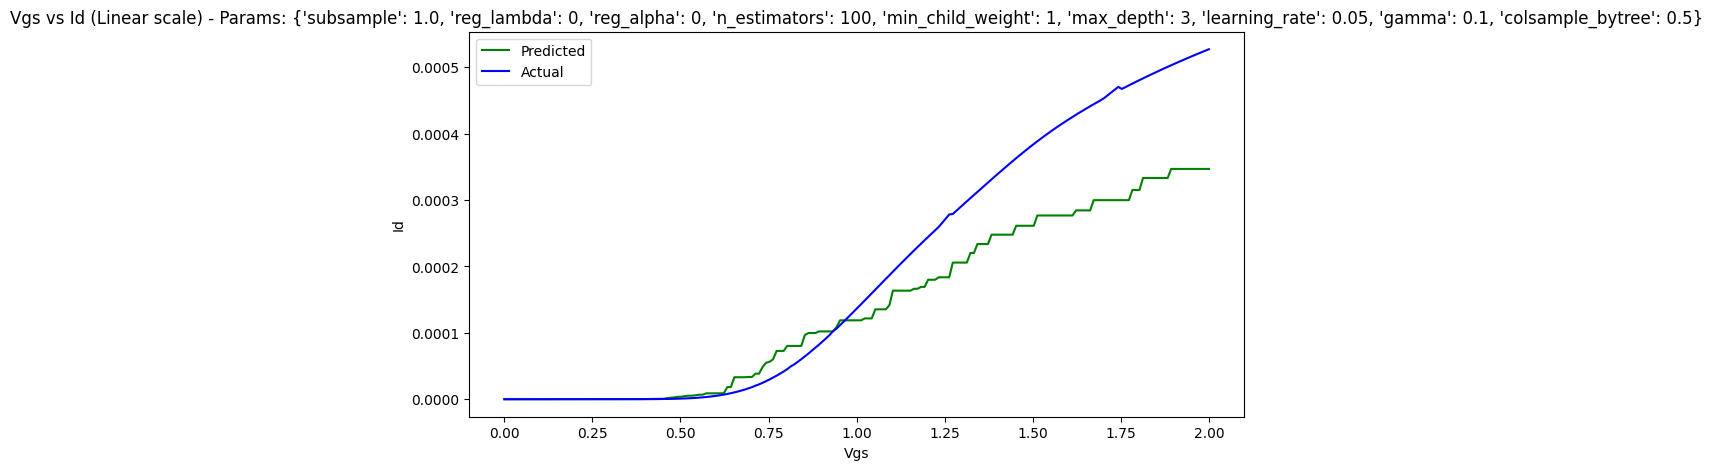

-------------
-------------------
---------------

{'subsample': 0.5, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.7}


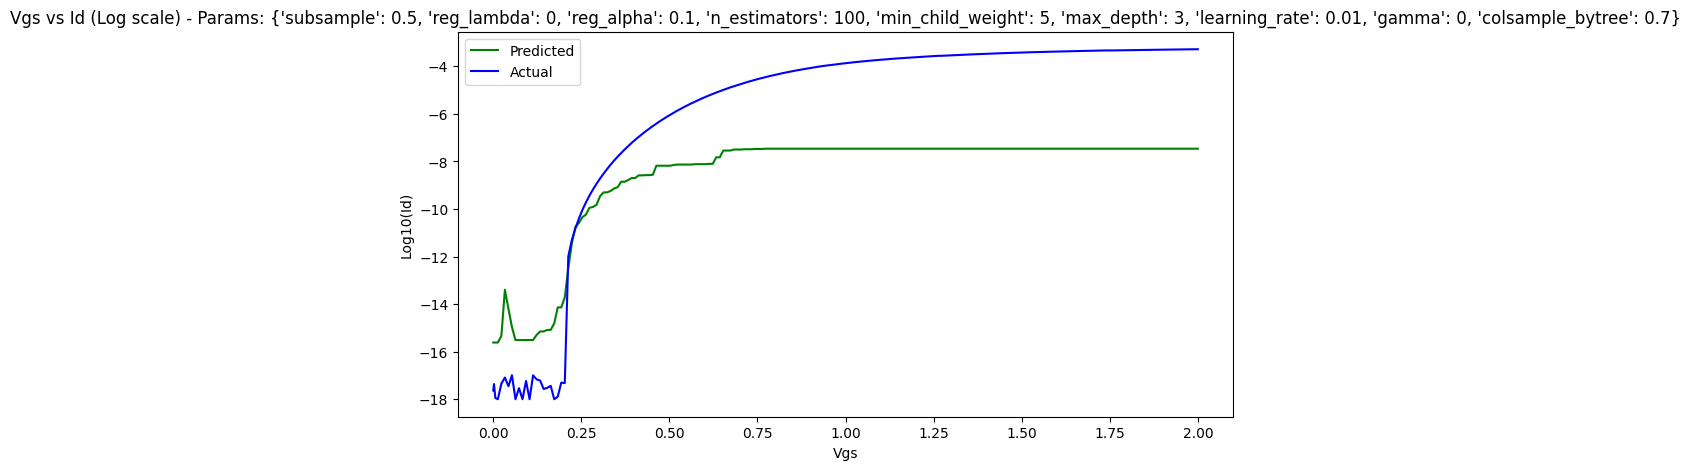

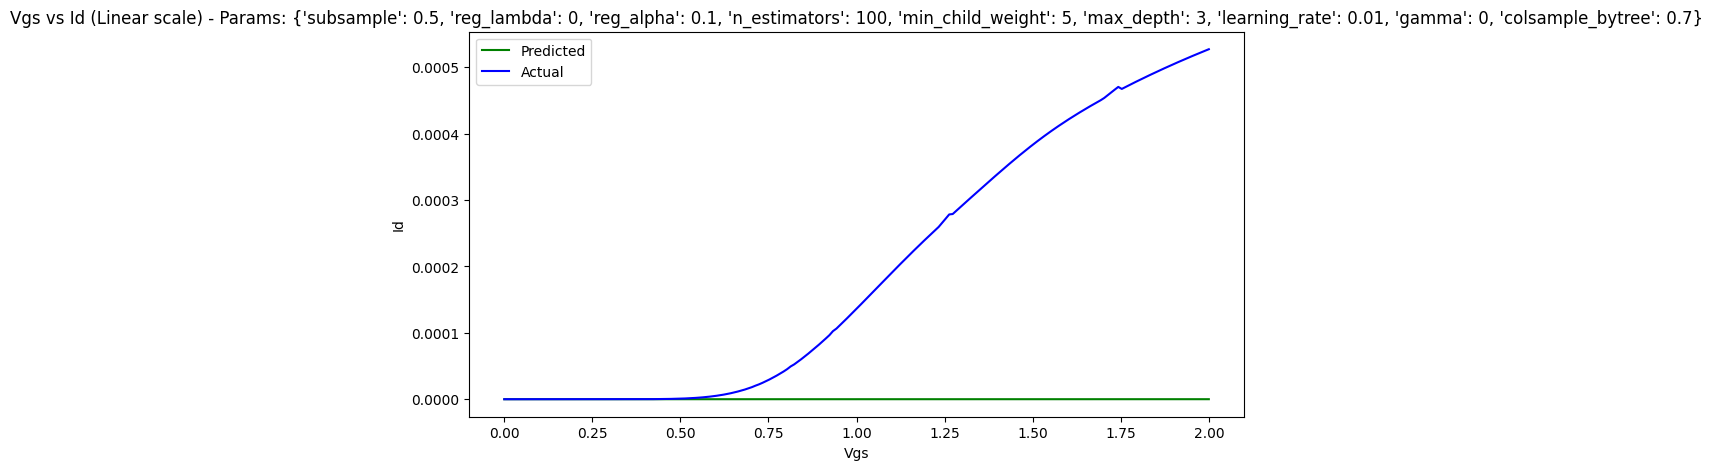

-------------
-------------------
---------------

{'subsample': 0.5, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}


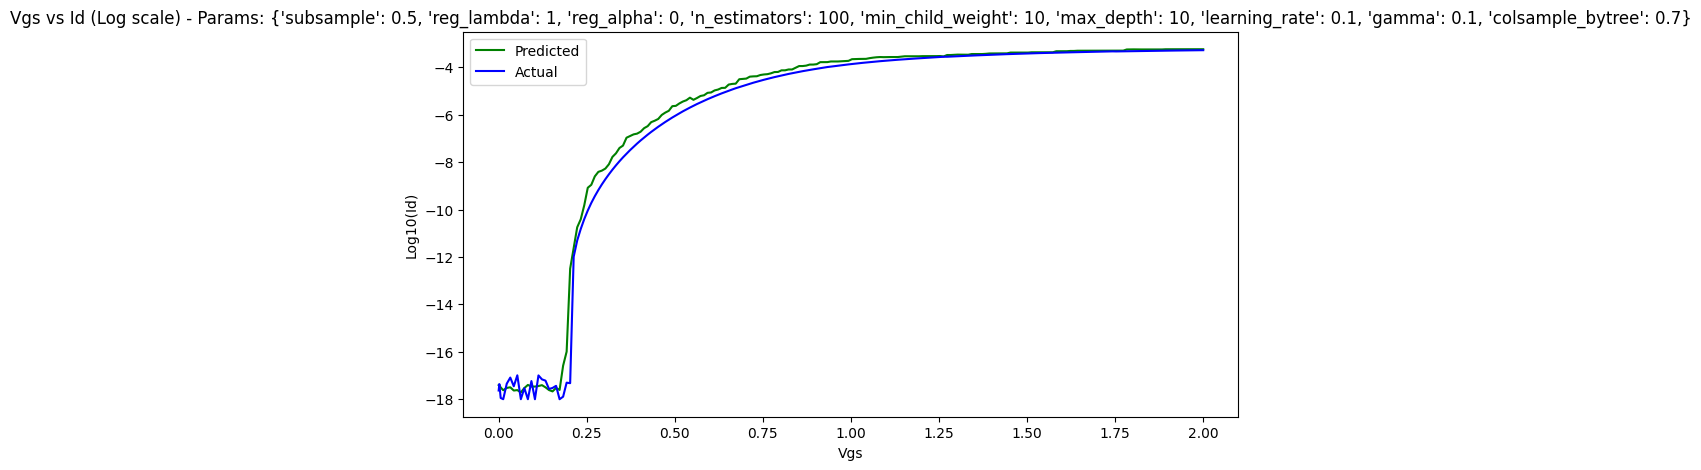

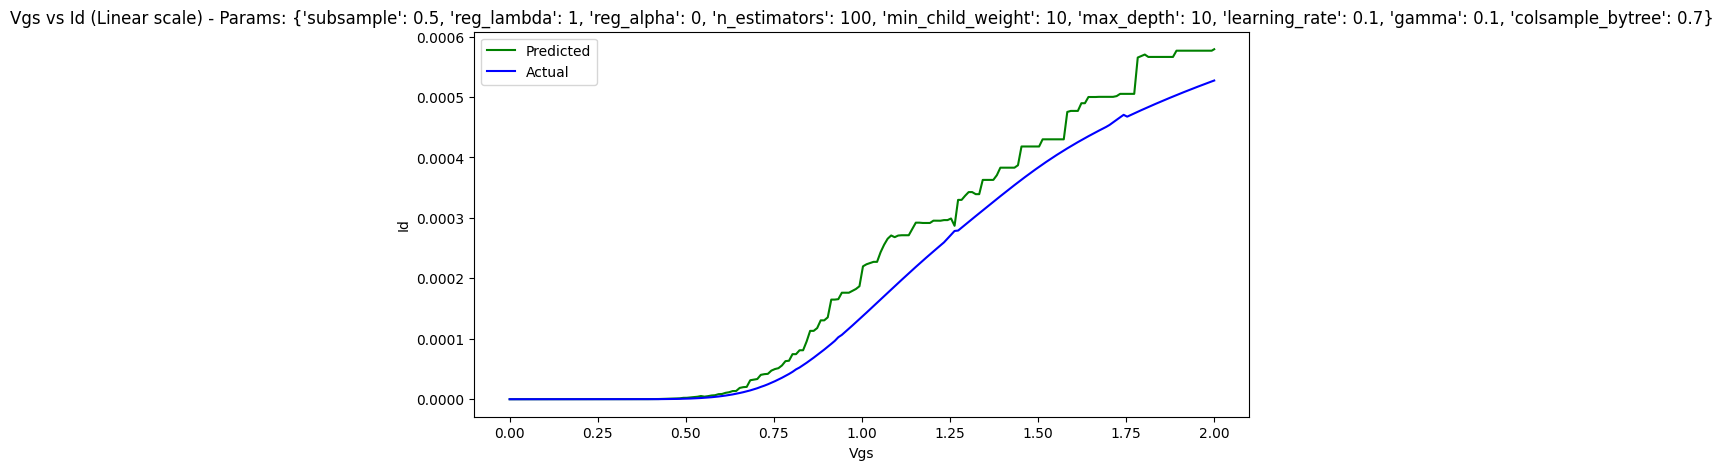

-------------
-------------------
---------------

{'subsample': 0.5, 'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}


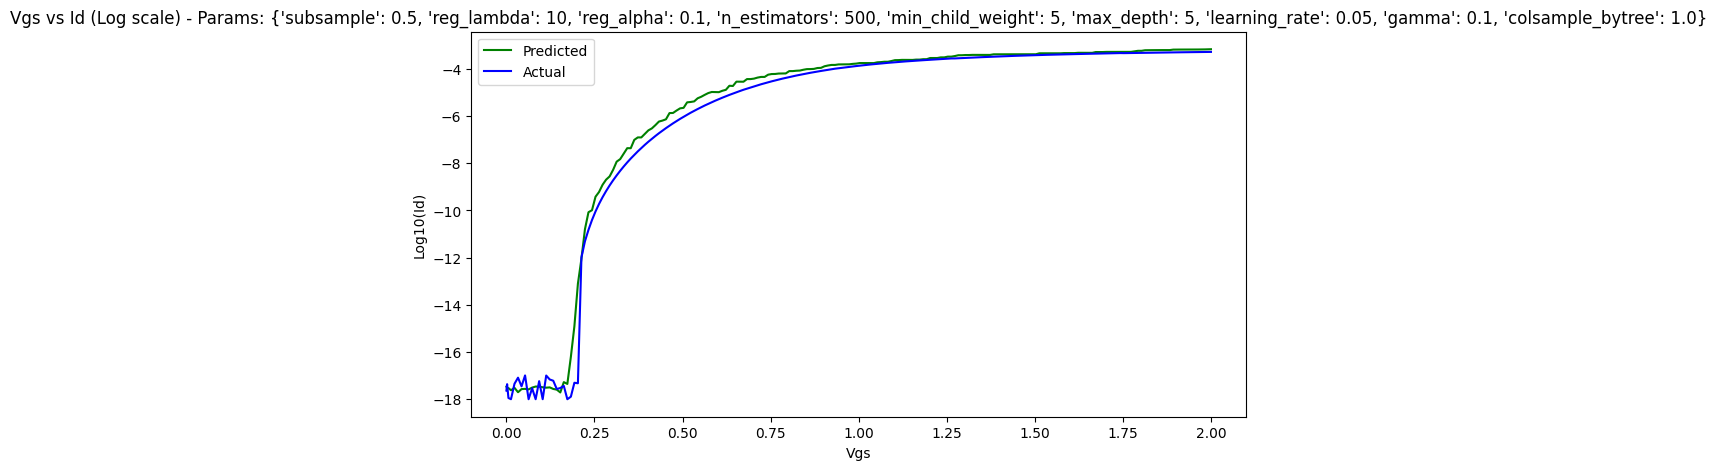

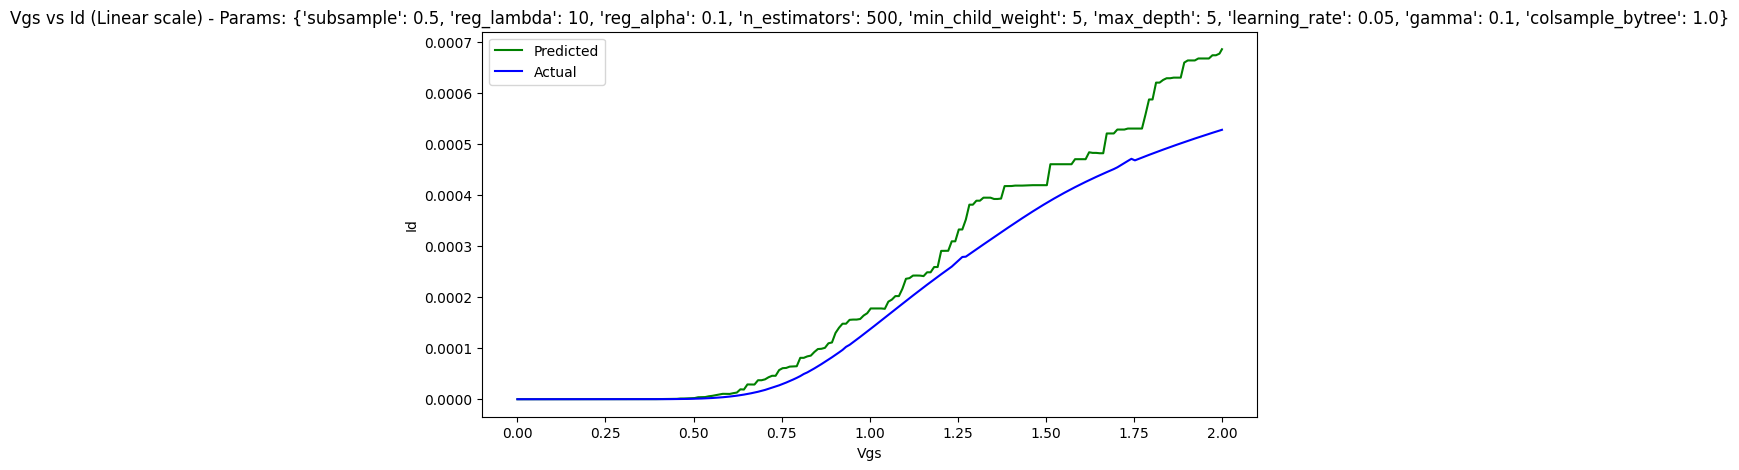

-------------
-------------------
---------------

{'subsample': 0.7, 'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.7}


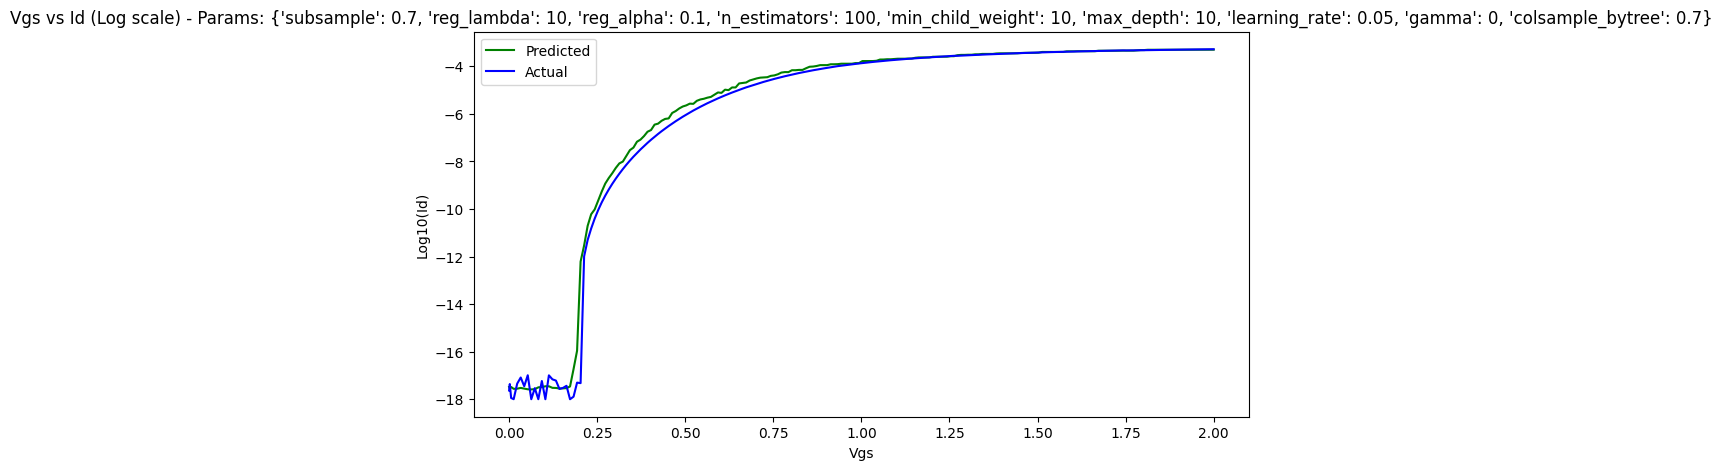

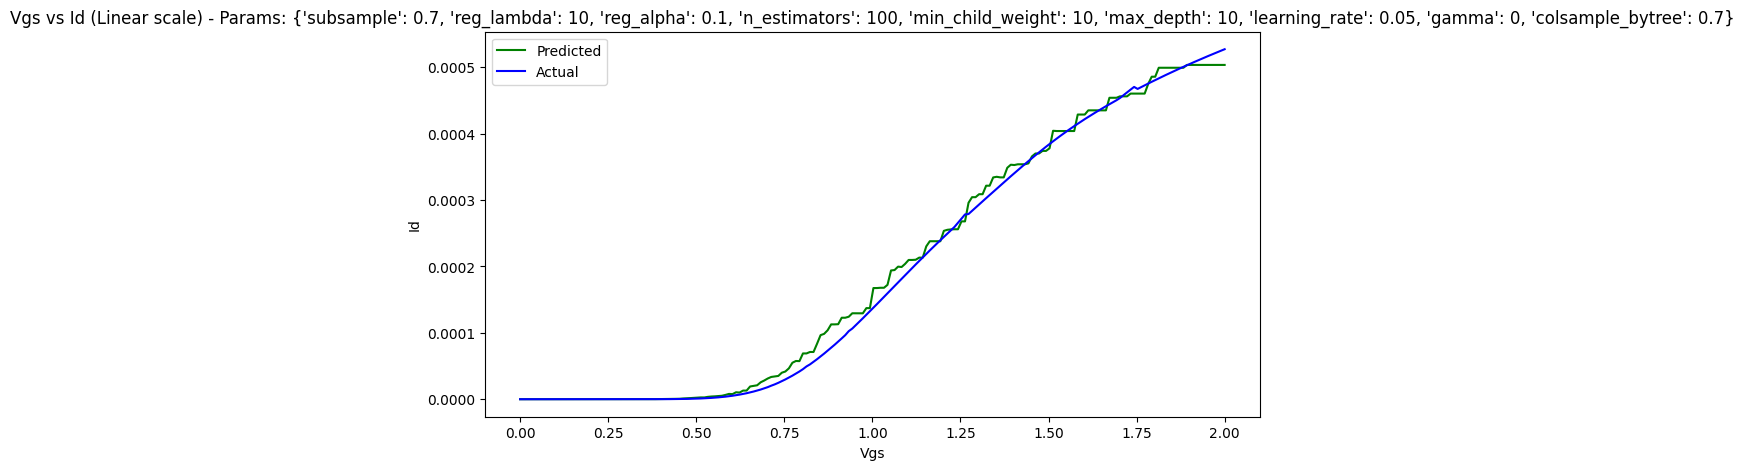

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.7}


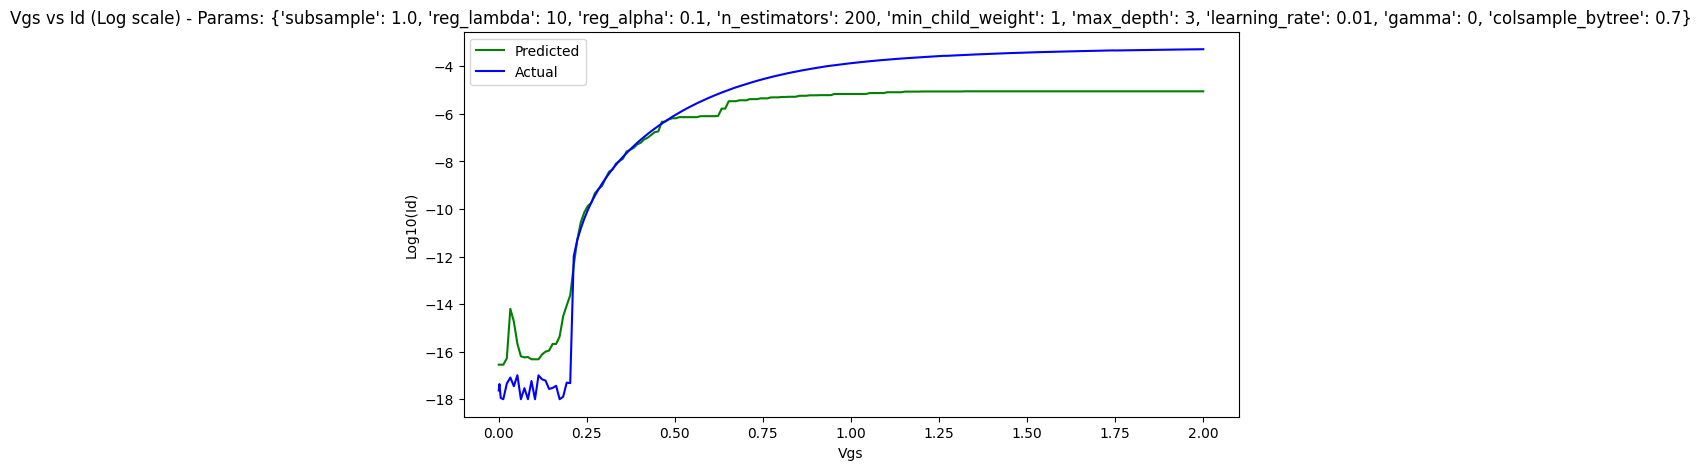

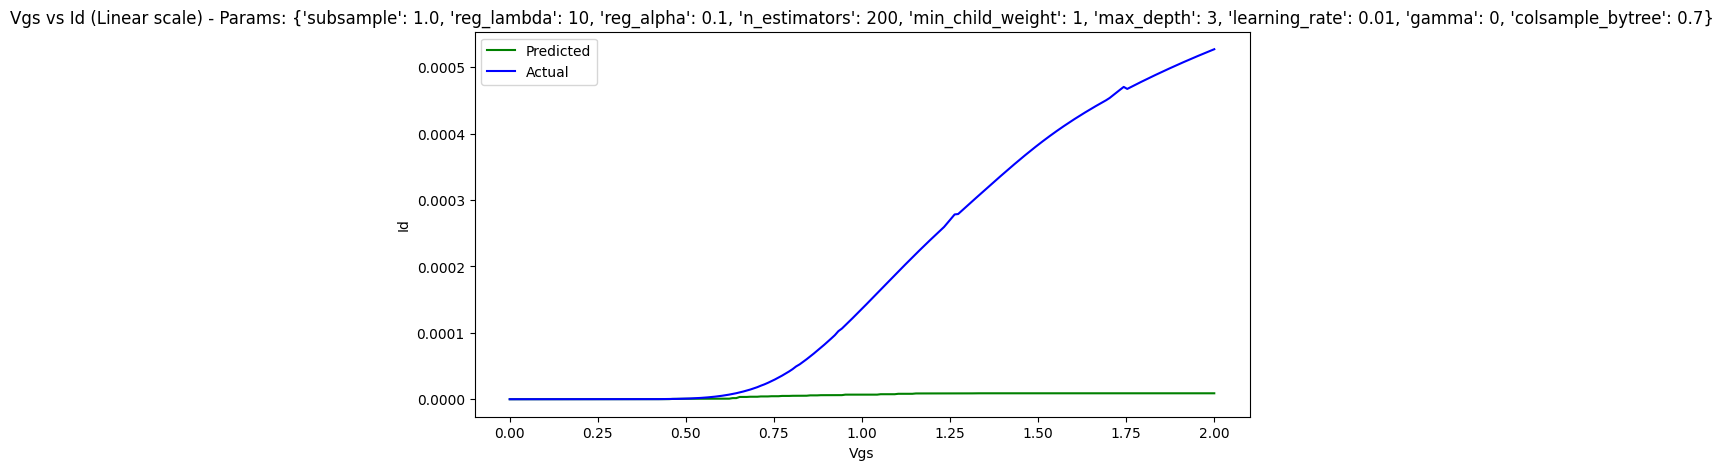

-------------
-------------------
---------------

{'subsample': 0.7, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.7}


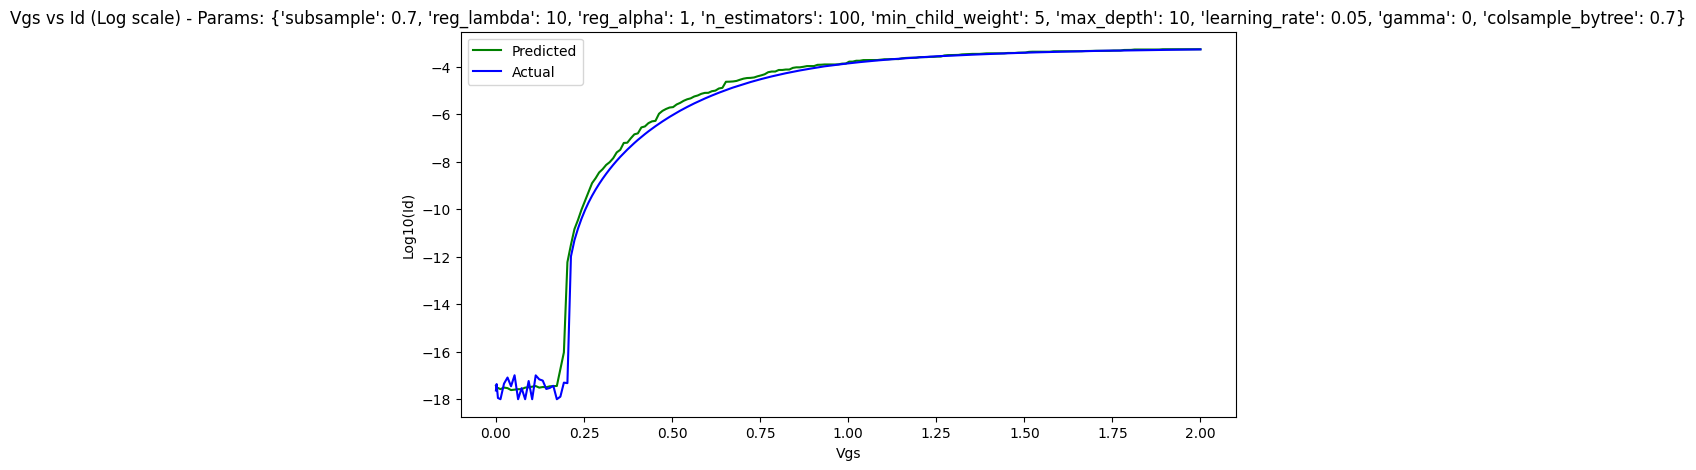

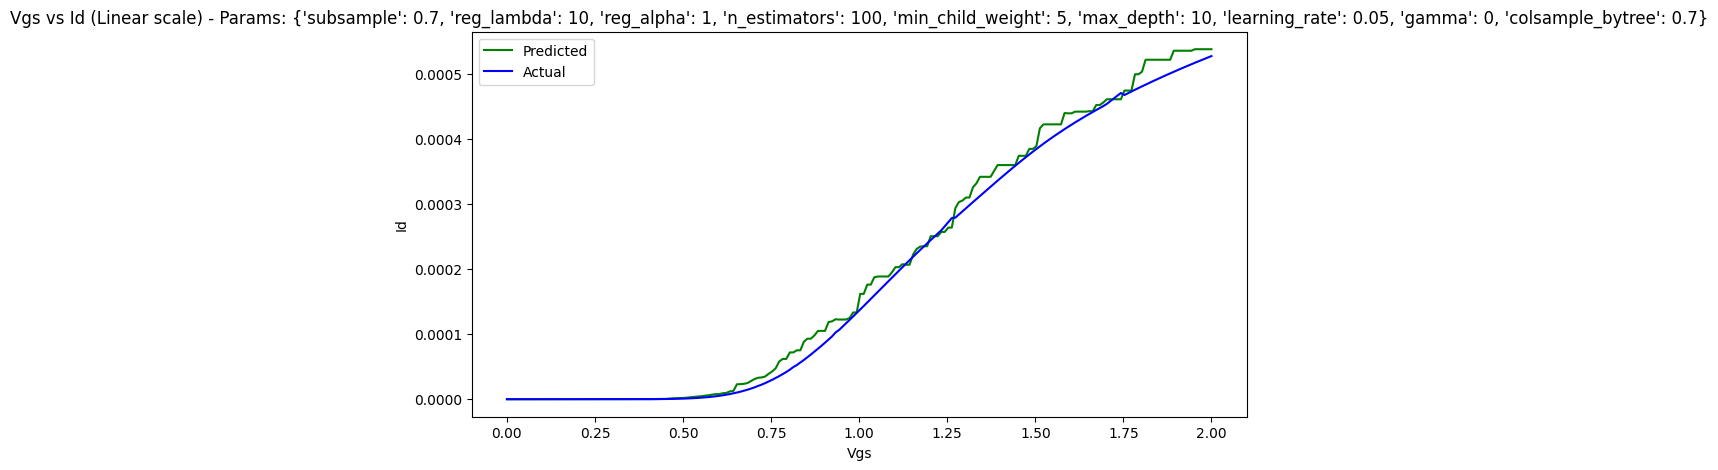

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.7}


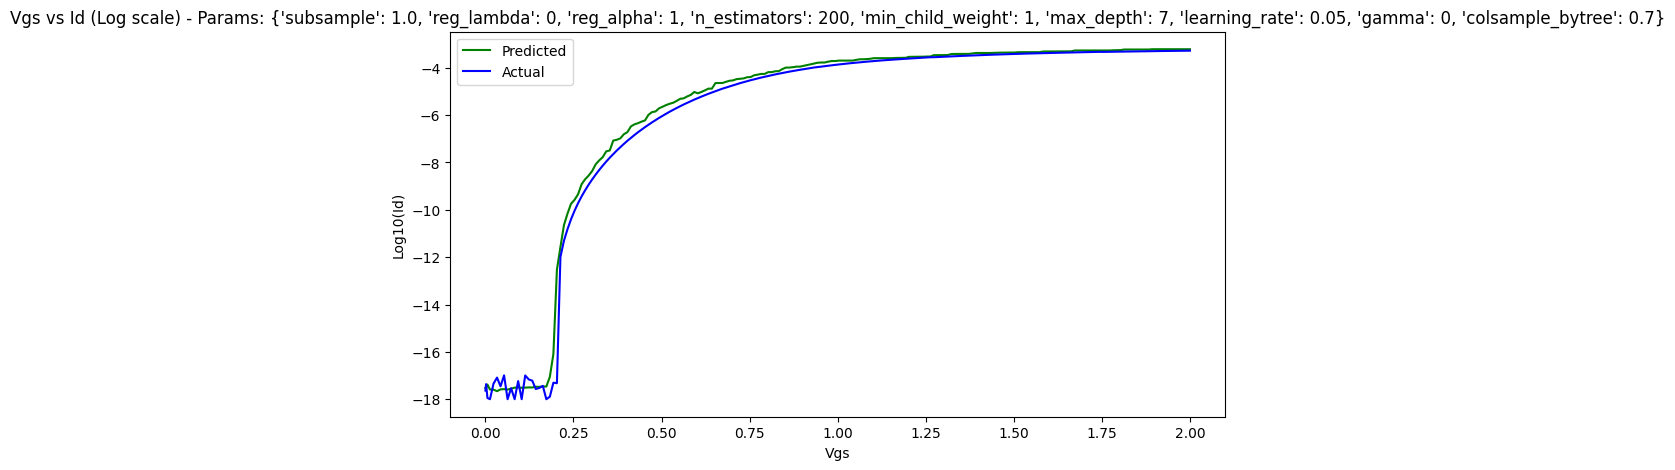

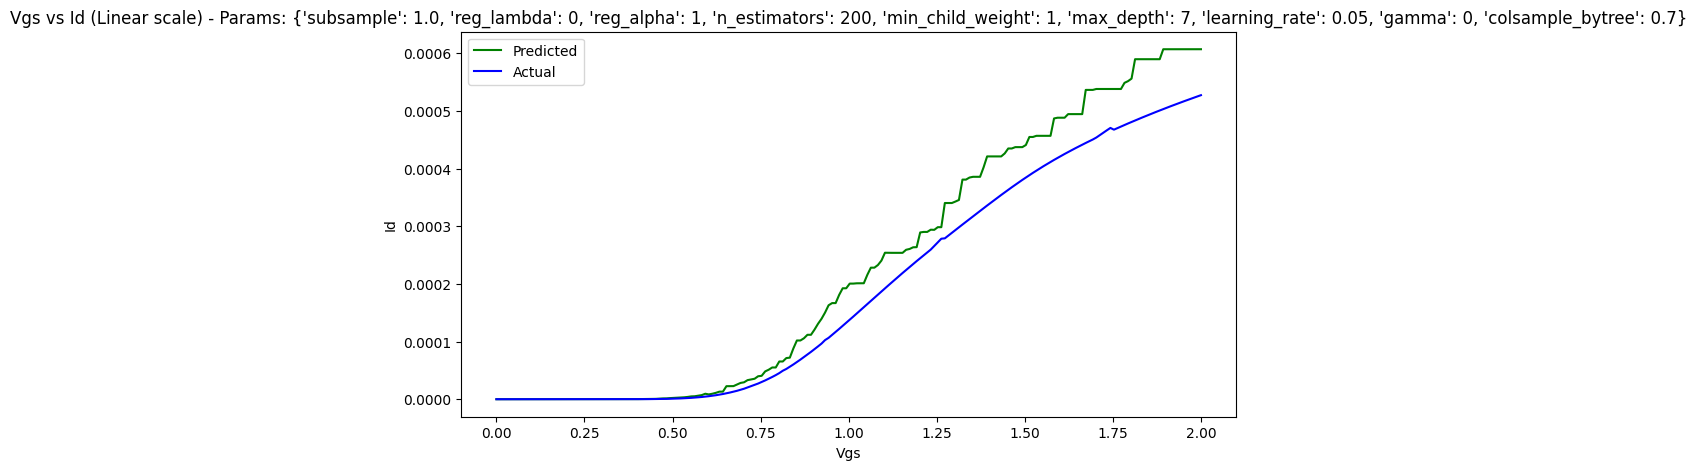

-------------
-------------------
---------------

{'subsample': 0.5, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.5}


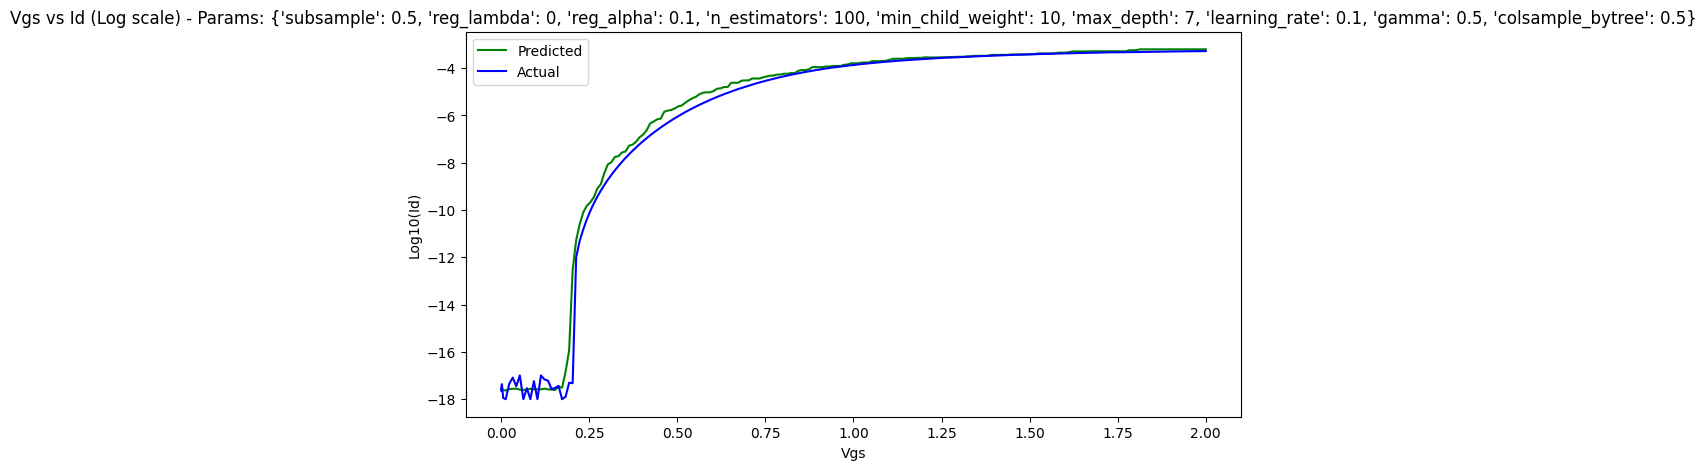

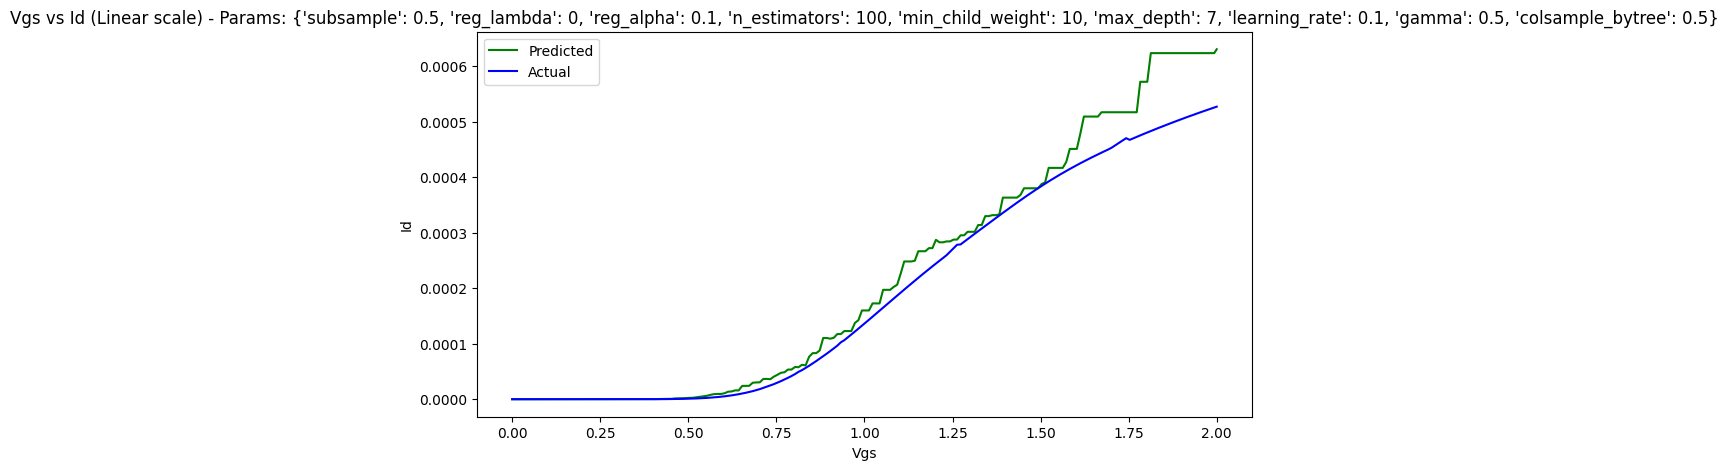

-------------
-------------------
---------------

{'subsample': 0.5, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.7}


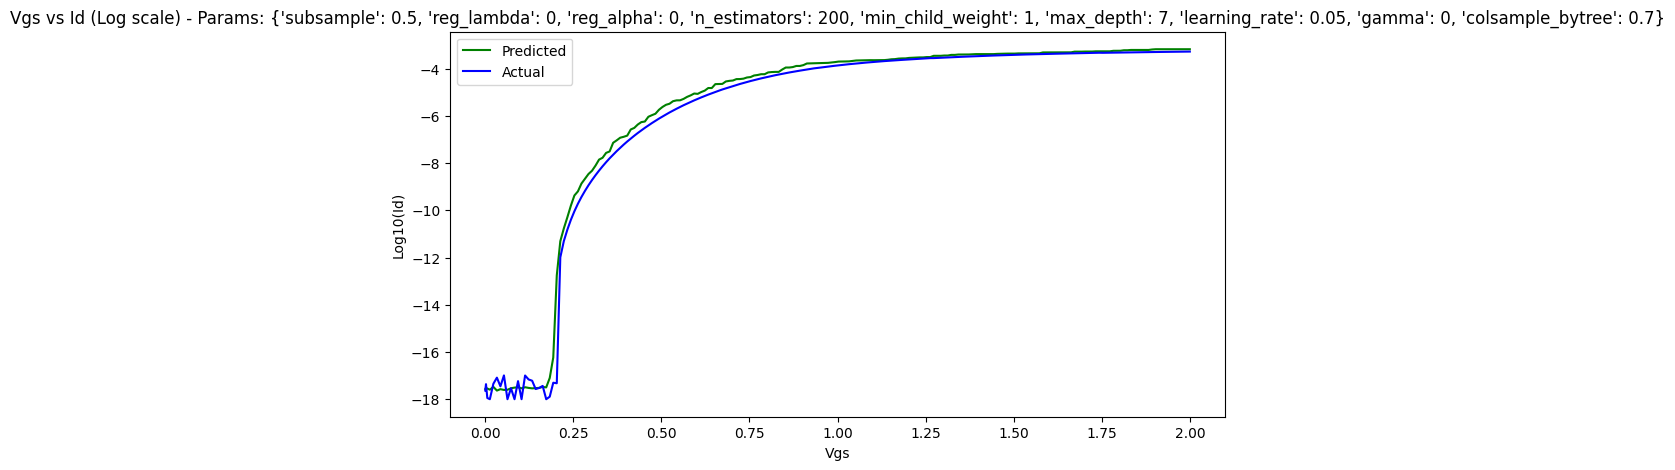

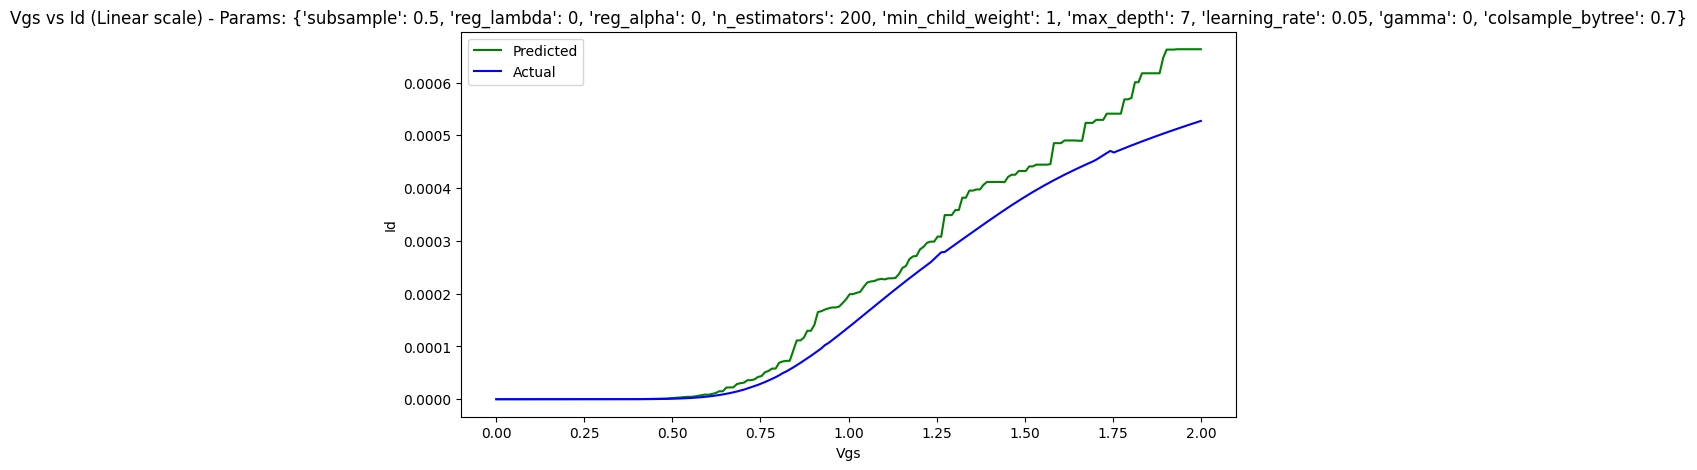

-------------
-------------------
---------------

{'subsample': 0.5, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


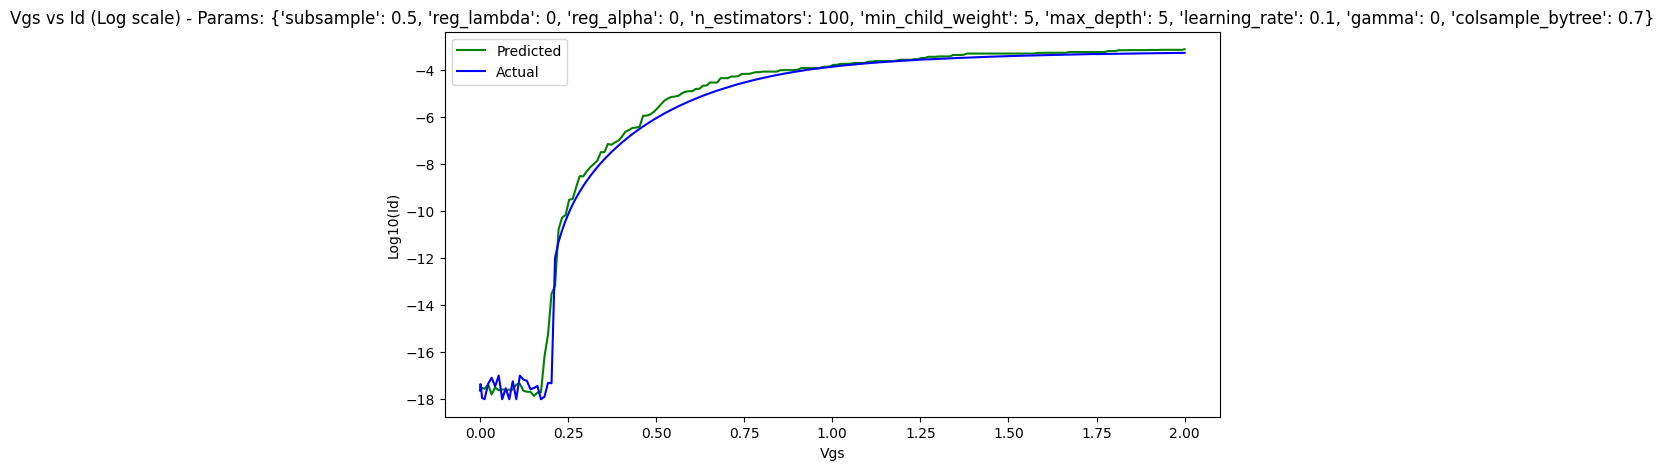

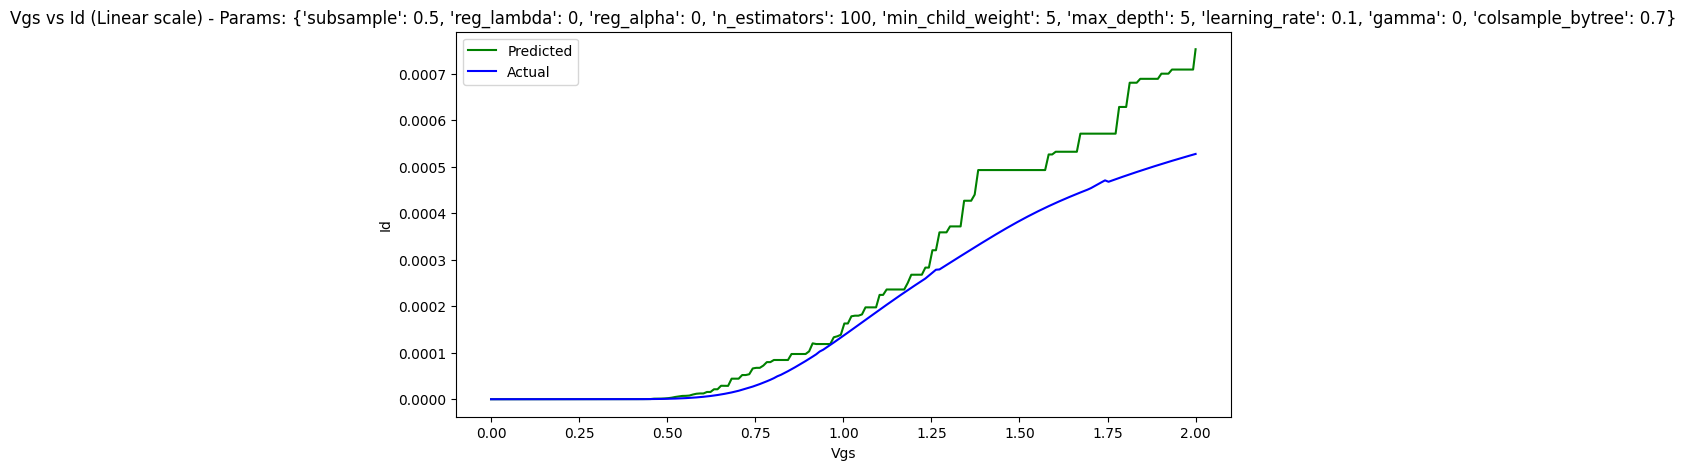

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 1.0}


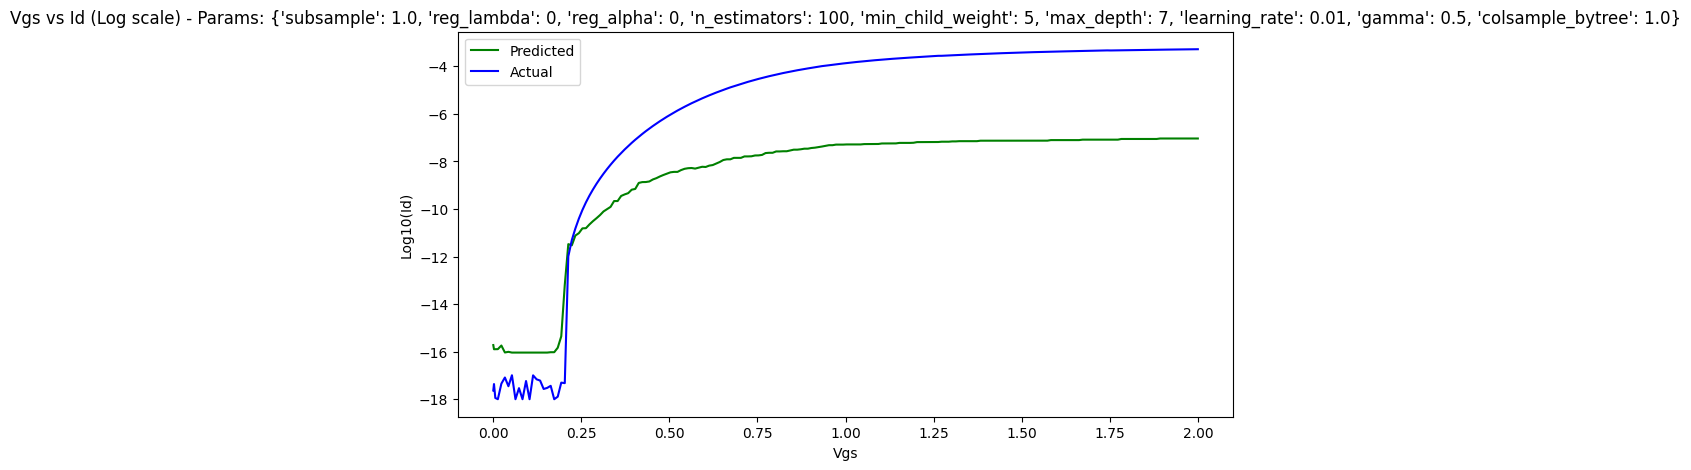

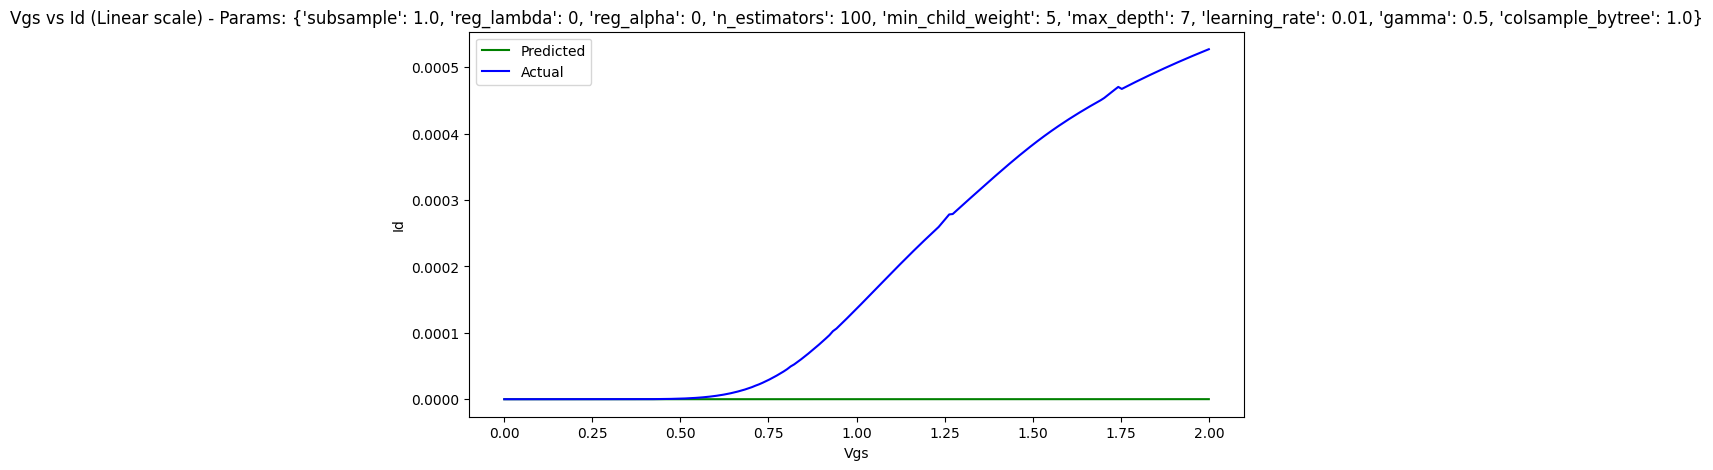

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.5}


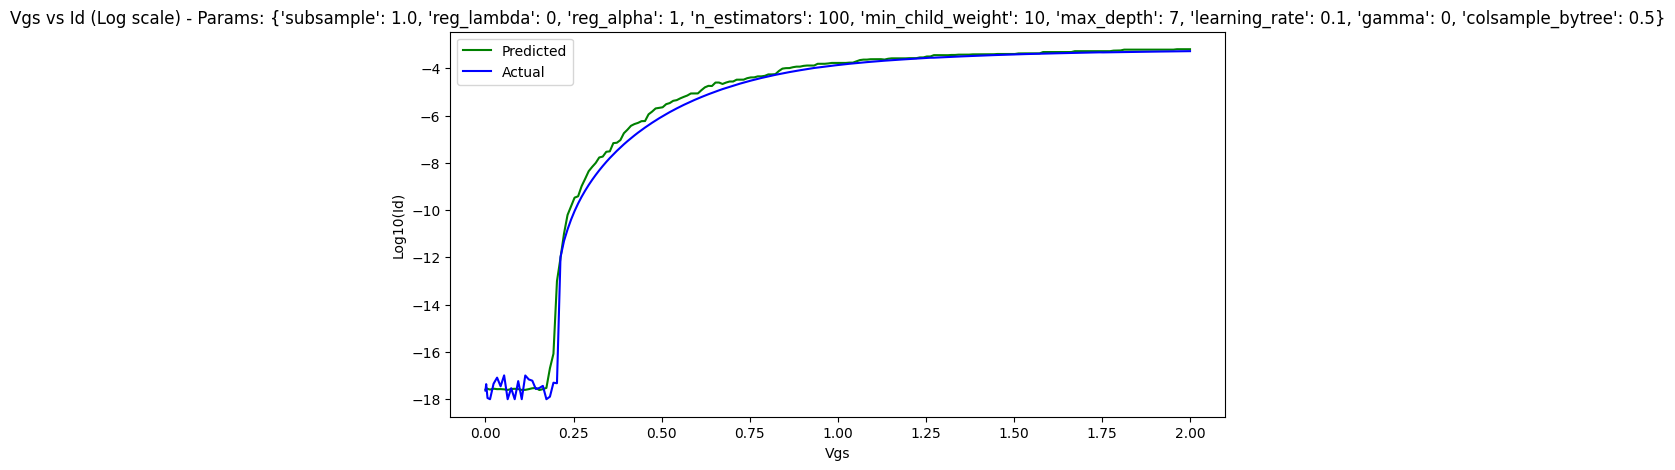

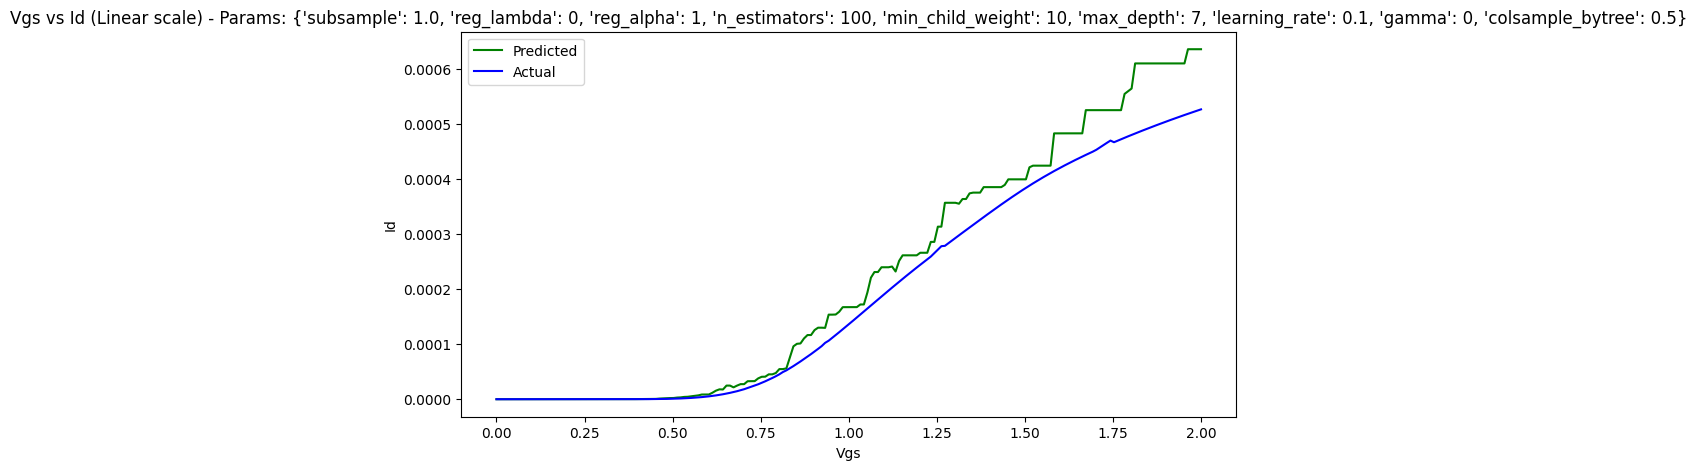

-------------
-------------------
---------------

{'subsample': 0.7, 'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 1.0}


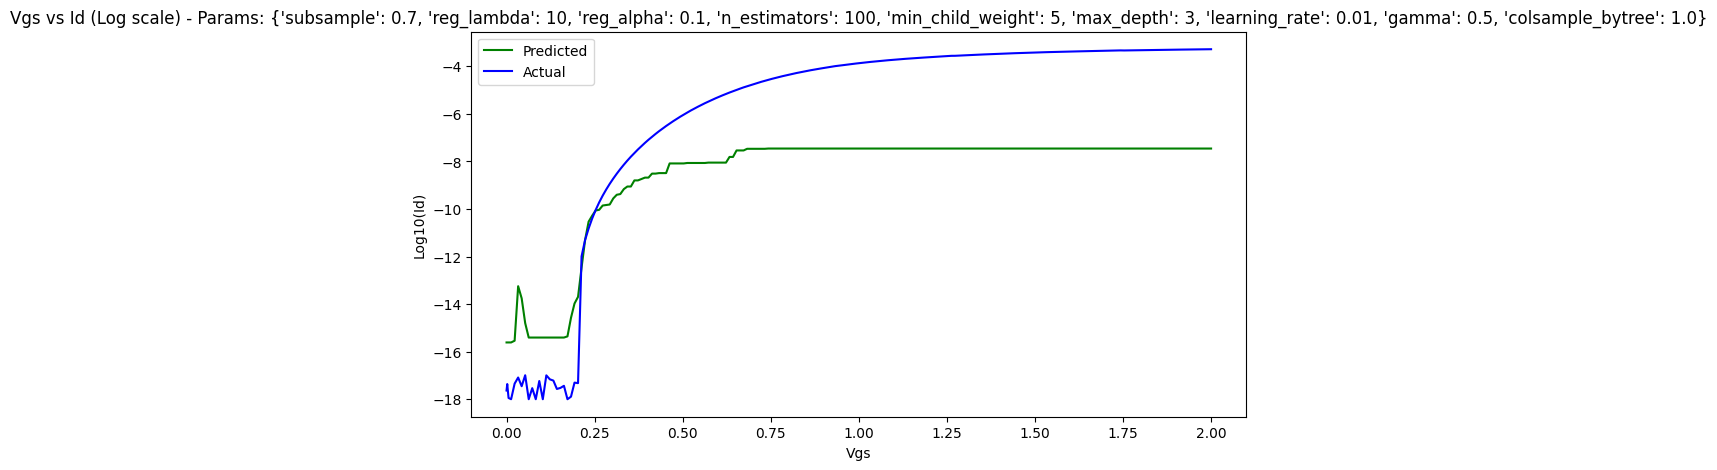

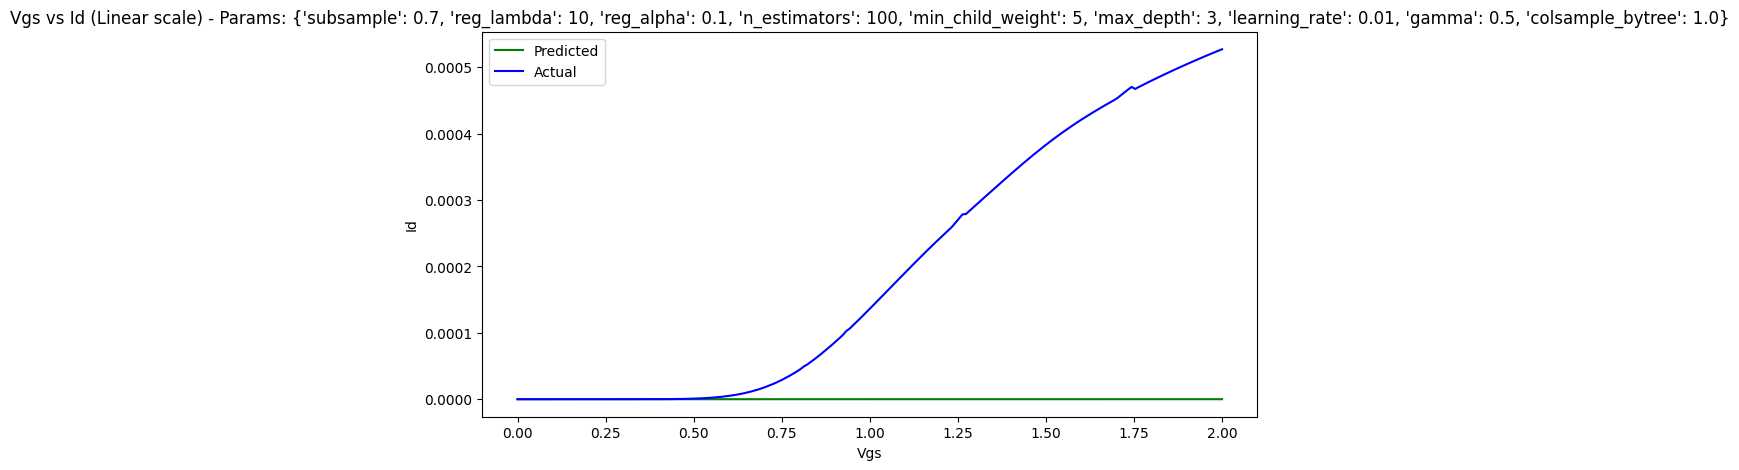

-------------
-------------------
---------------

{'subsample': 0.7, 'reg_lambda': 0, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 1.0}


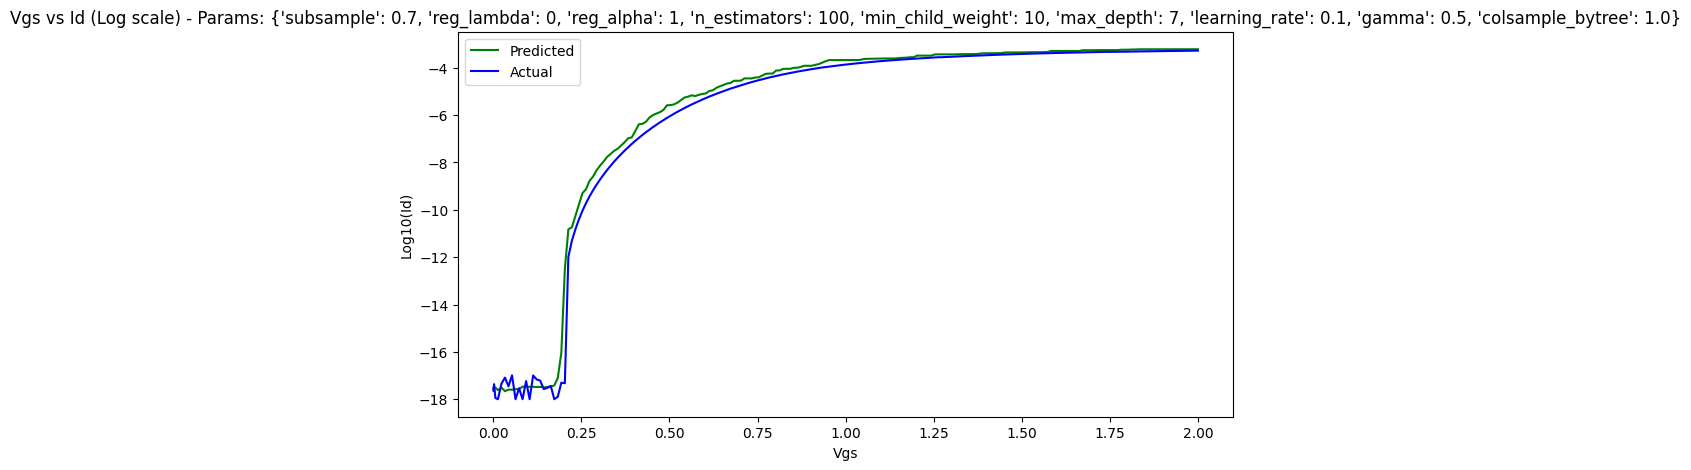

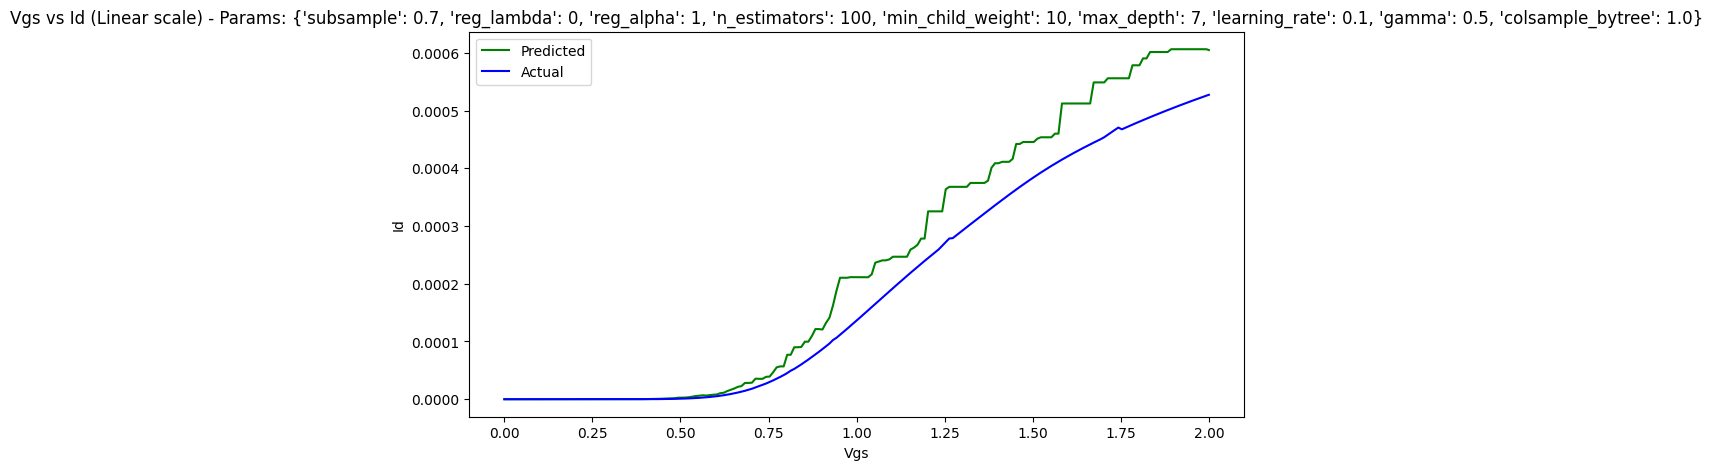

-------------
-------------------
---------------

{'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}


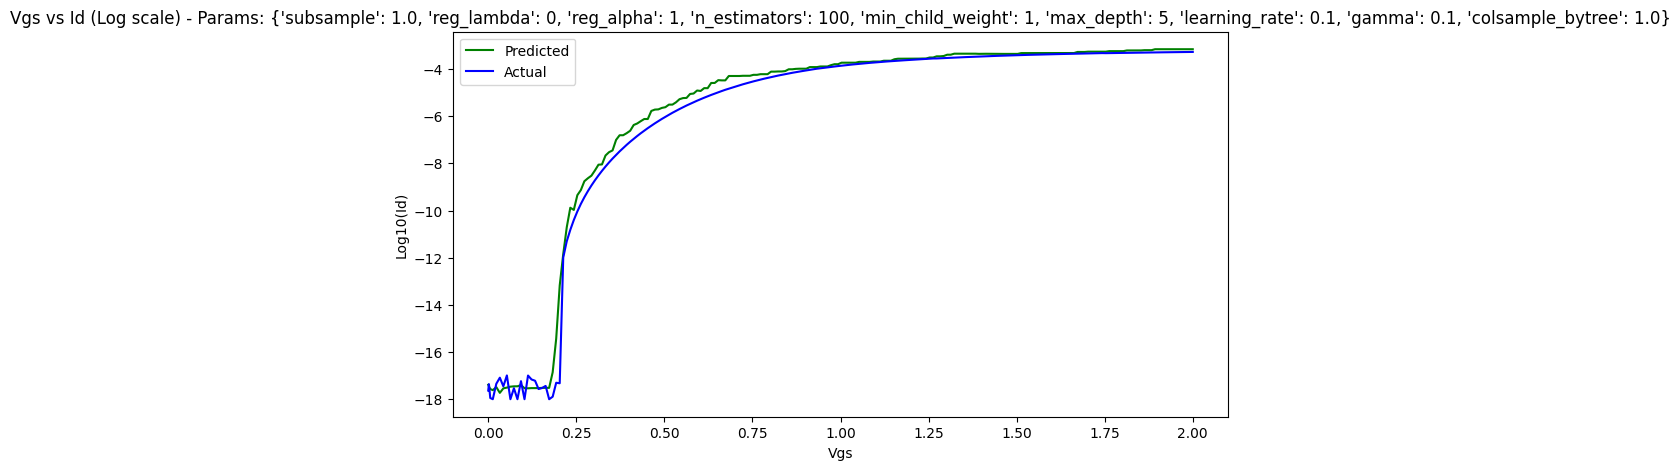

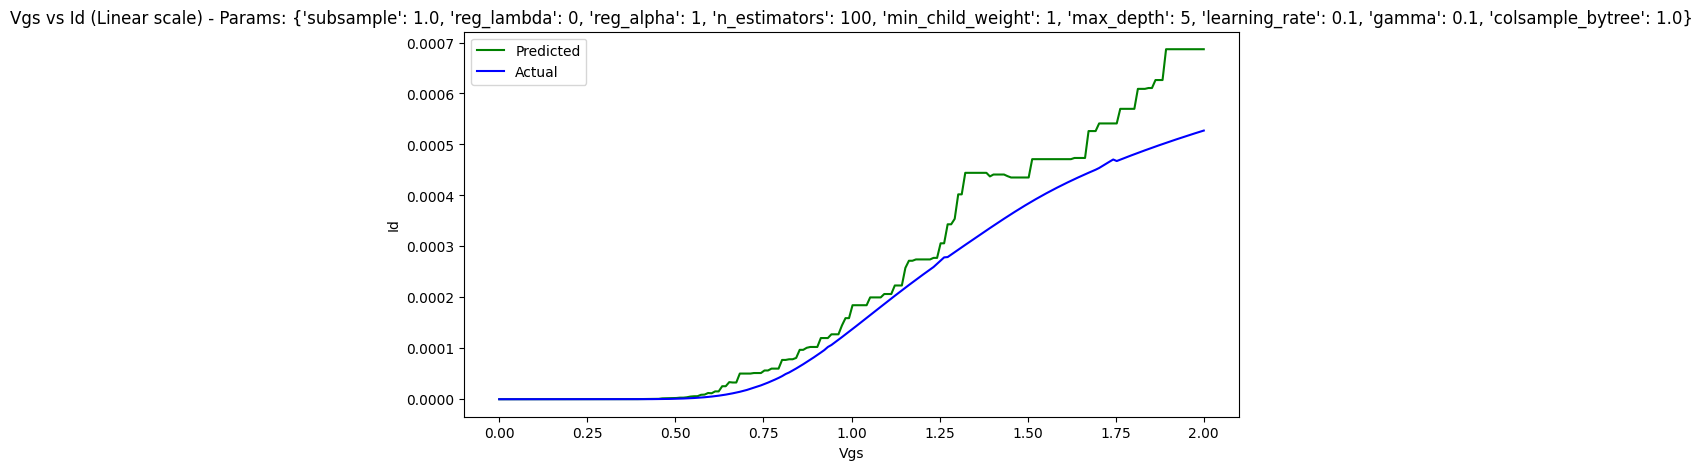

-------------
-------------------
---------------

    learning_rate n_estimators max_depth min_child_weight  subsample  \
0            0.01          100         5                5        1.0   
1            0.05          100         5                1        0.5   
2            0.01          200        10                5        1.0   
3            0.10          200         7                1        1.0   
4            0.05          200         3               10        1.0   
5            0.01          500         5                1        0.5   
6            0.10          100         7                5        0.7   
7            0.05          100        10                1        1.0   
8            0.01          200         5               10        0.7   
9            0.10          100         5                5        1.0   
10           0.05          200         7                1        0.7   
11           0.05          100         7                5        1.0   
12           

In [13]:


# Loop through each hyperparameter set
for params in random_search.cv_results_['params']:
    # Set up the model with the current parameters
    model = xgb.XGBRegressor(random_state=42, **params)
    model.fit(X_train, y_train)
    print(params)

    # Test on the first test dataset
    y_pred_test = model.predict(X_test)
    r2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)

    # Load and preprocess the second test data
    test_data = pd.read_csv('/content/drive/MyDrive/colab_notebooks/Data/test_data.csv').iloc[0:203]
    test_data['Id'] = np.where(test_data['Id'] < 1e-18, 1e-18, test_data['Id'])
    test_data['Log_Id'] = np.log10(test_data['Id'])
    X_test_1 = test_data[['Tox', 'Nc', 'Nd', 'Ns', 'Vds', 'Vgs']]
    y_test_1 = test_data['Log_Id']
    X_test_1_transformed = poly.transform(X_test_1)
    X_test_1_scaled = scaler.transform(X_test_1_transformed)

    # Predict on the second test dataset and evaluate
    y_pred_test_1 = model.predict(X_test_1_scaled)
    r2_test_1 = r2_score(y_test_1, y_pred_test_1)
    mae_test_1 = mean_absolute_error(y_test_1, y_pred_test_1)

    # Log scale plot
    plt.figure(figsize=(10, 5))
    plt.plot(X_test_1['Vgs'], y_pred_test_1, color="green", label="Predicted")
    plt.plot(X_test_1['Vgs'], y_test_1, color="blue", label="Actual")
    plt.title(f'Vgs vs Id (Log scale) - Params: {params}')
    plt.xlabel('Vgs')
    plt.ylabel('Log10(Id)')
    plt.legend()
    plt.show()

    # Linear scale plot
    plt.figure(figsize=(10, 5))
    plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_pred_test_1), 1e-18), color="green", label="Predicted")
    plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_test_1), 1e-18), color="blue", label="Actual")
    plt.title(f'Vgs vs Id (Linear scale) - Params: {params}')
    plt.xlabel('Vgs')
    plt.ylabel('Id')
    plt.legend()
    plt.show()

    current_result = pd.DataFrame({
        'learning_rate': params['learning_rate'],
        'n_estimators': params['n_estimators'],
        'max_depth': params['max_depth'],
        'min_child_weight': params['min_child_weight'],
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree'],
        'gamma': params['gamma'],
        'reg_lambda': params['reg_lambda'],
        'reg_alpha': params['reg_alpha'],
        'R2': r2_test_1,
        'MAE': mae_test_1
    }, index=[0])

    # Save to DataFrame
    results_df = pd.concat([results_df, current_result], ignore_index=True)

    print("-------------\n-------------------\n---------------\n")
# Display results
print(results_df)


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
results_df.to_csv('xg_hyP_tuning_results.csv', index=False)